## Code actionnable 

L'idee du code actionnable est de produire un code sur lequel on puisse appliquer des transformations lineaires simples : rotations, translations, homoteties.

On étudie le melange de deux flux d'information, l'un étant l'identité (invariant selon les poses), l'autre etant l'action (l'information spatiale) appliquee sur l'objet.

en entrée : x uniquement

**Idee principale : l' encodeur produit un code latent selon le principe VAE (dimension 4). 
Ce code latent est "divisé" en 2 composantes (maximalement independants de par la contrainte KL).**


les 2 premieres composantes servent à "agir sur le code" en le translatant. Elles doivent donc selectionner une information spatiale utile à l'encodage de la position.

Les 2 dernieres composantes sont utilisées comme entree d'un classifieur **supervisé**. Elles doivent donc selectionner une information utile à la classification.

La couche intermediaire (dim 256) utile à la classification est ensuite projetee sur un espace de caracteristiques n x 2D (n = 32). 

la translation est appliquee uniformement à toutes les caracteristiques

validation du code par reconstruction de x en sortie (BCE Loss)
**ajout d'unités de type "gate" pour selectionner certaines caracteristiques du code latent**

Resultat (30 epoques):
* meilleure reconstruction spatiale
* topographie de l'encodage spatial moins uniforme/precise 

**Necessite de relaxer la contriante KL pour converger** : KL loss * 0.1

In [1]:
%matplotlib inline

In [2]:
from Where_act_code_VAE_classif_alt import init
args = init(verbose=1, epochs=10)
print('Parameters=', args)

Parameters= {'valid_size': 0.2, 'momentum': 0.48, 'seed': 42, 'epochs': 10, 'mean': 0.0, 'no_cuda': True, 'log_interval': 10, 'verbose': 1, 'batch_size': 50, 'num_processes': 1, 'dimension': 25, 'std': 1.0, 'lr': 0.001, 'test_batch_size': 1, 'size': 64}


In [3]:
import numpy as np
import torch

In [4]:
import easydict

## Réseau de neurones

### Lancer l'apprentissage ou charger les données

In [20]:
path = '2018-07-26_actionnable_code_VAE_classif_alt_latent256_gate.pt'

In [6]:
!ls -l {path}
!rm {path}

ls: impossible d'accéder à '2018-07-26_actionnable_code_VAE_classif_alt_latent256.pt': Aucun fichier ou dossier de ce type
rm: impossible de supprimer '2018-07-26_actionnable_code_VAE_classif_alt_latent256.pt': Aucun fichier ou dossier de ce type


In [7]:
from Where_act_code_VAE_classif_alt import ML
ml = ML(args)

cuda? False


(<matplotlib.figure.Figure at 0x7f6b306cb940>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6acfc8df28>)

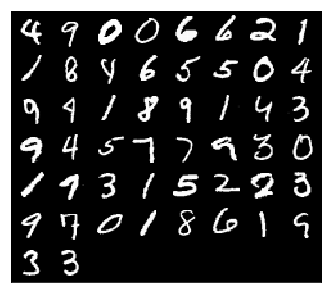

In [8]:
ml.dataset.show()

In [9]:
print(ml.model)

Net(
  (conv1): Conv2d(1, 16, kernel_size=(4, 4), stride=(4, 4))
  (conv2): Conv2d(16, 64, kernel_size=(4, 4), stride=(4, 4))
  (conv3): Conv2d(64, 256, kernel_size=(4, 4), stride=(4, 4))
  (fc_x): Linear(in_features=256, out_features=32, bias=False)
  (fc_mu): Linear(in_features=32, out_features=4, bias=False)
  (fc_logvar): Linear(in_features=32, out_features=4, bias=False)
  (fc_classif_1): Linear(in_features=2, out_features=256, bias=True)
  (fc_classif_2): Linear(in_features=256, out_features=10, bias=False)
  (fc_z_d1): Linear(in_features=256, out_features=32, bias=True)
  (fc_z_d2): Linear(in_features=256, out_features=32, bias=True)
  (fc_gate): Linear(in_features=256, out_features=32, bias=True)
  (deconv3): ConvTranspose2d(256, 64, kernel_size=(4, 4), stride=(4, 4))
  (deconv2): ConvTranspose2d(64, 16, kernel_size=(4, 4), stride=(4, 4))
  (deconv1): ConvTranspose2d(16, 1, kernel_size=(4, 4), stride=(4, 4))
)


In [10]:
ml.args.epochs = 1000

In [11]:
#ml.model.fc_logvar.weight

In [12]:
#ml.model.fc_logvar.weight

In [13]:
#ml.model.fc_mu.weight

In [14]:
#ml.model.fc_mu.weight

In [15]:
ml.train(None)

Train Epoch
	Train Epoch: 1 [0/60000 (0%)]	classif Loss: 147.11	BCE_loss: 2839.13	KL: 0.00	Accuracy: 0.12
	Train Epoch: 1 [500/60000 (1%)]	classif Loss: 149.54	BCE_loss: 2489.64	KL: 0.21	Accuracy: 0.06
	Train Epoch: 1 [1000/60000 (2%)]	classif Loss: 149.43	BCE_loss: 908.50	KL: 3.78	Accuracy: 0.08
	Train Epoch: 1 [1500/60000 (2%)]	classif Loss: 147.78	BCE_loss: 527.08	KL: 0.10	Accuracy: 0.16
	Train Epoch: 1 [2000/60000 (3%)]	classif Loss: 147.24	BCE_loss: 520.17	KL: 0.01	Accuracy: 0.06
	Train Epoch: 1 [2500/60000 (4%)]	classif Loss: 146.52	BCE_loss: 513.78	KL: 0.00	Accuracy: 0.10
	Train Epoch: 1 [3000/60000 (5%)]	classif Loss: 147.32	BCE_loss: 438.22	KL: 0.00	Accuracy: 0.12
	Train Epoch: 1 [3500/60000 (6%)]	classif Loss: 147.15	BCE_loss: 414.59	KL: 0.00	Accuracy: 0.10
	Train Epoch: 1 [4000/60000 (7%)]	classif Loss: 146.72	BCE_loss: 458.49	KL: 0.00	Accuracy: 0.12
	Train Epoch: 1 [4500/60000 (8%)]	classif Loss: 149.06	BCE_loss: 456.39	KL: 0.01	Accuracy: 0.12
	Train Epoch: 1 [5000/60000 (8

	Train Epoch: 1 [42000/60000 (70%)]	classif Loss: 114.66	BCE_loss: 287.07	KL: 25.61	Accuracy: 0.26
	Train Epoch: 1 [42500/60000 (71%)]	classif Loss: 122.61	BCE_loss: 289.83	KL: 27.27	Accuracy: 0.14
	Train Epoch: 1 [43000/60000 (72%)]	classif Loss: 120.98	BCE_loss: 288.45	KL: 25.74	Accuracy: 0.22
	Train Epoch: 1 [43500/60000 (72%)]	classif Loss: 131.31	BCE_loss: 295.75	KL: 24.76	Accuracy: 0.16
	Train Epoch: 1 [44000/60000 (73%)]	classif Loss: 115.85	BCE_loss: 277.37	KL: 25.59	Accuracy: 0.18
	Train Epoch: 1 [44500/60000 (74%)]	classif Loss: 118.66	BCE_loss: 274.23	KL: 26.90	Accuracy: 0.28
	Train Epoch: 1 [45000/60000 (75%)]	classif Loss: 113.17	BCE_loss: 282.07	KL: 25.17	Accuracy: 0.28
	Train Epoch: 1 [45500/60000 (76%)]	classif Loss: 122.46	BCE_loss: 286.84	KL: 25.44	Accuracy: 0.20
	Train Epoch: 1 [46000/60000 (77%)]	classif Loss: 121.68	BCE_loss: 273.31	KL: 27.06	Accuracy: 0.18
	Train Epoch: 1 [46500/60000 (78%)]	classif Loss: 134.64	BCE_loss: 303.38	KL: 26.16	Accuracy: 0.20
	Train Epo

	Train Epoch: 2 [24000/60000 (40%)]	classif Loss: 93.91	BCE_loss: 233.40	KL: 31.50	Accuracy: 0.30
	Train Epoch: 2 [24500/60000 (41%)]	classif Loss: 104.66	BCE_loss: 217.99	KL: 31.87	Accuracy: 0.32
	Train Epoch: 2 [25000/60000 (42%)]	classif Loss: 101.75	BCE_loss: 246.36	KL: 30.97	Accuracy: 0.22
	Train Epoch: 2 [25500/60000 (42%)]	classif Loss: 115.27	BCE_loss: 234.96	KL: 30.38	Accuracy: 0.28
	Train Epoch: 2 [26000/60000 (43%)]	classif Loss: 103.11	BCE_loss: 228.84	KL: 31.68	Accuracy: 0.30
	Train Epoch: 2 [26500/60000 (44%)]	classif Loss: 117.11	BCE_loss: 235.75	KL: 30.63	Accuracy: 0.30
	Train Epoch: 2 [27000/60000 (45%)]	classif Loss: 108.68	BCE_loss: 251.95	KL: 32.61	Accuracy: 0.32
	Train Epoch: 2 [27500/60000 (46%)]	classif Loss: 101.14	BCE_loss: 240.73	KL: 31.28	Accuracy: 0.38
	Train Epoch: 2 [28000/60000 (47%)]	classif Loss: 108.08	BCE_loss: 250.86	KL: 32.15	Accuracy: 0.32
	Train Epoch: 2 [28500/60000 (48%)]	classif Loss: 96.63	BCE_loss: 230.68	KL: 32.62	Accuracy: 0.26
	Train Epoch

	Train Epoch: 3 [6000/60000 (10%)]	classif Loss: 103.85	BCE_loss: 233.09	KL: 33.29	Accuracy: 0.28
	Train Epoch: 3 [6500/60000 (11%)]	classif Loss: 92.55	BCE_loss: 211.08	KL: 34.12	Accuracy: 0.34
	Train Epoch: 3 [7000/60000 (12%)]	classif Loss: 101.18	BCE_loss: 228.73	KL: 33.46	Accuracy: 0.20
	Train Epoch: 3 [7500/60000 (12%)]	classif Loss: 85.19	BCE_loss: 215.64	KL: 31.48	Accuracy: 0.36
	Train Epoch: 3 [8000/60000 (13%)]	classif Loss: 87.20	BCE_loss: 245.21	KL: 31.48	Accuracy: 0.40
	Train Epoch: 3 [8500/60000 (14%)]	classif Loss: 95.00	BCE_loss: 224.77	KL: 35.26	Accuracy: 0.40
	Train Epoch: 3 [9000/60000 (15%)]	classif Loss: 99.87	BCE_loss: 217.52	KL: 31.01	Accuracy: 0.42
	Train Epoch: 3 [9500/60000 (16%)]	classif Loss: 87.42	BCE_loss: 225.20	KL: 33.30	Accuracy: 0.50
	Train Epoch: 3 [10000/60000 (17%)]	classif Loss: 96.54	BCE_loss: 215.04	KL: 34.34	Accuracy: 0.28
	Train Epoch: 3 [10500/60000 (18%)]	classif Loss: 87.61	BCE_loss: 234.79	KL: 33.29	Accuracy: 0.40
	Train Epoch: 3 [11000/600

	Train Epoch: 3 [48000/60000 (80%)]	classif Loss: 86.85	BCE_loss: 228.33	KL: 34.14	Accuracy: 0.42
	Train Epoch: 3 [48500/60000 (81%)]	classif Loss: 94.64	BCE_loss: 223.22	KL: 33.10	Accuracy: 0.28
	Train Epoch: 3 [49000/60000 (82%)]	classif Loss: 111.36	BCE_loss: 232.60	KL: 33.21	Accuracy: 0.36
	Train Epoch: 3 [49500/60000 (82%)]	classif Loss: 99.93	BCE_loss: 215.26	KL: 33.74	Accuracy: 0.32
	Train Epoch: 3 [50000/60000 (83%)]	classif Loss: 89.56	BCE_loss: 208.27	KL: 33.44	Accuracy: 0.44
	Train Epoch: 3 [50500/60000 (84%)]	classif Loss: 93.37	BCE_loss: 222.67	KL: 35.80	Accuracy: 0.38
	Train Epoch: 3 [51000/60000 (85%)]	classif Loss: 86.39	BCE_loss: 215.78	KL: 37.25	Accuracy: 0.50
	Train Epoch: 3 [51500/60000 (86%)]	classif Loss: 91.82	BCE_loss: 225.74	KL: 35.22	Accuracy: 0.38
	Train Epoch: 3 [52000/60000 (87%)]	classif Loss: 108.37	BCE_loss: 227.25	KL: 35.27	Accuracy: 0.26
	Train Epoch: 3 [52500/60000 (88%)]	classif Loss: 97.33	BCE_loss: 234.37	KL: 33.57	Accuracy: 0.40
	Train Epoch: 3 [5

	Train Epoch: 4 [30000/60000 (50%)]	classif Loss: 83.20	BCE_loss: 226.21	KL: 36.64	Accuracy: 0.40
	Train Epoch: 4 [30500/60000 (51%)]	classif Loss: 80.88	BCE_loss: 216.40	KL: 37.31	Accuracy: 0.40
	Train Epoch: 4 [31000/60000 (52%)]	classif Loss: 82.19	BCE_loss: 215.55	KL: 37.85	Accuracy: 0.34
	Train Epoch: 4 [31500/60000 (52%)]	classif Loss: 82.81	BCE_loss: 221.06	KL: 37.32	Accuracy: 0.36
	Train Epoch: 4 [32000/60000 (53%)]	classif Loss: 95.74	BCE_loss: 222.47	KL: 36.67	Accuracy: 0.52
	Train Epoch: 4 [32500/60000 (54%)]	classif Loss: 97.70	BCE_loss: 227.21	KL: 35.34	Accuracy: 0.40
	Train Epoch: 4 [33000/60000 (55%)]	classif Loss: 88.56	BCE_loss: 221.90	KL: 35.34	Accuracy: 0.44
	Train Epoch: 4 [33500/60000 (56%)]	classif Loss: 89.04	BCE_loss: 215.27	KL: 34.97	Accuracy: 0.38
	Train Epoch: 4 [34000/60000 (57%)]	classif Loss: 84.60	BCE_loss: 218.14	KL: 34.50	Accuracy: 0.50
	Train Epoch: 4 [34500/60000 (58%)]	classif Loss: 95.74	BCE_loss: 239.06	KL: 35.46	Accuracy: 0.46
	Train Epoch: 4 [350

	Train Epoch: 5 [12000/60000 (20%)]	classif Loss: 81.77	BCE_loss: 212.06	KL: 36.54	Accuracy: 0.32
	Train Epoch: 5 [12500/60000 (21%)]	classif Loss: 76.24	BCE_loss: 224.65	KL: 37.95	Accuracy: 0.46
	Train Epoch: 5 [13000/60000 (22%)]	classif Loss: 91.41	BCE_loss: 226.08	KL: 34.20	Accuracy: 0.36
	Train Epoch: 5 [13500/60000 (22%)]	classif Loss: 94.05	BCE_loss: 221.46	KL: 36.55	Accuracy: 0.30
	Train Epoch: 5 [14000/60000 (23%)]	classif Loss: 84.30	BCE_loss: 224.59	KL: 37.56	Accuracy: 0.50
	Train Epoch: 5 [14500/60000 (24%)]	classif Loss: 87.07	BCE_loss: 227.56	KL: 37.30	Accuracy: 0.50
	Train Epoch: 5 [15000/60000 (25%)]	classif Loss: 85.24	BCE_loss: 217.84	KL: 34.63	Accuracy: 0.48
	Train Epoch: 5 [15500/60000 (26%)]	classif Loss: 88.65	BCE_loss: 215.48	KL: 35.14	Accuracy: 0.42
	Train Epoch: 5 [16000/60000 (27%)]	classif Loss: 80.92	BCE_loss: 213.20	KL: 36.61	Accuracy: 0.46
	Train Epoch: 5 [16500/60000 (28%)]	classif Loss: 84.58	BCE_loss: 224.38	KL: 37.35	Accuracy: 0.50
	Train Epoch: 5 [170

Process Process-6:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


KeyboardInterrupt: 

In [17]:
ml.train(None)

Train Epoch
	Train Epoch: 1 [0/60000 (0%)]	classif Loss: 91.29	BCE_loss: 210.44	KL: 36.25	Accuracy: 0.36
	Train Epoch: 1 [500/60000 (1%)]	classif Loss: 82.65	BCE_loss: 221.51	KL: 38.97	Accuracy: 0.40
	Train Epoch: 1 [1000/60000 (2%)]	classif Loss: 85.74	BCE_loss: 219.87	KL: 35.77	Accuracy: 0.36
	Train Epoch: 1 [1500/60000 (2%)]	classif Loss: 86.37	BCE_loss: 215.10	KL: 35.84	Accuracy: 0.46
	Train Epoch: 1 [2000/60000 (3%)]	classif Loss: 80.26	BCE_loss: 216.47	KL: 38.69	Accuracy: 0.38
	Train Epoch: 1 [2500/60000 (4%)]	classif Loss: 101.94	BCE_loss: 221.76	KL: 33.53	Accuracy: 0.46
	Train Epoch: 1 [3000/60000 (5%)]	classif Loss: 92.72	BCE_loss: 223.23	KL: 34.38	Accuracy: 0.34
	Train Epoch: 1 [3500/60000 (6%)]	classif Loss: 86.45	BCE_loss: 215.56	KL: 33.88	Accuracy: 0.44
	Train Epoch: 1 [4000/60000 (7%)]	classif Loss: 83.24	BCE_loss: 234.29	KL: 36.83	Accuracy: 0.52
	Train Epoch: 1 [4500/60000 (8%)]	classif Loss: 86.16	BCE_loss: 221.35	KL: 39.14	Accuracy: 0.40
	Train Epoch: 1 [5000/60000 (8%

	Train Epoch: 1 [42000/60000 (70%)]	classif Loss: 74.54	BCE_loss: 209.40	KL: 36.24	Accuracy: 0.44
	Train Epoch: 1 [42500/60000 (71%)]	classif Loss: 85.19	BCE_loss: 219.29	KL: 36.78	Accuracy: 0.46
	Train Epoch: 1 [43000/60000 (72%)]	classif Loss: 77.97	BCE_loss: 215.05	KL: 37.06	Accuracy: 0.52
	Train Epoch: 1 [43500/60000 (72%)]	classif Loss: 75.47	BCE_loss: 210.14	KL: 37.17	Accuracy: 0.48
	Train Epoch: 1 [44000/60000 (73%)]	classif Loss: 77.43	BCE_loss: 232.86	KL: 37.18	Accuracy: 0.44
	Train Epoch: 1 [44500/60000 (74%)]	classif Loss: 87.05	BCE_loss: 210.45	KL: 36.85	Accuracy: 0.54
	Train Epoch: 1 [45000/60000 (75%)]	classif Loss: 83.28	BCE_loss: 219.34	KL: 39.19	Accuracy: 0.52
	Train Epoch: 1 [45500/60000 (76%)]	classif Loss: 91.16	BCE_loss: 218.20	KL: 35.60	Accuracy: 0.42
	Train Epoch: 1 [46000/60000 (77%)]	classif Loss: 89.86	BCE_loss: 212.61	KL: 37.90	Accuracy: 0.52
	Train Epoch: 1 [46500/60000 (78%)]	classif Loss: 95.12	BCE_loss: 229.34	KL: 36.64	Accuracy: 0.44
	Train Epoch: 1 [470

	Train Epoch: 2 [24000/60000 (40%)]	classif Loss: 69.15	BCE_loss: 215.23	KL: 36.94	Accuracy: 0.52
	Train Epoch: 2 [24500/60000 (41%)]	classif Loss: 77.04	BCE_loss: 199.23	KL: 36.30	Accuracy: 0.56
	Train Epoch: 2 [25000/60000 (42%)]	classif Loss: 83.26	BCE_loss: 237.66	KL: 36.41	Accuracy: 0.36
	Train Epoch: 2 [25500/60000 (42%)]	classif Loss: 76.95	BCE_loss: 212.00	KL: 39.25	Accuracy: 0.46
	Train Epoch: 2 [26000/60000 (43%)]	classif Loss: 72.27	BCE_loss: 228.71	KL: 38.21	Accuracy: 0.44
	Train Epoch: 2 [26500/60000 (44%)]	classif Loss: 86.60	BCE_loss: 211.05	KL: 37.97	Accuracy: 0.38
	Train Epoch: 2 [27000/60000 (45%)]	classif Loss: 70.15	BCE_loss: 222.63	KL: 39.22	Accuracy: 0.48
	Train Epoch: 2 [27500/60000 (46%)]	classif Loss: 82.63	BCE_loss: 206.90	KL: 38.96	Accuracy: 0.56
	Train Epoch: 2 [28000/60000 (47%)]	classif Loss: 79.09	BCE_loss: 214.56	KL: 38.06	Accuracy: 0.44
	Train Epoch: 2 [28500/60000 (48%)]	classif Loss: 81.43	BCE_loss: 210.25	KL: 37.90	Accuracy: 0.50
	Train Epoch: 2 [290

	Train Epoch: 3 [6000/60000 (10%)]	classif Loss: 85.93	BCE_loss: 208.62	KL: 37.06	Accuracy: 0.42
	Train Epoch: 3 [6500/60000 (11%)]	classif Loss: 73.15	BCE_loss: 196.06	KL: 37.44	Accuracy: 0.48
	Train Epoch: 3 [7000/60000 (12%)]	classif Loss: 86.92	BCE_loss: 213.57	KL: 39.25	Accuracy: 0.40
	Train Epoch: 3 [7500/60000 (12%)]	classif Loss: 64.19	BCE_loss: 203.72	KL: 38.96	Accuracy: 0.60
	Train Epoch: 3 [8000/60000 (13%)]	classif Loss: 61.23	BCE_loss: 235.22	KL: 39.17	Accuracy: 0.58
	Train Epoch: 3 [8500/60000 (14%)]	classif Loss: 88.77	BCE_loss: 231.34	KL: 38.08	Accuracy: 0.46
	Train Epoch: 3 [9000/60000 (15%)]	classif Loss: 74.89	BCE_loss: 209.93	KL: 37.55	Accuracy: 0.50
	Train Epoch: 3 [9500/60000 (16%)]	classif Loss: 67.95	BCE_loss: 212.25	KL: 35.76	Accuracy: 0.52
	Train Epoch: 3 [10000/60000 (17%)]	classif Loss: 75.77	BCE_loss: 218.96	KL: 38.00	Accuracy: 0.48
	Train Epoch: 3 [10500/60000 (18%)]	classif Loss: 79.95	BCE_loss: 235.96	KL: 35.52	Accuracy: 0.52
	Train Epoch: 3 [11000/60000

	Train Epoch: 3 [48000/60000 (80%)]	classif Loss: 72.85	BCE_loss: 225.23	KL: 39.58	Accuracy: 0.54
	Train Epoch: 3 [48500/60000 (81%)]	classif Loss: 81.02	BCE_loss: 215.55	KL: 38.72	Accuracy: 0.46
	Train Epoch: 3 [49000/60000 (82%)]	classif Loss: 84.93	BCE_loss: 216.20	KL: 38.87	Accuracy: 0.50
	Train Epoch: 3 [49500/60000 (82%)]	classif Loss: 73.89	BCE_loss: 200.90	KL: 36.67	Accuracy: 0.36
	Train Epoch: 3 [50000/60000 (83%)]	classif Loss: 63.41	BCE_loss: 204.75	KL: 36.81	Accuracy: 0.58
	Train Epoch: 3 [50500/60000 (84%)]	classif Loss: 60.81	BCE_loss: 209.34	KL: 38.17	Accuracy: 0.58
	Train Epoch: 3 [51000/60000 (85%)]	classif Loss: 69.10	BCE_loss: 202.05	KL: 37.81	Accuracy: 0.48
	Train Epoch: 3 [51500/60000 (86%)]	classif Loss: 70.63	BCE_loss: 225.21	KL: 38.43	Accuracy: 0.64
	Train Epoch: 3 [52000/60000 (87%)]	classif Loss: 83.46	BCE_loss: 237.93	KL: 38.74	Accuracy: 0.46
	Train Epoch: 3 [52500/60000 (88%)]	classif Loss: 65.29	BCE_loss: 227.47	KL: 36.15	Accuracy: 0.64
	Train Epoch: 3 [530

	Train Epoch: 4 [30000/60000 (50%)]	classif Loss: 66.72	BCE_loss: 225.57	KL: 41.24	Accuracy: 0.60
	Train Epoch: 4 [30500/60000 (51%)]	classif Loss: 63.03	BCE_loss: 204.00	KL: 37.95	Accuracy: 0.62
	Train Epoch: 4 [31000/60000 (52%)]	classif Loss: 69.83	BCE_loss: 200.46	KL: 39.18	Accuracy: 0.66
	Train Epoch: 4 [31500/60000 (52%)]	classif Loss: 56.52	BCE_loss: 214.21	KL: 39.06	Accuracy: 0.60
	Train Epoch: 4 [32000/60000 (53%)]	classif Loss: 82.39	BCE_loss: 234.46	KL: 39.29	Accuracy: 0.52
	Train Epoch: 4 [32500/60000 (54%)]	classif Loss: 74.50	BCE_loss: 225.02	KL: 41.06	Accuracy: 0.50
	Train Epoch: 4 [33000/60000 (55%)]	classif Loss: 78.66	BCE_loss: 218.54	KL: 39.09	Accuracy: 0.54
	Train Epoch: 4 [33500/60000 (56%)]	classif Loss: 69.11	BCE_loss: 209.56	KL: 37.82	Accuracy: 0.64
	Train Epoch: 4 [34000/60000 (57%)]	classif Loss: 64.41	BCE_loss: 206.91	KL: 39.40	Accuracy: 0.60
	Train Epoch: 4 [34500/60000 (58%)]	classif Loss: 77.98	BCE_loss: 212.81	KL: 38.40	Accuracy: 0.56
	Train Epoch: 4 [350

	Train Epoch: 5 [12000/60000 (20%)]	classif Loss: 73.79	BCE_loss: 206.80	KL: 40.15	Accuracy: 0.58
	Train Epoch: 5 [12500/60000 (21%)]	classif Loss: 59.90	BCE_loss: 223.20	KL: 37.78	Accuracy: 0.50
	Train Epoch: 5 [13000/60000 (22%)]	classif Loss: 71.69	BCE_loss: 217.12	KL: 37.69	Accuracy: 0.46
	Train Epoch: 5 [13500/60000 (22%)]	classif Loss: 75.95	BCE_loss: 212.00	KL: 38.70	Accuracy: 0.54
	Train Epoch: 5 [14000/60000 (23%)]	classif Loss: 67.84	BCE_loss: 217.13	KL: 39.47	Accuracy: 0.54
	Train Epoch: 5 [14500/60000 (24%)]	classif Loss: 61.02	BCE_loss: 211.77	KL: 37.53	Accuracy: 0.56
	Train Epoch: 5 [15000/60000 (25%)]	classif Loss: 66.32	BCE_loss: 211.48	KL: 37.64	Accuracy: 0.56
	Train Epoch: 5 [15500/60000 (26%)]	classif Loss: 62.08	BCE_loss: 211.61	KL: 39.31	Accuracy: 0.56
	Train Epoch: 5 [16000/60000 (27%)]	classif Loss: 64.56	BCE_loss: 213.09	KL: 38.98	Accuracy: 0.64
	Train Epoch: 5 [16500/60000 (28%)]	classif Loss: 62.70	BCE_loss: 210.46	KL: 39.43	Accuracy: 0.62
	Train Epoch: 5 [170

	Train Epoch: 5 [54000/60000 (90%)]	classif Loss: 56.00	BCE_loss: 208.04	KL: 39.42	Accuracy: 0.68
	Train Epoch: 5 [54500/60000 (91%)]	classif Loss: 69.81	BCE_loss: 208.66	KL: 38.83	Accuracy: 0.60
	Train Epoch: 5 [55000/60000 (92%)]	classif Loss: 62.25	BCE_loss: 207.27	KL: 38.32	Accuracy: 0.60
	Train Epoch: 5 [55500/60000 (92%)]	classif Loss: 55.31	BCE_loss: 212.30	KL: 38.78	Accuracy: 0.56
	Train Epoch: 5 [56000/60000 (93%)]	classif Loss: 65.11	BCE_loss: 202.85	KL: 39.09	Accuracy: 0.68
	Train Epoch: 5 [56500/60000 (94%)]	classif Loss: 80.17	BCE_loss: 215.21	KL: 39.67	Accuracy: 0.50
	Train Epoch: 5 [57000/60000 (95%)]	classif Loss: 64.78	BCE_loss: 218.53	KL: 38.66	Accuracy: 0.64
	Train Epoch: 5 [57500/60000 (96%)]	classif Loss: 80.17	BCE_loss: 205.16	KL: 38.02	Accuracy: 0.52
	Train Epoch: 5 [58000/60000 (97%)]	classif Loss: 66.48	BCE_loss: 210.60	KL: 42.47	Accuracy: 0.56
	Train Epoch: 5 [58500/60000 (98%)]	classif Loss: 68.77	BCE_loss: 197.23	KL: 40.78	Accuracy: 0.62
	Train Epoch: 5 [590

	Train Epoch: 6 [36000/60000 (60%)]	classif Loss: 79.49	BCE_loss: 205.01	KL: 39.07	Accuracy: 0.60
	Train Epoch: 6 [36500/60000 (61%)]	classif Loss: 64.84	BCE_loss: 198.91	KL: 38.85	Accuracy: 0.60
	Train Epoch: 6 [37000/60000 (62%)]	classif Loss: 75.67	BCE_loss: 222.24	KL: 42.05	Accuracy: 0.48
	Train Epoch: 6 [37500/60000 (62%)]	classif Loss: 62.49	BCE_loss: 206.55	KL: 39.67	Accuracy: 0.70
	Train Epoch: 6 [38000/60000 (63%)]	classif Loss: 63.33	BCE_loss: 208.31	KL: 39.52	Accuracy: 0.60
	Train Epoch: 6 [38500/60000 (64%)]	classif Loss: 67.66	BCE_loss: 198.19	KL: 37.94	Accuracy: 0.56
	Train Epoch: 6 [39000/60000 (65%)]	classif Loss: 48.63	BCE_loss: 207.87	KL: 39.89	Accuracy: 0.70
	Train Epoch: 6 [39500/60000 (66%)]	classif Loss: 70.87	BCE_loss: 207.71	KL: 37.71	Accuracy: 0.62
	Train Epoch: 6 [40000/60000 (67%)]	classif Loss: 80.21	BCE_loss: 204.83	KL: 36.36	Accuracy: 0.58
	Train Epoch: 6 [40500/60000 (68%)]	classif Loss: 80.72	BCE_loss: 206.52	KL: 42.02	Accuracy: 0.56
	Train Epoch: 6 [410

	Train Epoch: 7 [18000/60000 (30%)]	classif Loss: 72.52	BCE_loss: 211.32	KL: 38.71	Accuracy: 0.48
	Train Epoch: 7 [18500/60000 (31%)]	classif Loss: 76.93	BCE_loss: 219.33	KL: 41.24	Accuracy: 0.64
	Train Epoch: 7 [19000/60000 (32%)]	classif Loss: 79.14	BCE_loss: 216.95	KL: 41.70	Accuracy: 0.44
	Train Epoch: 7 [19500/60000 (32%)]	classif Loss: 70.02	BCE_loss: 206.30	KL: 39.52	Accuracy: 0.56
	Train Epoch: 7 [20000/60000 (33%)]	classif Loss: 60.19	BCE_loss: 207.83	KL: 40.78	Accuracy: 0.56
	Train Epoch: 7 [20500/60000 (34%)]	classif Loss: 68.04	BCE_loss: 217.19	KL: 39.93	Accuracy: 0.56
	Train Epoch: 7 [21000/60000 (35%)]	classif Loss: 61.39	BCE_loss: 208.52	KL: 39.57	Accuracy: 0.66
	Train Epoch: 7 [21500/60000 (36%)]	classif Loss: 77.53	BCE_loss: 219.07	KL: 40.49	Accuracy: 0.54
	Train Epoch: 7 [22000/60000 (37%)]	classif Loss: 72.04	BCE_loss: 205.64	KL: 39.45	Accuracy: 0.60
	Train Epoch: 7 [22500/60000 (38%)]	classif Loss: 69.40	BCE_loss: 213.86	KL: 39.51	Accuracy: 0.60
	Train Epoch: 7 [230

	Train Epoch: 8 [0/60000 (0%)]	classif Loss: 69.83	BCE_loss: 219.79	KL: 39.79	Accuracy: 0.58
	Train Epoch: 8 [500/60000 (1%)]	classif Loss: 63.06	BCE_loss: 202.56	KL: 42.12	Accuracy: 0.64
	Train Epoch: 8 [1000/60000 (2%)]	classif Loss: 50.62	BCE_loss: 198.39	KL: 42.36	Accuracy: 0.64
	Train Epoch: 8 [1500/60000 (2%)]	classif Loss: 66.42	BCE_loss: 216.66	KL: 39.63	Accuracy: 0.56
	Train Epoch: 8 [2000/60000 (3%)]	classif Loss: 83.52	BCE_loss: 211.68	KL: 38.98	Accuracy: 0.48
	Train Epoch: 8 [2500/60000 (4%)]	classif Loss: 69.62	BCE_loss: 196.54	KL: 40.86	Accuracy: 0.54
	Train Epoch: 8 [3000/60000 (5%)]	classif Loss: 74.64	BCE_loss: 213.69	KL: 38.74	Accuracy: 0.58
	Train Epoch: 8 [3500/60000 (6%)]	classif Loss: 67.50	BCE_loss: 208.63	KL: 43.21	Accuracy: 0.64
	Train Epoch: 8 [4000/60000 (7%)]	classif Loss: 64.75	BCE_loss: 211.57	KL: 39.34	Accuracy: 0.68
	Train Epoch: 8 [4500/60000 (8%)]	classif Loss: 52.89	BCE_loss: 191.37	KL: 39.68	Accuracy: 0.72
	Train Epoch: 8 [5000/60000 (8%)]	classif Lo

	Train Epoch: 8 [42000/60000 (70%)]	classif Loss: 67.77	BCE_loss: 213.99	KL: 41.84	Accuracy: 0.56
	Train Epoch: 8 [42500/60000 (71%)]	classif Loss: 61.02	BCE_loss: 201.65	KL: 39.53	Accuracy: 0.60
	Train Epoch: 8 [43000/60000 (72%)]	classif Loss: 77.45	BCE_loss: 213.54	KL: 41.62	Accuracy: 0.46
	Train Epoch: 8 [43500/60000 (72%)]	classif Loss: 75.22	BCE_loss: 214.68	KL: 40.58	Accuracy: 0.54
	Train Epoch: 8 [44000/60000 (73%)]	classif Loss: 63.50	BCE_loss: 205.23	KL: 41.05	Accuracy: 0.54
	Train Epoch: 8 [44500/60000 (74%)]	classif Loss: 62.19	BCE_loss: 199.21	KL: 40.12	Accuracy: 0.66
	Train Epoch: 8 [45000/60000 (75%)]	classif Loss: 61.79	BCE_loss: 211.03	KL: 41.33	Accuracy: 0.68
	Train Epoch: 8 [45500/60000 (76%)]	classif Loss: 68.51	BCE_loss: 205.91	KL: 41.67	Accuracy: 0.54
	Train Epoch: 8 [46000/60000 (77%)]	classif Loss: 59.60	BCE_loss: 238.59	KL: 40.90	Accuracy: 0.64
	Train Epoch: 8 [46500/60000 (78%)]	classif Loss: 86.29	BCE_loss: 220.14	KL: 42.42	Accuracy: 0.60
	Train Epoch: 8 [470

	Train Epoch: 9 [24000/60000 (40%)]	classif Loss: 66.90	BCE_loss: 213.07	KL: 43.15	Accuracy: 0.62
	Train Epoch: 9 [24500/60000 (41%)]	classif Loss: 69.62	BCE_loss: 203.65	KL: 43.74	Accuracy: 0.62
	Train Epoch: 9 [25000/60000 (42%)]	classif Loss: 53.18	BCE_loss: 201.91	KL: 42.19	Accuracy: 0.60
	Train Epoch: 9 [25500/60000 (42%)]	classif Loss: 78.05	BCE_loss: 209.57	KL: 42.00	Accuracy: 0.60
	Train Epoch: 9 [26000/60000 (43%)]	classif Loss: 43.74	BCE_loss: 198.44	KL: 42.18	Accuracy: 0.86
	Train Epoch: 9 [26500/60000 (44%)]	classif Loss: 55.61	BCE_loss: 225.99	KL: 40.60	Accuracy: 0.66
	Train Epoch: 9 [27000/60000 (45%)]	classif Loss: 56.70	BCE_loss: 200.21	KL: 41.16	Accuracy: 0.64
	Train Epoch: 9 [27500/60000 (46%)]	classif Loss: 69.85	BCE_loss: 206.27	KL: 42.01	Accuracy: 0.62
	Train Epoch: 9 [28000/60000 (47%)]	classif Loss: 41.03	BCE_loss: 206.66	KL: 44.46	Accuracy: 0.70
	Train Epoch: 9 [28500/60000 (48%)]	classif Loss: 45.87	BCE_loss: 198.78	KL: 42.23	Accuracy: 0.70
	Train Epoch: 9 [290

	Train Epoch: 10 [6000/60000 (10%)]	classif Loss: 54.81	BCE_loss: 200.46	KL: 41.83	Accuracy: 0.62
	Train Epoch: 10 [6500/60000 (11%)]	classif Loss: 61.61	BCE_loss: 209.24	KL: 41.78	Accuracy: 0.68
	Train Epoch: 10 [7000/60000 (12%)]	classif Loss: 57.86	BCE_loss: 221.17	KL: 46.67	Accuracy: 0.70
	Train Epoch: 10 [7500/60000 (12%)]	classif Loss: 55.49	BCE_loss: 215.91	KL: 45.71	Accuracy: 0.62
	Train Epoch: 10 [8000/60000 (13%)]	classif Loss: 72.09	BCE_loss: 211.16	KL: 44.38	Accuracy: 0.68
	Train Epoch: 10 [8500/60000 (14%)]	classif Loss: 92.50	BCE_loss: 221.14	KL: 44.24	Accuracy: 0.46
	Train Epoch: 10 [9000/60000 (15%)]	classif Loss: 65.84	BCE_loss: 215.07	KL: 43.20	Accuracy: 0.56
	Train Epoch: 10 [9500/60000 (16%)]	classif Loss: 52.76	BCE_loss: 208.65	KL: 43.98	Accuracy: 0.70
	Train Epoch: 10 [10000/60000 (17%)]	classif Loss: 47.94	BCE_loss: 195.61	KL: 43.68	Accuracy: 0.66
	Train Epoch: 10 [10500/60000 (18%)]	classif Loss: 53.27	BCE_loss: 204.86	KL: 42.45	Accuracy: 0.72
	Train Epoch: 10 [

	Train Epoch: 10 [47500/60000 (79%)]	classif Loss: 71.14	BCE_loss: 254.93	KL: 43.64	Accuracy: 0.60
	Train Epoch: 10 [48000/60000 (80%)]	classif Loss: 52.43	BCE_loss: 203.23	KL: 42.62	Accuracy: 0.68
	Train Epoch: 10 [48500/60000 (81%)]	classif Loss: 86.18	BCE_loss: 198.33	KL: 43.45	Accuracy: 0.66
	Train Epoch: 10 [49000/60000 (82%)]	classif Loss: 42.75	BCE_loss: 190.76	KL: 43.73	Accuracy: 0.72
	Train Epoch: 10 [49500/60000 (82%)]	classif Loss: 37.00	BCE_loss: 190.15	KL: 43.81	Accuracy: 0.80
	Train Epoch: 10 [50000/60000 (83%)]	classif Loss: 49.90	BCE_loss: 213.42	KL: 43.23	Accuracy: 0.76
	Train Epoch: 10 [50500/60000 (84%)]	classif Loss: 45.42	BCE_loss: 208.00	KL: 43.88	Accuracy: 0.74
	Train Epoch: 10 [51000/60000 (85%)]	classif Loss: 46.37	BCE_loss: 190.54	KL: 43.56	Accuracy: 0.62
	Train Epoch: 10 [51500/60000 (86%)]	classif Loss: 47.98	BCE_loss: 204.94	KL: 45.85	Accuracy: 0.74
	Train Epoch: 10 [52000/60000 (87%)]	classif Loss: 64.08	BCE_loss: 192.41	KL: 42.95	Accuracy: 0.56
	Train Epo

	Train Epoch: 11 [29500/60000 (49%)]	classif Loss: 55.86	BCE_loss: 205.51	KL: 46.14	Accuracy: 0.60
	Train Epoch: 11 [30000/60000 (50%)]	classif Loss: 50.60	BCE_loss: 199.69	KL: 42.55	Accuracy: 0.74
	Train Epoch: 11 [30500/60000 (51%)]	classif Loss: 47.21	BCE_loss: 199.69	KL: 45.86	Accuracy: 0.72
	Train Epoch: 11 [31000/60000 (52%)]	classif Loss: 62.69	BCE_loss: 208.56	KL: 42.87	Accuracy: 0.64
	Train Epoch: 11 [31500/60000 (52%)]	classif Loss: 50.22	BCE_loss: 211.03	KL: 42.46	Accuracy: 0.74
	Train Epoch: 11 [32000/60000 (53%)]	classif Loss: 43.03	BCE_loss: 200.34	KL: 45.16	Accuracy: 0.76
	Train Epoch: 11 [32500/60000 (54%)]	classif Loss: 49.29	BCE_loss: 206.28	KL: 44.19	Accuracy: 0.74
	Train Epoch: 11 [33000/60000 (55%)]	classif Loss: 42.08	BCE_loss: 196.26	KL: 45.05	Accuracy: 0.74
	Train Epoch: 11 [33500/60000 (56%)]	classif Loss: 50.75	BCE_loss: 198.85	KL: 46.40	Accuracy: 0.76
	Train Epoch: 11 [34000/60000 (57%)]	classif Loss: 59.10	BCE_loss: 204.56	KL: 45.27	Accuracy: 0.66
	Train Epo

	Train Epoch: 12 [11500/60000 (19%)]	classif Loss: 47.13	BCE_loss: 204.94	KL: 46.78	Accuracy: 0.70
	Train Epoch: 12 [12000/60000 (20%)]	classif Loss: 36.04	BCE_loss: 193.54	KL: 44.43	Accuracy: 0.76
	Train Epoch: 12 [12500/60000 (21%)]	classif Loss: 38.57	BCE_loss: 198.82	KL: 44.91	Accuracy: 0.72
	Train Epoch: 12 [13000/60000 (22%)]	classif Loss: 28.88	BCE_loss: 194.06	KL: 45.59	Accuracy: 0.86
	Train Epoch: 12 [13500/60000 (22%)]	classif Loss: 54.76	BCE_loss: 212.20	KL: 44.14	Accuracy: 0.76
	Train Epoch: 12 [14000/60000 (23%)]	classif Loss: 55.74	BCE_loss: 206.45	KL: 43.80	Accuracy: 0.70
	Train Epoch: 12 [14500/60000 (24%)]	classif Loss: 38.57	BCE_loss: 211.52	KL: 46.87	Accuracy: 0.80
	Train Epoch: 12 [15000/60000 (25%)]	classif Loss: 49.52	BCE_loss: 215.06	KL: 44.75	Accuracy: 0.76
	Train Epoch: 12 [15500/60000 (26%)]	classif Loss: 44.84	BCE_loss: 214.49	KL: 42.33	Accuracy: 0.74
	Train Epoch: 12 [16000/60000 (27%)]	classif Loss: 40.64	BCE_loss: 198.66	KL: 45.28	Accuracy: 0.84
	Train Epo

	Train Epoch: 12 [53000/60000 (88%)]	classif Loss: 49.08	BCE_loss: 203.92	KL: 43.71	Accuracy: 0.72
	Train Epoch: 12 [53500/60000 (89%)]	classif Loss: 46.66	BCE_loss: 211.13	KL: 47.07	Accuracy: 0.82
	Train Epoch: 12 [54000/60000 (90%)]	classif Loss: 44.75	BCE_loss: 197.27	KL: 46.35	Accuracy: 0.72
	Train Epoch: 12 [54500/60000 (91%)]	classif Loss: 55.48	BCE_loss: 201.71	KL: 48.80	Accuracy: 0.70
	Train Epoch: 12 [55000/60000 (92%)]	classif Loss: 49.85	BCE_loss: 204.16	KL: 46.55	Accuracy: 0.80
	Train Epoch: 12 [55500/60000 (92%)]	classif Loss: 27.52	BCE_loss: 206.58	KL: 46.95	Accuracy: 0.84
	Train Epoch: 12 [56000/60000 (93%)]	classif Loss: 48.40	BCE_loss: 204.99	KL: 45.08	Accuracy: 0.70
	Train Epoch: 12 [56500/60000 (94%)]	classif Loss: 48.60	BCE_loss: 211.04	KL: 47.08	Accuracy: 0.72
	Train Epoch: 12 [57000/60000 (95%)]	classif Loss: 73.41	BCE_loss: 208.38	KL: 43.89	Accuracy: 0.68
	Train Epoch: 12 [57500/60000 (96%)]	classif Loss: 40.60	BCE_loss: 213.66	KL: 44.47	Accuracy: 0.72
	Train Epo

	Train Epoch: 13 [35000/60000 (58%)]	classif Loss: 33.01	BCE_loss: 212.59	KL: 47.99	Accuracy: 0.80
	Train Epoch: 13 [35500/60000 (59%)]	classif Loss: 43.18	BCE_loss: 217.10	KL: 47.41	Accuracy: 0.74
	Train Epoch: 13 [36000/60000 (60%)]	classif Loss: 34.51	BCE_loss: 214.55	KL: 46.44	Accuracy: 0.90
	Train Epoch: 13 [36500/60000 (61%)]	classif Loss: 43.55	BCE_loss: 209.69	KL: 45.20	Accuracy: 0.80
	Train Epoch: 13 [37000/60000 (62%)]	classif Loss: 42.55	BCE_loss: 202.68	KL: 44.45	Accuracy: 0.68
	Train Epoch: 13 [37500/60000 (62%)]	classif Loss: 34.61	BCE_loss: 194.81	KL: 46.41	Accuracy: 0.80
	Train Epoch: 13 [38000/60000 (63%)]	classif Loss: 49.36	BCE_loss: 209.84	KL: 46.42	Accuracy: 0.74
	Train Epoch: 13 [38500/60000 (64%)]	classif Loss: 31.59	BCE_loss: 200.59	KL: 46.76	Accuracy: 0.84
	Train Epoch: 13 [39000/60000 (65%)]	classif Loss: 38.64	BCE_loss: 203.74	KL: 46.13	Accuracy: 0.80
	Train Epoch: 13 [39500/60000 (66%)]	classif Loss: 45.79	BCE_loss: 205.08	KL: 44.17	Accuracy: 0.68
	Train Epo

	Train Epoch: 14 [17000/60000 (28%)]	classif Loss: 40.15	BCE_loss: 202.55	KL: 47.29	Accuracy: 0.82
	Train Epoch: 14 [17500/60000 (29%)]	classif Loss: 36.53	BCE_loss: 212.08	KL: 46.63	Accuracy: 0.76
	Train Epoch: 14 [18000/60000 (30%)]	classif Loss: 49.86	BCE_loss: 199.70	KL: 45.94	Accuracy: 0.72
	Train Epoch: 14 [18500/60000 (31%)]	classif Loss: 29.17	BCE_loss: 214.71	KL: 47.42	Accuracy: 0.84
	Train Epoch: 14 [19000/60000 (32%)]	classif Loss: 40.39	BCE_loss: 200.89	KL: 45.91	Accuracy: 0.84
	Train Epoch: 14 [19500/60000 (32%)]	classif Loss: 24.99	BCE_loss: 201.08	KL: 44.84	Accuracy: 0.86
	Train Epoch: 14 [20000/60000 (33%)]	classif Loss: 53.21	BCE_loss: 214.16	KL: 48.74	Accuracy: 0.74
	Train Epoch: 14 [20500/60000 (34%)]	classif Loss: 32.64	BCE_loss: 207.10	KL: 44.22	Accuracy: 0.86
	Train Epoch: 14 [21000/60000 (35%)]	classif Loss: 47.27	BCE_loss: 215.49	KL: 46.08	Accuracy: 0.74
	Train Epoch: 14 [21500/60000 (36%)]	classif Loss: 30.13	BCE_loss: 205.85	KL: 48.31	Accuracy: 0.82
	Train Epo

	Train Epoch: 14 [58500/60000 (98%)]	classif Loss: 27.95	BCE_loss: 201.61	KL: 45.79	Accuracy: 0.84
	Train Epoch: 14 [59000/60000 (98%)]	classif Loss: 17.91	BCE_loss: 206.35	KL: 46.75	Accuracy: 0.92
	Train Epoch: 14 [59500/60000 (99%)]	classif Loss: 38.81	BCE_loss: 188.72	KL: 45.82	Accuracy: 0.76
	Train Epoch: 15 [0/60000 (0%)]	classif Loss: 21.65	BCE_loss: 199.80	KL: 46.30	Accuracy: 0.90
	Train Epoch: 15 [500/60000 (1%)]	classif Loss: 29.47	BCE_loss: 201.24	KL: 49.62	Accuracy: 0.84
	Train Epoch: 15 [1000/60000 (2%)]	classif Loss: 39.16	BCE_loss: 192.95	KL: 46.76	Accuracy: 0.78
	Train Epoch: 15 [1500/60000 (2%)]	classif Loss: 52.21	BCE_loss: 194.57	KL: 45.61	Accuracy: 0.78
	Train Epoch: 15 [2000/60000 (3%)]	classif Loss: 34.32	BCE_loss: 205.48	KL: 44.40	Accuracy: 0.78
	Train Epoch: 15 [2500/60000 (4%)]	classif Loss: 39.85	BCE_loss: 204.61	KL: 47.86	Accuracy: 0.76
	Train Epoch: 15 [3000/60000 (5%)]	classif Loss: 51.42	BCE_loss: 204.59	KL: 47.83	Accuracy: 0.66
	Train Epoch: 15 [3500/60000

	Train Epoch: 15 [40500/60000 (68%)]	classif Loss: 42.43	BCE_loss: 198.63	KL: 47.24	Accuracy: 0.78
	Train Epoch: 15 [41000/60000 (68%)]	classif Loss: 41.26	BCE_loss: 212.87	KL: 47.60	Accuracy: 0.82
	Train Epoch: 15 [41500/60000 (69%)]	classif Loss: 36.87	BCE_loss: 184.81	KL: 45.35	Accuracy: 0.84
	Train Epoch: 15 [42000/60000 (70%)]	classif Loss: 31.18	BCE_loss: 198.10	KL: 43.64	Accuracy: 0.82
	Train Epoch: 15 [42500/60000 (71%)]	classif Loss: 32.14	BCE_loss: 189.02	KL: 43.20	Accuracy: 0.82
	Train Epoch: 15 [43000/60000 (72%)]	classif Loss: 40.45	BCE_loss: 211.47	KL: 47.54	Accuracy: 0.72
	Train Epoch: 15 [43500/60000 (72%)]	classif Loss: 30.15	BCE_loss: 194.02	KL: 44.81	Accuracy: 0.86
	Train Epoch: 15 [44000/60000 (73%)]	classif Loss: 23.53	BCE_loss: 219.68	KL: 46.73	Accuracy: 0.90
	Train Epoch: 15 [44500/60000 (74%)]	classif Loss: 31.16	BCE_loss: 204.12	KL: 47.53	Accuracy: 0.80
	Train Epoch: 15 [45000/60000 (75%)]	classif Loss: 25.74	BCE_loss: 193.54	KL: 46.58	Accuracy: 0.88
	Train Epo

	Train Epoch: 16 [22500/60000 (38%)]	classif Loss: 44.54	BCE_loss: 200.41	KL: 48.75	Accuracy: 0.82
	Train Epoch: 16 [23000/60000 (38%)]	classif Loss: 21.90	BCE_loss: 193.14	KL: 48.41	Accuracy: 0.84
	Train Epoch: 16 [23500/60000 (39%)]	classif Loss: 61.08	BCE_loss: 203.33	KL: 44.35	Accuracy: 0.66
	Train Epoch: 16 [24000/60000 (40%)]	classif Loss: 31.53	BCE_loss: 244.11	KL: 44.27	Accuracy: 0.84
	Train Epoch: 16 [24500/60000 (41%)]	classif Loss: 38.41	BCE_loss: 209.30	KL: 48.02	Accuracy: 0.82
	Train Epoch: 16 [25000/60000 (42%)]	classif Loss: 35.27	BCE_loss: 186.48	KL: 44.37	Accuracy: 0.86
	Train Epoch: 16 [25500/60000 (42%)]	classif Loss: 38.71	BCE_loss: 217.30	KL: 46.98	Accuracy: 0.80
	Train Epoch: 16 [26000/60000 (43%)]	classif Loss: 66.39	BCE_loss: 204.25	KL: 46.80	Accuracy: 0.76
	Train Epoch: 16 [26500/60000 (44%)]	classif Loss: 28.43	BCE_loss: 192.73	KL: 46.35	Accuracy: 0.78
	Train Epoch: 16 [27000/60000 (45%)]	classif Loss: 52.68	BCE_loss: 211.11	KL: 46.13	Accuracy: 0.74
	Train Epo

	Train Epoch: 17 [4000/60000 (7%)]	classif Loss: 33.02	BCE_loss: 212.78	KL: 49.73	Accuracy: 0.80
	Train Epoch: 17 [4500/60000 (8%)]	classif Loss: 39.90	BCE_loss: 218.43	KL: 45.88	Accuracy: 0.82
	Train Epoch: 17 [5000/60000 (8%)]	classif Loss: 29.95	BCE_loss: 192.51	KL: 44.73	Accuracy: 0.80
	Train Epoch: 17 [5500/60000 (9%)]	classif Loss: 46.05	BCE_loss: 199.25	KL: 45.79	Accuracy: 0.84
	Train Epoch: 17 [6000/60000 (10%)]	classif Loss: 53.50	BCE_loss: 202.25	KL: 48.55	Accuracy: 0.70
	Train Epoch: 17 [6500/60000 (11%)]	classif Loss: 35.76	BCE_loss: 209.53	KL: 46.96	Accuracy: 0.82
	Train Epoch: 17 [7000/60000 (12%)]	classif Loss: 29.33	BCE_loss: 202.45	KL: 46.74	Accuracy: 0.86
	Train Epoch: 17 [7500/60000 (12%)]	classif Loss: 47.87	BCE_loss: 200.57	KL: 44.33	Accuracy: 0.74
	Train Epoch: 17 [8000/60000 (13%)]	classif Loss: 34.94	BCE_loss: 196.41	KL: 45.42	Accuracy: 0.84
	Train Epoch: 17 [8500/60000 (14%)]	classif Loss: 33.33	BCE_loss: 210.76	KL: 47.73	Accuracy: 0.84
	Train Epoch: 17 [9000/6

	Train Epoch: 17 [45500/60000 (76%)]	classif Loss: 39.15	BCE_loss: 226.12	KL: 48.40	Accuracy: 0.78
	Train Epoch: 17 [46000/60000 (77%)]	classif Loss: 27.48	BCE_loss: 205.57	KL: 45.77	Accuracy: 0.86
	Train Epoch: 17 [46500/60000 (78%)]	classif Loss: 44.79	BCE_loss: 197.28	KL: 47.27	Accuracy: 0.78
	Train Epoch: 17 [47000/60000 (78%)]	classif Loss: 41.89	BCE_loss: 198.22	KL: 44.86	Accuracy: 0.72
	Train Epoch: 17 [47500/60000 (79%)]	classif Loss: 38.86	BCE_loss: 209.69	KL: 48.21	Accuracy: 0.82
	Train Epoch: 17 [48000/60000 (80%)]	classif Loss: 42.32	BCE_loss: 207.73	KL: 45.40	Accuracy: 0.80
	Train Epoch: 17 [48500/60000 (81%)]	classif Loss: 52.66	BCE_loss: 204.99	KL: 46.29	Accuracy: 0.76
	Train Epoch: 17 [49000/60000 (82%)]	classif Loss: 36.01	BCE_loss: 211.03	KL: 45.03	Accuracy: 0.84
	Train Epoch: 17 [49500/60000 (82%)]	classif Loss: 49.72	BCE_loss: 203.48	KL: 48.23	Accuracy: 0.72
	Train Epoch: 17 [50000/60000 (83%)]	classif Loss: 44.07	BCE_loss: 199.27	KL: 46.36	Accuracy: 0.76
	Train Epo

	Train Epoch: 18 [27500/60000 (46%)]	classif Loss: 42.85	BCE_loss: 206.88	KL: 47.63	Accuracy: 0.78
	Train Epoch: 18 [28000/60000 (47%)]	classif Loss: 24.72	BCE_loss: 205.45	KL: 44.79	Accuracy: 0.86
	Train Epoch: 18 [28500/60000 (48%)]	classif Loss: 44.03	BCE_loss: 192.41	KL: 46.55	Accuracy: 0.84
	Train Epoch: 18 [29000/60000 (48%)]	classif Loss: 40.42	BCE_loss: 196.48	KL: 48.93	Accuracy: 0.80
	Train Epoch: 18 [29500/60000 (49%)]	classif Loss: 42.85	BCE_loss: 204.40	KL: 47.77	Accuracy: 0.74
	Train Epoch: 18 [30000/60000 (50%)]	classif Loss: 24.82	BCE_loss: 199.99	KL: 46.98	Accuracy: 0.88
	Train Epoch: 18 [30500/60000 (51%)]	classif Loss: 32.24	BCE_loss: 203.07	KL: 46.26	Accuracy: 0.86
	Train Epoch: 18 [31000/60000 (52%)]	classif Loss: 34.62	BCE_loss: 206.58	KL: 46.28	Accuracy: 0.80
	Train Epoch: 18 [31500/60000 (52%)]	classif Loss: 37.90	BCE_loss: 200.96	KL: 47.58	Accuracy: 0.78
	Train Epoch: 18 [32000/60000 (53%)]	classif Loss: 47.45	BCE_loss: 199.61	KL: 45.83	Accuracy: 0.76
	Train Epo

	Train Epoch: 19 [9500/60000 (16%)]	classif Loss: 36.18	BCE_loss: 199.06	KL: 46.35	Accuracy: 0.86
	Train Epoch: 19 [10000/60000 (17%)]	classif Loss: 24.05	BCE_loss: 195.35	KL: 46.03	Accuracy: 0.90
	Train Epoch: 19 [10500/60000 (18%)]	classif Loss: 33.19	BCE_loss: 200.55	KL: 48.68	Accuracy: 0.82
	Train Epoch: 19 [11000/60000 (18%)]	classif Loss: 50.72	BCE_loss: 218.49	KL: 49.32	Accuracy: 0.76
	Train Epoch: 19 [11500/60000 (19%)]	classif Loss: 11.64	BCE_loss: 192.66	KL: 45.84	Accuracy: 0.96
	Train Epoch: 19 [12000/60000 (20%)]	classif Loss: 35.42	BCE_loss: 198.66	KL: 46.35	Accuracy: 0.84
	Train Epoch: 19 [12500/60000 (21%)]	classif Loss: 28.68	BCE_loss: 196.56	KL: 49.08	Accuracy: 0.84
	Train Epoch: 19 [13000/60000 (22%)]	classif Loss: 36.03	BCE_loss: 197.74	KL: 46.18	Accuracy: 0.84
	Train Epoch: 19 [13500/60000 (22%)]	classif Loss: 39.01	BCE_loss: 203.56	KL: 45.91	Accuracy: 0.76
	Train Epoch: 19 [14000/60000 (23%)]	classif Loss: 42.86	BCE_loss: 189.45	KL: 46.07	Accuracy: 0.82
	Train Epoc

	Train Epoch: 19 [51000/60000 (85%)]	classif Loss: 23.42	BCE_loss: 190.69	KL: 44.63	Accuracy: 0.90
	Train Epoch: 19 [51500/60000 (86%)]	classif Loss: 41.78	BCE_loss: 208.11	KL: 46.59	Accuracy: 0.74
	Train Epoch: 19 [52000/60000 (87%)]	classif Loss: 23.59	BCE_loss: 205.59	KL: 47.27	Accuracy: 0.90
	Train Epoch: 19 [52500/60000 (88%)]	classif Loss: 28.70	BCE_loss: 190.73	KL: 45.65	Accuracy: 0.84
	Train Epoch: 19 [53000/60000 (88%)]	classif Loss: 48.86	BCE_loss: 197.67	KL: 46.87	Accuracy: 0.76
	Train Epoch: 19 [53500/60000 (89%)]	classif Loss: 46.70	BCE_loss: 193.00	KL: 46.55	Accuracy: 0.80
	Train Epoch: 19 [54000/60000 (90%)]	classif Loss: 37.58	BCE_loss: 204.92	KL: 46.06	Accuracy: 0.76
	Train Epoch: 19 [54500/60000 (91%)]	classif Loss: 25.83	BCE_loss: 192.30	KL: 45.69	Accuracy: 0.82
	Train Epoch: 19 [55000/60000 (92%)]	classif Loss: 26.92	BCE_loss: 214.40	KL: 50.40	Accuracy: 0.84
	Train Epoch: 19 [55500/60000 (92%)]	classif Loss: 51.90	BCE_loss: 203.15	KL: 45.80	Accuracy: 0.76
	Train Epo

	Train Epoch: 20 [33000/60000 (55%)]	classif Loss: 21.12	BCE_loss: 202.82	KL: 46.93	Accuracy: 0.94
	Train Epoch: 20 [33500/60000 (56%)]	classif Loss: 24.47	BCE_loss: 196.37	KL: 46.39	Accuracy: 0.84
	Train Epoch: 20 [34000/60000 (57%)]	classif Loss: 21.07	BCE_loss: 208.71	KL: 48.67	Accuracy: 0.86
	Train Epoch: 20 [34500/60000 (58%)]	classif Loss: 33.76	BCE_loss: 210.36	KL: 46.92	Accuracy: 0.80
	Train Epoch: 20 [35000/60000 (58%)]	classif Loss: 30.84	BCE_loss: 207.78	KL: 45.81	Accuracy: 0.84
	Train Epoch: 20 [35500/60000 (59%)]	classif Loss: 40.44	BCE_loss: 221.73	KL: 47.98	Accuracy: 0.84
	Train Epoch: 20 [36000/60000 (60%)]	classif Loss: 42.26	BCE_loss: 203.24	KL: 47.33	Accuracy: 0.84
	Train Epoch: 20 [36500/60000 (61%)]	classif Loss: 35.61	BCE_loss: 193.47	KL: 44.57	Accuracy: 0.84
	Train Epoch: 20 [37000/60000 (62%)]	classif Loss: 25.19	BCE_loss: 191.18	KL: 46.59	Accuracy: 0.90
	Train Epoch: 20 [37500/60000 (62%)]	classif Loss: 25.85	BCE_loss: 195.49	KL: 45.87	Accuracy: 0.86
	Train Epo

	Train Epoch: 21 [15000/60000 (25%)]	classif Loss: 44.91	BCE_loss: 193.04	KL: 48.13	Accuracy: 0.80
	Train Epoch: 21 [15500/60000 (26%)]	classif Loss: 26.15	BCE_loss: 188.19	KL: 46.73	Accuracy: 0.88
	Train Epoch: 21 [16000/60000 (27%)]	classif Loss: 17.63	BCE_loss: 216.73	KL: 46.15	Accuracy: 0.94
	Train Epoch: 21 [16500/60000 (28%)]	classif Loss: 30.44	BCE_loss: 196.41	KL: 46.14	Accuracy: 0.84
	Train Epoch: 21 [17000/60000 (28%)]	classif Loss: 29.12	BCE_loss: 225.24	KL: 45.32	Accuracy: 0.80
	Train Epoch: 21 [17500/60000 (29%)]	classif Loss: 37.43	BCE_loss: 205.42	KL: 45.85	Accuracy: 0.86
	Train Epoch: 21 [18000/60000 (30%)]	classif Loss: 35.58	BCE_loss: 194.04	KL: 45.58	Accuracy: 0.88
	Train Epoch: 21 [18500/60000 (31%)]	classif Loss: 23.62	BCE_loss: 186.15	KL: 47.44	Accuracy: 0.88
	Train Epoch: 21 [19000/60000 (32%)]	classif Loss: 35.51	BCE_loss: 206.50	KL: 46.37	Accuracy: 0.84
	Train Epoch: 21 [19500/60000 (32%)]	classif Loss: 16.81	BCE_loss: 205.24	KL: 46.55	Accuracy: 0.86
	Train Epo

	Train Epoch: 21 [56500/60000 (94%)]	classif Loss: 22.07	BCE_loss: 197.71	KL: 44.97	Accuracy: 0.92
	Train Epoch: 21 [57000/60000 (95%)]	classif Loss: 46.84	BCE_loss: 196.86	KL: 47.90	Accuracy: 0.78
	Train Epoch: 21 [57500/60000 (96%)]	classif Loss: 24.36	BCE_loss: 199.32	KL: 47.67	Accuracy: 0.88
	Train Epoch: 21 [58000/60000 (97%)]	classif Loss: 36.30	BCE_loss: 207.51	KL: 46.56	Accuracy: 0.82
	Train Epoch: 21 [58500/60000 (98%)]	classif Loss: 33.60	BCE_loss: 204.78	KL: 45.64	Accuracy: 0.84
	Train Epoch: 21 [59000/60000 (98%)]	classif Loss: 31.69	BCE_loss: 210.25	KL: 47.54	Accuracy: 0.86
	Train Epoch: 21 [59500/60000 (99%)]	classif Loss: 21.19	BCE_loss: 209.41	KL: 48.73	Accuracy: 0.90
	Train Epoch: 22 [0/60000 (0%)]	classif Loss: 27.61	BCE_loss: 208.70	KL: 46.28	Accuracy: 0.84
	Train Epoch: 22 [500/60000 (1%)]	classif Loss: 30.42	BCE_loss: 189.07	KL: 46.55	Accuracy: 0.86
	Train Epoch: 22 [1000/60000 (2%)]	classif Loss: 26.47	BCE_loss: 201.45	KL: 45.42	Accuracy: 0.88
	Train Epoch: 22 [15

	Train Epoch: 22 [38500/60000 (64%)]	classif Loss: 32.93	BCE_loss: 208.16	KL: 45.49	Accuracy: 0.82
	Train Epoch: 22 [39000/60000 (65%)]	classif Loss: 32.63	BCE_loss: 199.08	KL: 47.78	Accuracy: 0.78
	Train Epoch: 22 [39500/60000 (66%)]	classif Loss: 23.83	BCE_loss: 199.50	KL: 47.45	Accuracy: 0.88
	Train Epoch: 22 [40000/60000 (67%)]	classif Loss: 33.97	BCE_loss: 203.41	KL: 48.07	Accuracy: 0.82
	Train Epoch: 22 [40500/60000 (68%)]	classif Loss: 35.24	BCE_loss: 193.00	KL: 45.29	Accuracy: 0.80
	Train Epoch: 22 [41000/60000 (68%)]	classif Loss: 31.23	BCE_loss: 210.14	KL: 44.72	Accuracy: 0.88
	Train Epoch: 22 [41500/60000 (69%)]	classif Loss: 21.76	BCE_loss: 206.41	KL: 46.35	Accuracy: 0.84
	Train Epoch: 22 [42000/60000 (70%)]	classif Loss: 23.85	BCE_loss: 195.69	KL: 46.33	Accuracy: 0.88
	Train Epoch: 22 [42500/60000 (71%)]	classif Loss: 35.42	BCE_loss: 208.98	KL: 48.19	Accuracy: 0.86
	Train Epoch: 22 [43000/60000 (72%)]	classif Loss: 40.24	BCE_loss: 202.20	KL: 44.89	Accuracy: 0.86
	Train Epo

	Train Epoch: 23 [20500/60000 (34%)]	classif Loss: 36.07	BCE_loss: 198.69	KL: 47.17	Accuracy: 0.84
	Train Epoch: 23 [21000/60000 (35%)]	classif Loss: 26.87	BCE_loss: 206.55	KL: 46.82	Accuracy: 0.84
	Train Epoch: 23 [21500/60000 (36%)]	classif Loss: 36.60	BCE_loss: 198.38	KL: 47.11	Accuracy: 0.78
	Train Epoch: 23 [22000/60000 (37%)]	classif Loss: 31.73	BCE_loss: 196.75	KL: 46.93	Accuracy: 0.80
	Train Epoch: 23 [22500/60000 (38%)]	classif Loss: 15.34	BCE_loss: 201.48	KL: 46.42	Accuracy: 0.94
	Train Epoch: 23 [23000/60000 (38%)]	classif Loss: 36.75	BCE_loss: 199.19	KL: 46.49	Accuracy: 0.78
	Train Epoch: 23 [23500/60000 (39%)]	classif Loss: 41.84	BCE_loss: 200.37	KL: 47.26	Accuracy: 0.76
	Train Epoch: 23 [24000/60000 (40%)]	classif Loss: 24.34	BCE_loss: 183.28	KL: 44.94	Accuracy: 0.86
	Train Epoch: 23 [24500/60000 (41%)]	classif Loss: 19.99	BCE_loss: 193.76	KL: 44.59	Accuracy: 0.88
	Train Epoch: 23 [25000/60000 (42%)]	classif Loss: 27.36	BCE_loss: 193.93	KL: 47.30	Accuracy: 0.86
	Train Epo

	Train Epoch: 24 [2000/60000 (3%)]	classif Loss: 37.03	BCE_loss: 201.73	KL: 46.53	Accuracy: 0.80
	Train Epoch: 24 [2500/60000 (4%)]	classif Loss: 34.48	BCE_loss: 204.81	KL: 45.15	Accuracy: 0.82
	Train Epoch: 24 [3000/60000 (5%)]	classif Loss: 41.26	BCE_loss: 207.41	KL: 47.62	Accuracy: 0.84
	Train Epoch: 24 [3500/60000 (6%)]	classif Loss: 34.39	BCE_loss: 197.61	KL: 46.08	Accuracy: 0.84
	Train Epoch: 24 [4000/60000 (7%)]	classif Loss: 27.38	BCE_loss: 200.21	KL: 50.10	Accuracy: 0.88
	Train Epoch: 24 [4500/60000 (8%)]	classif Loss: 26.29	BCE_loss: 189.94	KL: 46.69	Accuracy: 0.88
	Train Epoch: 24 [5000/60000 (8%)]	classif Loss: 24.92	BCE_loss: 201.74	KL: 47.21	Accuracy: 0.88
	Train Epoch: 24 [5500/60000 (9%)]	classif Loss: 22.97	BCE_loss: 201.63	KL: 50.63	Accuracy: 0.88
	Train Epoch: 24 [6000/60000 (10%)]	classif Loss: 33.35	BCE_loss: 211.89	KL: 44.85	Accuracy: 0.82
	Train Epoch: 24 [6500/60000 (11%)]	classif Loss: 36.43	BCE_loss: 210.22	KL: 46.93	Accuracy: 0.82
	Train Epoch: 24 [7000/60000

	Train Epoch: 24 [43500/60000 (72%)]	classif Loss: 41.19	BCE_loss: 198.03	KL: 47.03	Accuracy: 0.84
	Train Epoch: 24 [44000/60000 (73%)]	classif Loss: 57.91	BCE_loss: 204.69	KL: 45.03	Accuracy: 0.72
	Train Epoch: 24 [44500/60000 (74%)]	classif Loss: 17.46	BCE_loss: 191.77	KL: 47.78	Accuracy: 0.86
	Train Epoch: 24 [45000/60000 (75%)]	classif Loss: 39.70	BCE_loss: 204.31	KL: 47.56	Accuracy: 0.76
	Train Epoch: 24 [45500/60000 (76%)]	classif Loss: 34.28	BCE_loss: 188.05	KL: 46.94	Accuracy: 0.84
	Train Epoch: 24 [46000/60000 (77%)]	classif Loss: 36.50	BCE_loss: 196.97	KL: 46.83	Accuracy: 0.84
	Train Epoch: 24 [46500/60000 (78%)]	classif Loss: 20.84	BCE_loss: 206.66	KL: 44.44	Accuracy: 0.84
	Train Epoch: 24 [47000/60000 (78%)]	classif Loss: 34.22	BCE_loss: 198.01	KL: 46.74	Accuracy: 0.82
	Train Epoch: 24 [47500/60000 (79%)]	classif Loss: 20.32	BCE_loss: 193.91	KL: 47.10	Accuracy: 0.90
	Train Epoch: 24 [48000/60000 (80%)]	classif Loss: 19.35	BCE_loss: 202.70	KL: 45.63	Accuracy: 0.86
	Train Epo

	Train Epoch: 25 [25500/60000 (42%)]	classif Loss: 20.74	BCE_loss: 193.15	KL: 47.63	Accuracy: 0.90
	Train Epoch: 25 [26000/60000 (43%)]	classif Loss: 26.36	BCE_loss: 205.20	KL: 48.59	Accuracy: 0.84
	Train Epoch: 25 [26500/60000 (44%)]	classif Loss: 24.84	BCE_loss: 203.32	KL: 47.55	Accuracy: 0.86
	Train Epoch: 25 [27000/60000 (45%)]	classif Loss: 21.17	BCE_loss: 210.63	KL: 46.66	Accuracy: 0.92
	Train Epoch: 25 [27500/60000 (46%)]	classif Loss: 24.18	BCE_loss: 217.16	KL: 45.26	Accuracy: 0.86
	Train Epoch: 25 [28000/60000 (47%)]	classif Loss: 27.12	BCE_loss: 204.03	KL: 48.49	Accuracy: 0.86
	Train Epoch: 25 [28500/60000 (48%)]	classif Loss: 21.68	BCE_loss: 204.49	KL: 47.69	Accuracy: 0.94
	Train Epoch: 25 [29000/60000 (48%)]	classif Loss: 32.23	BCE_loss: 204.30	KL: 47.15	Accuracy: 0.78
	Train Epoch: 25 [29500/60000 (49%)]	classif Loss: 31.21	BCE_loss: 204.47	KL: 48.26	Accuracy: 0.86
	Train Epoch: 25 [30000/60000 (50%)]	classif Loss: 25.32	BCE_loss: 197.22	KL: 46.45	Accuracy: 0.88
	Train Epo

	Train Epoch: 26 [7500/60000 (12%)]	classif Loss: 27.45	BCE_loss: 190.60	KL: 46.71	Accuracy: 0.84
	Train Epoch: 26 [8000/60000 (13%)]	classif Loss: 26.69	BCE_loss: 201.15	KL: 44.97	Accuracy: 0.82
	Train Epoch: 26 [8500/60000 (14%)]	classif Loss: 10.30	BCE_loss: 204.37	KL: 45.79	Accuracy: 0.94
	Train Epoch: 26 [9000/60000 (15%)]	classif Loss: 14.79	BCE_loss: 200.53	KL: 46.81	Accuracy: 0.90
	Train Epoch: 26 [9500/60000 (16%)]	classif Loss: 22.02	BCE_loss: 196.52	KL: 47.40	Accuracy: 0.92
	Train Epoch: 26 [10000/60000 (17%)]	classif Loss: 18.87	BCE_loss: 207.95	KL: 47.66	Accuracy: 0.90
	Train Epoch: 26 [10500/60000 (18%)]	classif Loss: 24.21	BCE_loss: 193.85	KL: 46.61	Accuracy: 0.86
	Train Epoch: 26 [11000/60000 (18%)]	classif Loss: 25.11	BCE_loss: 189.96	KL: 48.02	Accuracy: 0.86
	Train Epoch: 26 [11500/60000 (19%)]	classif Loss: 53.42	BCE_loss: 210.71	KL: 47.41	Accuracy: 0.80
	Train Epoch: 26 [12000/60000 (20%)]	classif Loss: 36.31	BCE_loss: 199.00	KL: 47.74	Accuracy: 0.84
	Train Epoch: 2

	Train Epoch: 26 [49000/60000 (82%)]	classif Loss: 20.45	BCE_loss: 189.10	KL: 44.70	Accuracy: 0.92
	Train Epoch: 26 [49500/60000 (82%)]	classif Loss: 21.85	BCE_loss: 196.92	KL: 49.27	Accuracy: 0.88
	Train Epoch: 26 [50000/60000 (83%)]	classif Loss: 25.13	BCE_loss: 190.59	KL: 46.53	Accuracy: 0.82
	Train Epoch: 26 [50500/60000 (84%)]	classif Loss: 15.88	BCE_loss: 206.14	KL: 47.85	Accuracy: 0.96
	Train Epoch: 26 [51000/60000 (85%)]	classif Loss: 27.50	BCE_loss: 201.39	KL: 48.58	Accuracy: 0.84
	Train Epoch: 26 [51500/60000 (86%)]	classif Loss: 36.23	BCE_loss: 199.04	KL: 47.28	Accuracy: 0.86
	Train Epoch: 26 [52000/60000 (87%)]	classif Loss: 37.03	BCE_loss: 212.97	KL: 44.08	Accuracy: 0.80
	Train Epoch: 26 [52500/60000 (88%)]	classif Loss: 21.52	BCE_loss: 235.54	KL: 45.78	Accuracy: 0.90
	Train Epoch: 26 [53000/60000 (88%)]	classif Loss: 37.56	BCE_loss: 200.19	KL: 47.60	Accuracy: 0.84
	Train Epoch: 26 [53500/60000 (89%)]	classif Loss: 32.45	BCE_loss: 209.70	KL: 46.42	Accuracy: 0.86
	Train Epo

	Train Epoch: 27 [31000/60000 (52%)]	classif Loss: 11.39	BCE_loss: 186.89	KL: 46.47	Accuracy: 0.96
	Train Epoch: 27 [31500/60000 (52%)]	classif Loss: 31.64	BCE_loss: 200.56	KL: 47.37	Accuracy: 0.80
	Train Epoch: 27 [32000/60000 (53%)]	classif Loss: 31.77	BCE_loss: 205.85	KL: 44.75	Accuracy: 0.84
	Train Epoch: 27 [32500/60000 (54%)]	classif Loss: 30.37	BCE_loss: 194.18	KL: 46.59	Accuracy: 0.86
	Train Epoch: 27 [33000/60000 (55%)]	classif Loss: 33.02	BCE_loss: 203.15	KL: 48.66	Accuracy: 0.82
	Train Epoch: 27 [33500/60000 (56%)]	classif Loss: 19.09	BCE_loss: 211.57	KL: 49.71	Accuracy: 0.96
	Train Epoch: 27 [34000/60000 (57%)]	classif Loss: 34.62	BCE_loss: 202.82	KL: 45.88	Accuracy: 0.86
	Train Epoch: 27 [34500/60000 (58%)]	classif Loss: 32.72	BCE_loss: 204.98	KL: 47.45	Accuracy: 0.86
	Train Epoch: 27 [35000/60000 (58%)]	classif Loss: 16.66	BCE_loss: 209.80	KL: 48.57	Accuracy: 0.90
	Train Epoch: 27 [35500/60000 (59%)]	classif Loss: 16.69	BCE_loss: 188.93	KL: 47.77	Accuracy: 0.94
	Train Epo

	Train Epoch: 28 [13000/60000 (22%)]	classif Loss: 37.94	BCE_loss: 196.82	KL: 46.91	Accuracy: 0.84
	Train Epoch: 28 [13500/60000 (22%)]	classif Loss: 24.33	BCE_loss: 202.71	KL: 47.22	Accuracy: 0.88
	Train Epoch: 28 [14000/60000 (23%)]	classif Loss: 29.30	BCE_loss: 195.31	KL: 47.64	Accuracy: 0.84
	Train Epoch: 28 [14500/60000 (24%)]	classif Loss: 22.28	BCE_loss: 192.46	KL: 45.21	Accuracy: 0.88
	Train Epoch: 28 [15000/60000 (25%)]	classif Loss: 36.39	BCE_loss: 197.31	KL: 47.87	Accuracy: 0.78
	Train Epoch: 28 [15500/60000 (26%)]	classif Loss: 19.81	BCE_loss: 193.84	KL: 47.99	Accuracy: 0.90
	Train Epoch: 28 [16000/60000 (27%)]	classif Loss: 25.13	BCE_loss: 192.96	KL: 46.14	Accuracy: 0.88
	Train Epoch: 28 [16500/60000 (28%)]	classif Loss: 22.08	BCE_loss: 187.87	KL: 46.06	Accuracy: 0.90
	Train Epoch: 28 [17000/60000 (28%)]	classif Loss: 29.67	BCE_loss: 194.07	KL: 48.59	Accuracy: 0.84
	Train Epoch: 28 [17500/60000 (29%)]	classif Loss: 15.79	BCE_loss: 202.66	KL: 48.66	Accuracy: 0.92
	Train Epo

	Train Epoch: 28 [54500/60000 (91%)]	classif Loss: 17.66	BCE_loss: 197.48	KL: 47.95	Accuracy: 0.92
	Train Epoch: 28 [55000/60000 (92%)]	classif Loss: 25.46	BCE_loss: 202.19	KL: 48.17	Accuracy: 0.88
	Train Epoch: 28 [55500/60000 (92%)]	classif Loss: 28.12	BCE_loss: 198.79	KL: 45.66	Accuracy: 0.88
	Train Epoch: 28 [56000/60000 (93%)]	classif Loss: 35.69	BCE_loss: 207.70	KL: 45.56	Accuracy: 0.82
	Train Epoch: 28 [56500/60000 (94%)]	classif Loss: 29.76	BCE_loss: 196.63	KL: 48.52	Accuracy: 0.80
	Train Epoch: 28 [57000/60000 (95%)]	classif Loss: 23.13	BCE_loss: 203.74	KL: 45.47	Accuracy: 0.86
	Train Epoch: 28 [57500/60000 (96%)]	classif Loss: 39.72	BCE_loss: 189.86	KL: 45.81	Accuracy: 0.82
	Train Epoch: 28 [58000/60000 (97%)]	classif Loss: 28.99	BCE_loss: 197.36	KL: 45.80	Accuracy: 0.86
	Train Epoch: 28 [58500/60000 (98%)]	classif Loss: 25.62	BCE_loss: 226.38	KL: 45.12	Accuracy: 0.86
	Train Epoch: 28 [59000/60000 (98%)]	classif Loss: 23.95	BCE_loss: 202.49	KL: 47.54	Accuracy: 0.88
	Train Epo

	Train Epoch: 29 [36500/60000 (61%)]	classif Loss: 16.80	BCE_loss: 192.49	KL: 46.52	Accuracy: 0.90
	Train Epoch: 29 [37000/60000 (62%)]	classif Loss: 35.87	BCE_loss: 214.01	KL: 47.12	Accuracy: 0.82
	Train Epoch: 29 [37500/60000 (62%)]	classif Loss: 32.74	BCE_loss: 205.42	KL: 46.25	Accuracy: 0.80
	Train Epoch: 29 [38000/60000 (63%)]	classif Loss: 34.01	BCE_loss: 207.20	KL: 48.61	Accuracy: 0.82
	Train Epoch: 29 [38500/60000 (64%)]	classif Loss: 37.27	BCE_loss: 194.60	KL: 44.69	Accuracy: 0.80
	Train Epoch: 29 [39000/60000 (65%)]	classif Loss: 39.74	BCE_loss: 212.73	KL: 46.12	Accuracy: 0.78
	Train Epoch: 29 [39500/60000 (66%)]	classif Loss: 29.04	BCE_loss: 200.93	KL: 46.20	Accuracy: 0.92
	Train Epoch: 29 [40000/60000 (67%)]	classif Loss: 39.18	BCE_loss: 177.99	KL: 44.89	Accuracy: 0.82
	Train Epoch: 29 [40500/60000 (68%)]	classif Loss: 36.72	BCE_loss: 203.61	KL: 45.61	Accuracy: 0.84
	Train Epoch: 29 [41000/60000 (68%)]	classif Loss: 15.06	BCE_loss: 194.34	KL: 47.25	Accuracy: 0.94
	Train Epo

	Train Epoch: 30 [18500/60000 (31%)]	classif Loss: 51.74	BCE_loss: 202.51	KL: 46.48	Accuracy: 0.74
	Train Epoch: 30 [19000/60000 (32%)]	classif Loss: 44.37	BCE_loss: 194.85	KL: 46.02	Accuracy: 0.76
	Train Epoch: 30 [19500/60000 (32%)]	classif Loss: 17.98	BCE_loss: 200.84	KL: 48.01	Accuracy: 0.90
	Train Epoch: 30 [20000/60000 (33%)]	classif Loss: 20.57	BCE_loss: 203.83	KL: 49.28	Accuracy: 0.90
	Train Epoch: 30 [20500/60000 (34%)]	classif Loss: 36.24	BCE_loss: 204.50	KL: 48.88	Accuracy: 0.82
	Train Epoch: 30 [21000/60000 (35%)]	classif Loss: 42.46	BCE_loss: 193.89	KL: 46.70	Accuracy: 0.82
	Train Epoch: 30 [21500/60000 (36%)]	classif Loss: 55.97	BCE_loss: 205.28	KL: 45.67	Accuracy: 0.78
	Train Epoch: 30 [22000/60000 (37%)]	classif Loss: 28.36	BCE_loss: 197.18	KL: 47.42	Accuracy: 0.92
	Train Epoch: 30 [22500/60000 (38%)]	classif Loss: 38.78	BCE_loss: 198.12	KL: 46.81	Accuracy: 0.82
	Train Epoch: 30 [23000/60000 (38%)]	classif Loss: 26.54	BCE_loss: 205.31	KL: 43.52	Accuracy: 0.88
	Train Epo

	Train Epoch: 31 [0/60000 (0%)]	classif Loss: 42.80	BCE_loss: 205.10	KL: 47.23	Accuracy: 0.84
	Train Epoch: 31 [500/60000 (1%)]	classif Loss: 23.07	BCE_loss: 194.13	KL: 47.94	Accuracy: 0.84
	Train Epoch: 31 [1000/60000 (2%)]	classif Loss: 35.64	BCE_loss: 203.67	KL: 47.42	Accuracy: 0.80
	Train Epoch: 31 [1500/60000 (2%)]	classif Loss: 21.00	BCE_loss: 181.63	KL: 44.67	Accuracy: 0.94
	Train Epoch: 31 [2000/60000 (3%)]	classif Loss: 32.83	BCE_loss: 197.42	KL: 45.68	Accuracy: 0.86
	Train Epoch: 31 [2500/60000 (4%)]	classif Loss: 42.06	BCE_loss: 191.58	KL: 46.42	Accuracy: 0.84
	Train Epoch: 31 [3000/60000 (5%)]	classif Loss: 27.41	BCE_loss: 204.00	KL: 46.02	Accuracy: 0.88
	Train Epoch: 31 [3500/60000 (6%)]	classif Loss: 31.66	BCE_loss: 209.71	KL: 45.36	Accuracy: 0.88
	Train Epoch: 31 [4000/60000 (7%)]	classif Loss: 20.59	BCE_loss: 193.66	KL: 44.02	Accuracy: 0.90
	Train Epoch: 31 [4500/60000 (8%)]	classif Loss: 34.49	BCE_loss: 196.58	KL: 46.30	Accuracy: 0.86
	Train Epoch: 31 [5000/60000 (8%)]

Process Process-53:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


KeyboardInterrupt: 

In [23]:
ml.train(None)

Train Epoch
	Train Epoch: 1 [0/60000 (0%)]	classif Loss: 46.72	BCE_loss: 200.15	KL: 47.60	Accuracy: 0.72
	Train Epoch: 1 [500/60000 (1%)]	classif Loss: 22.89	BCE_loss: 207.70	KL: 45.19	Accuracy: 0.86
	Train Epoch: 1 [1000/60000 (2%)]	classif Loss: 21.29	BCE_loss: 203.67	KL: 44.88	Accuracy: 0.86
	Train Epoch: 1 [1500/60000 (2%)]	classif Loss: 25.82	BCE_loss: 198.19	KL: 47.99	Accuracy: 0.90
	Train Epoch: 1 [2000/60000 (3%)]	classif Loss: 20.49	BCE_loss: 196.37	KL: 46.30	Accuracy: 0.90
	Train Epoch: 1 [2500/60000 (4%)]	classif Loss: 35.24	BCE_loss: 201.48	KL: 47.48	Accuracy: 0.86
	Train Epoch: 1 [3000/60000 (5%)]	classif Loss: 37.89	BCE_loss: 210.71	KL: 46.32	Accuracy: 0.76
	Train Epoch: 1 [3500/60000 (6%)]	classif Loss: 20.83	BCE_loss: 193.28	KL: 45.41	Accuracy: 0.88
	Train Epoch: 1 [4000/60000 (7%)]	classif Loss: 39.69	BCE_loss: 198.32	KL: 47.46	Accuracy: 0.82
	Train Epoch: 1 [4500/60000 (8%)]	classif Loss: 25.55	BCE_loss: 204.10	KL: 46.36	Accuracy: 0.86
	Train Epoch: 1 [5000/60000 (8%)

	Train Epoch: 1 [42000/60000 (70%)]	classif Loss: 30.22	BCE_loss: 193.53	KL: 47.18	Accuracy: 0.84
	Train Epoch: 1 [42500/60000 (71%)]	classif Loss: 27.44	BCE_loss: 197.98	KL: 46.61	Accuracy: 0.90
	Train Epoch: 1 [43000/60000 (72%)]	classif Loss: 29.93	BCE_loss: 195.43	KL: 46.06	Accuracy: 0.86
	Train Epoch: 1 [43500/60000 (72%)]	classif Loss: 16.88	BCE_loss: 196.33	KL: 46.41	Accuracy: 0.96
	Train Epoch: 1 [44000/60000 (73%)]	classif Loss: 40.30	BCE_loss: 193.18	KL: 46.32	Accuracy: 0.76
	Train Epoch: 1 [44500/60000 (74%)]	classif Loss: 23.72	BCE_loss: 190.46	KL: 48.17	Accuracy: 0.88
	Train Epoch: 1 [45000/60000 (75%)]	classif Loss: 31.03	BCE_loss: 197.04	KL: 45.44	Accuracy: 0.78
	Train Epoch: 1 [45500/60000 (76%)]	classif Loss: 31.95	BCE_loss: 206.13	KL: 47.57	Accuracy: 0.80
	Train Epoch: 1 [46000/60000 (77%)]	classif Loss: 31.71	BCE_loss: 196.57	KL: 46.85	Accuracy: 0.82
	Train Epoch: 1 [46500/60000 (78%)]	classif Loss: 26.75	BCE_loss: 213.65	KL: 47.42	Accuracy: 0.84
	Train Epoch: 1 [470

	Train Epoch: 2 [24000/60000 (40%)]	classif Loss: 22.48	BCE_loss: 187.66	KL: 45.17	Accuracy: 0.92
	Train Epoch: 2 [24500/60000 (41%)]	classif Loss: 26.57	BCE_loss: 184.81	KL: 46.30	Accuracy: 0.88
	Train Epoch: 2 [25000/60000 (42%)]	classif Loss: 20.96	BCE_loss: 195.72	KL: 46.78	Accuracy: 0.84
	Train Epoch: 2 [25500/60000 (42%)]	classif Loss: 36.61	BCE_loss: 197.11	KL: 46.99	Accuracy: 0.80
	Train Epoch: 2 [26000/60000 (43%)]	classif Loss: 19.23	BCE_loss: 191.28	KL: 47.70	Accuracy: 0.90
	Train Epoch: 2 [26500/60000 (44%)]	classif Loss: 18.44	BCE_loss: 189.86	KL: 46.29	Accuracy: 0.94
	Train Epoch: 2 [27000/60000 (45%)]	classif Loss: 22.20	BCE_loss: 204.03	KL: 46.21	Accuracy: 0.90
	Train Epoch: 2 [27500/60000 (46%)]	classif Loss: 35.34	BCE_loss: 191.72	KL: 45.70	Accuracy: 0.84
	Train Epoch: 2 [28000/60000 (47%)]	classif Loss: 23.96	BCE_loss: 203.94	KL: 46.64	Accuracy: 0.84
	Train Epoch: 2 [28500/60000 (48%)]	classif Loss: 27.79	BCE_loss: 212.93	KL: 43.68	Accuracy: 0.86
	Train Epoch: 2 [290

	Train Epoch: 3 [6000/60000 (10%)]	classif Loss: 25.35	BCE_loss: 194.27	KL: 45.53	Accuracy: 0.88
	Train Epoch: 3 [6500/60000 (11%)]	classif Loss: 24.11	BCE_loss: 182.65	KL: 46.64	Accuracy: 0.92
	Train Epoch: 3 [7000/60000 (12%)]	classif Loss: 41.16	BCE_loss: 198.18	KL: 46.21	Accuracy: 0.88
	Train Epoch: 3 [7500/60000 (12%)]	classif Loss: 21.60	BCE_loss: 187.85	KL: 46.63	Accuracy: 0.84
	Train Epoch: 3 [8000/60000 (13%)]	classif Loss: 18.89	BCE_loss: 212.37	KL: 45.56	Accuracy: 0.92
	Train Epoch: 3 [8500/60000 (14%)]	classif Loss: 23.28	BCE_loss: 203.17	KL: 46.43	Accuracy: 0.88
	Train Epoch: 3 [9000/60000 (15%)]	classif Loss: 28.40	BCE_loss: 194.46	KL: 46.85	Accuracy: 0.84
	Train Epoch: 3 [9500/60000 (16%)]	classif Loss: 33.46	BCE_loss: 206.83	KL: 48.21	Accuracy: 0.90
	Train Epoch: 3 [10000/60000 (17%)]	classif Loss: 23.58	BCE_loss: 192.38	KL: 47.56	Accuracy: 0.88
	Train Epoch: 3 [10500/60000 (18%)]	classif Loss: 37.67	BCE_loss: 202.08	KL: 46.74	Accuracy: 0.86
	Train Epoch: 3 [11000/60000

	Train Epoch: 3 [48000/60000 (80%)]	classif Loss: 23.67	BCE_loss: 201.07	KL: 46.59	Accuracy: 0.88
	Train Epoch: 3 [48500/60000 (81%)]	classif Loss: 49.53	BCE_loss: 202.50	KL: 45.89	Accuracy: 0.76
	Train Epoch: 3 [49000/60000 (82%)]	classif Loss: 28.42	BCE_loss: 204.94	KL: 46.86	Accuracy: 0.88
	Train Epoch: 3 [49500/60000 (82%)]	classif Loss: 31.10	BCE_loss: 188.99	KL: 48.09	Accuracy: 0.82
	Train Epoch: 3 [50000/60000 (83%)]	classif Loss: 37.39	BCE_loss: 186.26	KL: 47.20	Accuracy: 0.88
	Train Epoch: 3 [50500/60000 (84%)]	classif Loss: 24.21	BCE_loss: 197.40	KL: 45.65	Accuracy: 0.92
	Train Epoch: 3 [51000/60000 (85%)]	classif Loss: 25.17	BCE_loss: 190.98	KL: 46.38	Accuracy: 0.88
	Train Epoch: 3 [51500/60000 (86%)]	classif Loss: 16.28	BCE_loss: 201.57	KL: 47.67	Accuracy: 0.94
	Train Epoch: 3 [52000/60000 (87%)]	classif Loss: 46.84	BCE_loss: 205.65	KL: 46.08	Accuracy: 0.76
	Train Epoch: 3 [52500/60000 (88%)]	classif Loss: 27.92	BCE_loss: 204.88	KL: 48.44	Accuracy: 0.88
	Train Epoch: 3 [530

	Train Epoch: 4 [30000/60000 (50%)]	classif Loss: 14.25	BCE_loss: 202.45	KL: 46.85	Accuracy: 0.92
	Train Epoch: 4 [30500/60000 (51%)]	classif Loss: 38.23	BCE_loss: 195.92	KL: 47.80	Accuracy: 0.80
	Train Epoch: 4 [31000/60000 (52%)]	classif Loss: 22.22	BCE_loss: 195.90	KL: 46.57	Accuracy: 0.88
	Train Epoch: 4 [31500/60000 (52%)]	classif Loss: 10.71	BCE_loss: 198.82	KL: 45.11	Accuracy: 0.96
	Train Epoch: 4 [32000/60000 (53%)]	classif Loss: 33.17	BCE_loss: 194.10	KL: 44.05	Accuracy: 0.86
	Train Epoch: 4 [32500/60000 (54%)]	classif Loss: 32.95	BCE_loss: 211.00	KL: 47.07	Accuracy: 0.90
	Train Epoch: 4 [33000/60000 (55%)]	classif Loss: 26.33	BCE_loss: 204.01	KL: 48.46	Accuracy: 0.84
	Train Epoch: 4 [33500/60000 (56%)]	classif Loss: 27.71	BCE_loss: 187.44	KL: 47.43	Accuracy: 0.82
	Train Epoch: 4 [34000/60000 (57%)]	classif Loss: 26.79	BCE_loss: 192.30	KL: 46.82	Accuracy: 0.88
	Train Epoch: 4 [34500/60000 (58%)]	classif Loss: 44.50	BCE_loss: 203.34	KL: 46.55	Accuracy: 0.78
	Train Epoch: 4 [350

	Train Epoch: 5 [12000/60000 (20%)]	classif Loss: 18.33	BCE_loss: 192.10	KL: 43.44	Accuracy: 0.94
	Train Epoch: 5 [12500/60000 (21%)]	classif Loss: 16.91	BCE_loss: 199.78	KL: 46.56	Accuracy: 0.94
	Train Epoch: 5 [13000/60000 (22%)]	classif Loss: 19.35	BCE_loss: 202.46	KL: 47.19	Accuracy: 0.90
	Train Epoch: 5 [13500/60000 (22%)]	classif Loss: 28.88	BCE_loss: 204.07	KL: 48.29	Accuracy: 0.82
	Train Epoch: 5 [14000/60000 (23%)]	classif Loss: 15.87	BCE_loss: 204.30	KL: 45.87	Accuracy: 0.94
	Train Epoch: 5 [14500/60000 (24%)]	classif Loss: 25.35	BCE_loss: 205.81	KL: 47.81	Accuracy: 0.90
	Train Epoch: 5 [15000/60000 (25%)]	classif Loss: 35.15	BCE_loss: 212.75	KL: 48.42	Accuracy: 0.84
	Train Epoch: 5 [15500/60000 (26%)]	classif Loss: 40.20	BCE_loss: 206.41	KL: 48.33	Accuracy: 0.82
	Train Epoch: 5 [16000/60000 (27%)]	classif Loss: 20.30	BCE_loss: 196.15	KL: 45.76	Accuracy: 0.90
	Train Epoch: 5 [16500/60000 (28%)]	classif Loss: 20.26	BCE_loss: 204.86	KL: 46.78	Accuracy: 0.92
	Train Epoch: 5 [170

	Train Epoch: 5 [54000/60000 (90%)]	classif Loss: 25.26	BCE_loss: 197.90	KL: 47.98	Accuracy: 0.90
	Train Epoch: 5 [54500/60000 (91%)]	classif Loss: 36.61	BCE_loss: 202.41	KL: 46.60	Accuracy: 0.82
	Train Epoch: 5 [55000/60000 (92%)]	classif Loss: 28.63	BCE_loss: 196.01	KL: 47.28	Accuracy: 0.84
	Train Epoch: 5 [55500/60000 (92%)]	classif Loss: 15.34	BCE_loss: 202.24	KL: 46.74	Accuracy: 0.94
	Train Epoch: 5 [56000/60000 (93%)]	classif Loss: 32.15	BCE_loss: 195.51	KL: 47.18	Accuracy: 0.80
	Train Epoch: 5 [56500/60000 (94%)]	classif Loss: 27.84	BCE_loss: 194.56	KL: 46.95	Accuracy: 0.86
	Train Epoch: 5 [57000/60000 (95%)]	classif Loss: 18.22	BCE_loss: 202.17	KL: 45.40	Accuracy: 0.94
	Train Epoch: 5 [57500/60000 (96%)]	classif Loss: 35.98	BCE_loss: 192.36	KL: 44.83	Accuracy: 0.86
	Train Epoch: 5 [58000/60000 (97%)]	classif Loss: 19.18	BCE_loss: 193.42	KL: 46.17	Accuracy: 0.92
	Train Epoch: 5 [58500/60000 (98%)]	classif Loss: 32.12	BCE_loss: 185.39	KL: 44.53	Accuracy: 0.84
	Train Epoch: 5 [590

	Train Epoch: 6 [36000/60000 (60%)]	classif Loss: 33.23	BCE_loss: 191.86	KL: 46.74	Accuracy: 0.88
	Train Epoch: 6 [36500/60000 (61%)]	classif Loss: 23.57	BCE_loss: 186.27	KL: 47.51	Accuracy: 0.92
	Train Epoch: 6 [37000/60000 (62%)]	classif Loss: 31.24	BCE_loss: 199.78	KL: 47.30	Accuracy: 0.88
	Train Epoch: 6 [37500/60000 (62%)]	classif Loss: 25.56	BCE_loss: 193.36	KL: 48.12	Accuracy: 0.86
	Train Epoch: 6 [38000/60000 (63%)]	classif Loss: 21.93	BCE_loss: 197.26	KL: 46.05	Accuracy: 0.88
	Train Epoch: 6 [38500/60000 (64%)]	classif Loss: 28.02	BCE_loss: 190.71	KL: 47.15	Accuracy: 0.86
	Train Epoch: 6 [39000/60000 (65%)]	classif Loss: 28.84	BCE_loss: 198.61	KL: 46.42	Accuracy: 0.82
	Train Epoch: 6 [39500/60000 (66%)]	classif Loss: 30.05	BCE_loss: 191.52	KL: 46.69	Accuracy: 0.84
	Train Epoch: 6 [40000/60000 (67%)]	classif Loss: 38.23	BCE_loss: 192.56	KL: 45.99	Accuracy: 0.84
	Train Epoch: 6 [40500/60000 (68%)]	classif Loss: 26.61	BCE_loss: 190.84	KL: 48.12	Accuracy: 0.86
	Train Epoch: 6 [410

	Train Epoch: 7 [18000/60000 (30%)]	classif Loss: 29.56	BCE_loss: 201.01	KL: 46.77	Accuracy: 0.84
	Train Epoch: 7 [18500/60000 (31%)]	classif Loss: 26.59	BCE_loss: 200.60	KL: 45.42	Accuracy: 0.88
	Train Epoch: 7 [19000/60000 (32%)]	classif Loss: 28.46	BCE_loss: 200.03	KL: 46.46	Accuracy: 0.88
	Train Epoch: 7 [19500/60000 (32%)]	classif Loss: 27.52	BCE_loss: 189.55	KL: 48.00	Accuracy: 0.88
	Train Epoch: 7 [20000/60000 (33%)]	classif Loss: 35.29	BCE_loss: 197.11	KL: 47.29	Accuracy: 0.82
	Train Epoch: 7 [20500/60000 (34%)]	classif Loss: 23.82	BCE_loss: 204.11	KL: 46.88	Accuracy: 0.86
	Train Epoch: 7 [21000/60000 (35%)]	classif Loss: 29.04	BCE_loss: 193.76	KL: 47.06	Accuracy: 0.84
	Train Epoch: 7 [21500/60000 (36%)]	classif Loss: 27.91	BCE_loss: 196.23	KL: 44.70	Accuracy: 0.86
	Train Epoch: 7 [22000/60000 (37%)]	classif Loss: 12.27	BCE_loss: 200.43	KL: 46.58	Accuracy: 0.98
	Train Epoch: 7 [22500/60000 (38%)]	classif Loss: 15.48	BCE_loss: 194.80	KL: 46.11	Accuracy: 0.96
	Train Epoch: 7 [230

	Train Epoch: 8 [0/60000 (0%)]	classif Loss: 31.51	BCE_loss: 209.08	KL: 47.46	Accuracy: 0.86
	Train Epoch: 8 [500/60000 (1%)]	classif Loss: 16.35	BCE_loss: 190.00	KL: 48.60	Accuracy: 0.90
	Train Epoch: 8 [1000/60000 (2%)]	classif Loss: 21.93	BCE_loss: 185.09	KL: 46.64	Accuracy: 0.90
	Train Epoch: 8 [1500/60000 (2%)]	classif Loss: 31.83	BCE_loss: 208.49	KL: 47.76	Accuracy: 0.82
	Train Epoch: 8 [2000/60000 (3%)]	classif Loss: 23.11	BCE_loss: 204.32	KL: 45.38	Accuracy: 0.90
	Train Epoch: 8 [2500/60000 (4%)]	classif Loss: 17.18	BCE_loss: 189.04	KL: 46.91	Accuracy: 0.96
	Train Epoch: 8 [3000/60000 (5%)]	classif Loss: 24.79	BCE_loss: 207.89	KL: 48.64	Accuracy: 0.92
	Train Epoch: 8 [3500/60000 (6%)]	classif Loss: 28.26	BCE_loss: 196.02	KL: 47.27	Accuracy: 0.86
	Train Epoch: 8 [4000/60000 (7%)]	classif Loss: 35.78	BCE_loss: 192.38	KL: 45.94	Accuracy: 0.84
	Train Epoch: 8 [4500/60000 (8%)]	classif Loss: 34.54	BCE_loss: 186.55	KL: 45.30	Accuracy: 0.86
	Train Epoch: 8 [5000/60000 (8%)]	classif Lo

	Train Epoch: 8 [42000/60000 (70%)]	classif Loss: 19.40	BCE_loss: 202.60	KL: 46.84	Accuracy: 0.90
	Train Epoch: 8 [42500/60000 (71%)]	classif Loss: 22.80	BCE_loss: 192.77	KL: 48.90	Accuracy: 0.92
	Train Epoch: 8 [43000/60000 (72%)]	classif Loss: 26.16	BCE_loss: 192.30	KL: 47.29	Accuracy: 0.82
	Train Epoch: 8 [43500/60000 (72%)]	classif Loss: 33.31	BCE_loss: 202.70	KL: 49.89	Accuracy: 0.82
	Train Epoch: 8 [44000/60000 (73%)]	classif Loss: 22.26	BCE_loss: 197.18	KL: 47.61	Accuracy: 0.92
	Train Epoch: 8 [44500/60000 (74%)]	classif Loss: 40.93	BCE_loss: 189.08	KL: 45.24	Accuracy: 0.84
	Train Epoch: 8 [45000/60000 (75%)]	classif Loss: 22.50	BCE_loss: 198.00	KL: 48.10	Accuracy: 0.92
	Train Epoch: 8 [45500/60000 (76%)]	classif Loss: 37.21	BCE_loss: 195.91	KL: 49.32	Accuracy: 0.84
	Train Epoch: 8 [46000/60000 (77%)]	classif Loss: 27.02	BCE_loss: 213.53	KL: 48.77	Accuracy: 0.90
	Train Epoch: 8 [46500/60000 (78%)]	classif Loss: 35.51	BCE_loss: 200.00	KL: 46.06	Accuracy: 0.86
	Train Epoch: 8 [470

	Train Epoch: 9 [24000/60000 (40%)]	classif Loss: 29.71	BCE_loss: 207.05	KL: 50.45	Accuracy: 0.86
	Train Epoch: 9 [24500/60000 (41%)]	classif Loss: 28.22	BCE_loss: 208.46	KL: 47.71	Accuracy: 0.88
	Train Epoch: 9 [25000/60000 (42%)]	classif Loss: 30.92	BCE_loss: 191.58	KL: 46.52	Accuracy: 0.84
	Train Epoch: 9 [25500/60000 (42%)]	classif Loss: 31.12	BCE_loss: 194.37	KL: 45.90	Accuracy: 0.88
	Train Epoch: 9 [26000/60000 (43%)]	classif Loss: 12.65	BCE_loss: 193.72	KL: 46.20	Accuracy: 0.94
	Train Epoch: 9 [26500/60000 (44%)]	classif Loss: 29.08	BCE_loss: 216.37	KL: 49.64	Accuracy: 0.86
	Train Epoch: 9 [27000/60000 (45%)]	classif Loss: 26.39	BCE_loss: 186.52	KL: 47.20	Accuracy: 0.86
	Train Epoch: 9 [27500/60000 (46%)]	classif Loss: 26.34	BCE_loss: 193.68	KL: 47.26	Accuracy: 0.88
	Train Epoch: 9 [28000/60000 (47%)]	classif Loss: 20.45	BCE_loss: 196.85	KL: 47.70	Accuracy: 0.90
	Train Epoch: 9 [28500/60000 (48%)]	classif Loss: 27.56	BCE_loss: 195.44	KL: 47.70	Accuracy: 0.92
	Train Epoch: 9 [290

	Train Epoch: 10 [6000/60000 (10%)]	classif Loss: 16.88	BCE_loss: 186.61	KL: 45.42	Accuracy: 0.92
	Train Epoch: 10 [6500/60000 (11%)]	classif Loss: 14.50	BCE_loss: 198.17	KL: 46.83	Accuracy: 0.94
	Train Epoch: 10 [7000/60000 (12%)]	classif Loss: 45.01	BCE_loss: 204.45	KL: 45.89	Accuracy: 0.78
	Train Epoch: 10 [7500/60000 (12%)]	classif Loss: 24.12	BCE_loss: 205.03	KL: 46.97	Accuracy: 0.86
	Train Epoch: 10 [8000/60000 (13%)]	classif Loss: 38.96	BCE_loss: 198.58	KL: 47.02	Accuracy: 0.82
	Train Epoch: 10 [8500/60000 (14%)]	classif Loss: 63.49	BCE_loss: 207.66	KL: 48.70	Accuracy: 0.76
	Train Epoch: 10 [9000/60000 (15%)]	classif Loss: 37.68	BCE_loss: 203.12	KL: 47.74	Accuracy: 0.86
	Train Epoch: 10 [9500/60000 (16%)]	classif Loss: 30.73	BCE_loss: 200.22	KL: 47.35	Accuracy: 0.88
	Train Epoch: 10 [10000/60000 (17%)]	classif Loss: 20.92	BCE_loss: 180.42	KL: 46.06	Accuracy: 0.86
	Train Epoch: 10 [10500/60000 (18%)]	classif Loss: 28.60	BCE_loss: 203.26	KL: 46.55	Accuracy: 0.86
	Train Epoch: 10 [

	Train Epoch: 10 [47500/60000 (79%)]	classif Loss: 46.73	BCE_loss: 214.91	KL: 46.43	Accuracy: 0.80
	Train Epoch: 10 [48000/60000 (80%)]	classif Loss: 24.84	BCE_loss: 198.93	KL: 46.94	Accuracy: 0.88
	Train Epoch: 10 [48500/60000 (81%)]	classif Loss: 24.55	BCE_loss: 188.54	KL: 46.16	Accuracy: 0.86
	Train Epoch: 10 [49000/60000 (82%)]	classif Loss: 14.25	BCE_loss: 183.92	KL: 47.31	Accuracy: 0.94
	Train Epoch: 10 [49500/60000 (82%)]	classif Loss: 15.83	BCE_loss: 184.47	KL: 45.44	Accuracy: 0.94
	Train Epoch: 10 [50000/60000 (83%)]	classif Loss: 19.05	BCE_loss: 204.32	KL: 46.04	Accuracy: 0.92
	Train Epoch: 10 [50500/60000 (84%)]	classif Loss: 22.29	BCE_loss: 201.12	KL: 47.14	Accuracy: 0.88
	Train Epoch: 10 [51000/60000 (85%)]	classif Loss: 24.50	BCE_loss: 192.38	KL: 48.13	Accuracy: 0.86
	Train Epoch: 10 [51500/60000 (86%)]	classif Loss: 29.64	BCE_loss: 199.32	KL: 47.56	Accuracy: 0.88
	Train Epoch: 10 [52000/60000 (87%)]	classif Loss: 58.93	BCE_loss: 194.87	KL: 46.09	Accuracy: 0.74
	Train Epo

	Train Epoch: 11 [29500/60000 (49%)]	classif Loss: 37.65	BCE_loss: 185.87	KL: 48.57	Accuracy: 0.86
	Train Epoch: 11 [30000/60000 (50%)]	classif Loss: 39.80	BCE_loss: 189.87	KL: 48.69	Accuracy: 0.84
	Train Epoch: 11 [30500/60000 (51%)]	classif Loss: 21.27	BCE_loss: 191.34	KL: 47.63	Accuracy: 0.92
	Train Epoch: 11 [31000/60000 (52%)]	classif Loss: 35.92	BCE_loss: 195.30	KL: 46.10	Accuracy: 0.88
	Train Epoch: 11 [31500/60000 (52%)]	classif Loss: 16.89	BCE_loss: 201.43	KL: 46.44	Accuracy: 0.94
	Train Epoch: 11 [32000/60000 (53%)]	classif Loss: 18.89	BCE_loss: 192.76	KL: 46.32	Accuracy: 0.88
	Train Epoch: 11 [32500/60000 (54%)]	classif Loss: 17.41	BCE_loss: 206.44	KL: 48.78	Accuracy: 0.92
	Train Epoch: 11 [33000/60000 (55%)]	classif Loss: 16.10	BCE_loss: 192.09	KL: 46.65	Accuracy: 0.96
	Train Epoch: 11 [33500/60000 (56%)]	classif Loss: 25.87	BCE_loss: 195.10	KL: 45.78	Accuracy: 0.90
	Train Epoch: 11 [34000/60000 (57%)]	classif Loss: 43.57	BCE_loss: 197.33	KL: 46.06	Accuracy: 0.82
	Train Epo

	Train Epoch: 12 [11500/60000 (19%)]	classif Loss: 23.79	BCE_loss: 197.29	KL: 46.21	Accuracy: 0.84
	Train Epoch: 12 [12000/60000 (20%)]	classif Loss: 19.25	BCE_loss: 188.82	KL: 46.76	Accuracy: 0.92
	Train Epoch: 12 [12500/60000 (21%)]	classif Loss: 20.55	BCE_loss: 187.46	KL: 47.60	Accuracy: 0.88
	Train Epoch: 12 [13000/60000 (22%)]	classif Loss: 17.36	BCE_loss: 183.86	KL: 45.61	Accuracy: 0.94
	Train Epoch: 12 [13500/60000 (22%)]	classif Loss: 27.35	BCE_loss: 201.88	KL: 45.13	Accuracy: 0.82
	Train Epoch: 12 [14000/60000 (23%)]	classif Loss: 25.62	BCE_loss: 197.42	KL: 46.72	Accuracy: 0.90
	Train Epoch: 12 [14500/60000 (24%)]	classif Loss: 16.14	BCE_loss: 199.77	KL: 49.62	Accuracy: 0.94
	Train Epoch: 12 [15000/60000 (25%)]	classif Loss: 42.61	BCE_loss: 207.32	KL: 46.45	Accuracy: 0.82
	Train Epoch: 12 [15500/60000 (26%)]	classif Loss: 29.42	BCE_loss: 206.17	KL: 47.91	Accuracy: 0.86
	Train Epoch: 12 [16000/60000 (27%)]	classif Loss: 21.07	BCE_loss: 199.97	KL: 44.48	Accuracy: 0.92
	Train Epo

	Train Epoch: 12 [53000/60000 (88%)]	classif Loss: 26.33	BCE_loss: 194.66	KL: 45.36	Accuracy: 0.92
	Train Epoch: 12 [53500/60000 (89%)]	classif Loss: 27.75	BCE_loss: 207.62	KL: 49.19	Accuracy: 0.84
	Train Epoch: 12 [54000/60000 (90%)]	classif Loss: 11.60	BCE_loss: 194.22	KL: 45.69	Accuracy: 0.94
	Train Epoch: 12 [54500/60000 (91%)]	classif Loss: 30.81	BCE_loss: 192.34	KL: 47.38	Accuracy: 0.86
	Train Epoch: 12 [55000/60000 (92%)]	classif Loss: 34.18	BCE_loss: 197.18	KL: 47.01	Accuracy: 0.86
	Train Epoch: 12 [55500/60000 (92%)]	classif Loss: 18.20	BCE_loss: 189.17	KL: 47.21	Accuracy: 0.90
	Train Epoch: 12 [56000/60000 (93%)]	classif Loss: 22.29	BCE_loss: 195.18	KL: 45.42	Accuracy: 0.90
	Train Epoch: 12 [56500/60000 (94%)]	classif Loss: 30.93	BCE_loss: 202.80	KL: 46.27	Accuracy: 0.84
	Train Epoch: 12 [57000/60000 (95%)]	classif Loss: 39.08	BCE_loss: 201.66	KL: 46.26	Accuracy: 0.86
	Train Epoch: 12 [57500/60000 (96%)]	classif Loss: 21.34	BCE_loss: 195.27	KL: 46.81	Accuracy: 0.90
	Train Epo

	Train Epoch: 13 [35000/60000 (58%)]	classif Loss: 13.06	BCE_loss: 199.97	KL: 47.64	Accuracy: 0.96
	Train Epoch: 13 [35500/60000 (59%)]	classif Loss: 29.48	BCE_loss: 221.91	KL: 47.13	Accuracy: 0.86
	Train Epoch: 13 [36000/60000 (60%)]	classif Loss: 15.85	BCE_loss: 206.71	KL: 48.65	Accuracy: 0.90
	Train Epoch: 13 [36500/60000 (61%)]	classif Loss: 33.17	BCE_loss: 210.88	KL: 47.66	Accuracy: 0.82
	Train Epoch: 13 [37000/60000 (62%)]	classif Loss: 13.56	BCE_loss: 195.71	KL: 45.54	Accuracy: 0.92
	Train Epoch: 13 [37500/60000 (62%)]	classif Loss: 17.78	BCE_loss: 187.96	KL: 48.14	Accuracy: 0.92
	Train Epoch: 13 [38000/60000 (63%)]	classif Loss: 42.37	BCE_loss: 206.46	KL: 48.60	Accuracy: 0.80
	Train Epoch: 13 [38500/60000 (64%)]	classif Loss: 11.13	BCE_loss: 193.85	KL: 49.10	Accuracy: 0.96
	Train Epoch: 13 [39000/60000 (65%)]	classif Loss: 31.99	BCE_loss: 195.30	KL: 48.92	Accuracy: 0.80
	Train Epoch: 13 [39500/60000 (66%)]	classif Loss: 28.49	BCE_loss: 202.82	KL: 47.01	Accuracy: 0.84
	Train Epo

	Train Epoch: 14 [17000/60000 (28%)]	classif Loss: 30.81	BCE_loss: 198.73	KL: 46.61	Accuracy: 0.88
	Train Epoch: 14 [17500/60000 (29%)]	classif Loss: 42.71	BCE_loss: 212.29	KL: 47.43	Accuracy: 0.80
	Train Epoch: 14 [18000/60000 (30%)]	classif Loss: 30.89	BCE_loss: 192.74	KL: 48.65	Accuracy: 0.82
	Train Epoch: 14 [18500/60000 (31%)]	classif Loss: 11.55	BCE_loss: 197.69	KL: 45.94	Accuracy: 0.96
	Train Epoch: 14 [19000/60000 (32%)]	classif Loss: 23.56	BCE_loss: 189.70	KL: 44.82	Accuracy: 0.90
	Train Epoch: 14 [19500/60000 (32%)]	classif Loss: 8.68	BCE_loss: 197.04	KL: 46.86	Accuracy: 0.96
	Train Epoch: 14 [20000/60000 (33%)]	classif Loss: 21.68	BCE_loss: 197.48	KL: 47.24	Accuracy: 0.84
	Train Epoch: 14 [20500/60000 (34%)]	classif Loss: 15.68	BCE_loss: 198.27	KL: 44.54	Accuracy: 0.92
	Train Epoch: 14 [21000/60000 (35%)]	classif Loss: 44.33	BCE_loss: 203.46	KL: 47.48	Accuracy: 0.86
	Train Epoch: 14 [21500/60000 (36%)]	classif Loss: 9.34	BCE_loss: 190.56	KL: 46.97	Accuracy: 0.96
	Train Epoch

	Train Epoch: 14 [58500/60000 (98%)]	classif Loss: 18.89	BCE_loss: 191.45	KL: 45.32	Accuracy: 0.92
	Train Epoch: 14 [59000/60000 (98%)]	classif Loss: 20.04	BCE_loss: 200.99	KL: 50.22	Accuracy: 0.88
	Train Epoch: 14 [59500/60000 (99%)]	classif Loss: 23.08	BCE_loss: 185.83	KL: 49.68	Accuracy: 0.92
	Train Epoch: 15 [0/60000 (0%)]	classif Loss: 20.25	BCE_loss: 197.38	KL: 45.40	Accuracy: 0.92
	Train Epoch: 15 [500/60000 (1%)]	classif Loss: 17.41	BCE_loss: 189.14	KL: 48.58	Accuracy: 0.94
	Train Epoch: 15 [1000/60000 (2%)]	classif Loss: 31.57	BCE_loss: 187.21	KL: 50.07	Accuracy: 0.84
	Train Epoch: 15 [1500/60000 (2%)]	classif Loss: 25.03	BCE_loss: 186.28	KL: 45.73	Accuracy: 0.88
	Train Epoch: 15 [2000/60000 (3%)]	classif Loss: 33.45	BCE_loss: 204.97	KL: 44.83	Accuracy: 0.84
	Train Epoch: 15 [2500/60000 (4%)]	classif Loss: 18.47	BCE_loss: 197.42	KL: 47.49	Accuracy: 0.88
	Train Epoch: 15 [3000/60000 (5%)]	classif Loss: 16.76	BCE_loss: 197.57	KL: 47.45	Accuracy: 0.92
	Train Epoch: 15 [3500/60000

	Train Epoch: 15 [40500/60000 (68%)]	classif Loss: 19.97	BCE_loss: 188.93	KL: 45.84	Accuracy: 0.90
	Train Epoch: 15 [41000/60000 (68%)]	classif Loss: 7.00	BCE_loss: 200.52	KL: 46.95	Accuracy: 0.98
	Train Epoch: 15 [41500/60000 (69%)]	classif Loss: 29.33	BCE_loss: 185.12	KL: 45.89	Accuracy: 0.88
	Train Epoch: 15 [42000/60000 (70%)]	classif Loss: 16.07	BCE_loss: 190.11	KL: 45.82	Accuracy: 0.90
	Train Epoch: 15 [42500/60000 (71%)]	classif Loss: 13.41	BCE_loss: 183.20	KL: 44.13	Accuracy: 0.96
	Train Epoch: 15 [43000/60000 (72%)]	classif Loss: 16.43	BCE_loss: 202.40	KL: 46.50	Accuracy: 0.94
	Train Epoch: 15 [43500/60000 (72%)]	classif Loss: 27.50	BCE_loss: 191.74	KL: 46.42	Accuracy: 0.88
	Train Epoch: 15 [44000/60000 (73%)]	classif Loss: 19.02	BCE_loss: 209.80	KL: 47.39	Accuracy: 0.90
	Train Epoch: 15 [44500/60000 (74%)]	classif Loss: 14.22	BCE_loss: 195.20	KL: 46.69	Accuracy: 0.94
	Train Epoch: 15 [45000/60000 (75%)]	classif Loss: 31.01	BCE_loss: 205.27	KL: 47.86	Accuracy: 0.82
	Train Epoc

	Train Epoch: 16 [22500/60000 (38%)]	classif Loss: 21.93	BCE_loss: 194.41	KL: 47.14	Accuracy: 0.88
	Train Epoch: 16 [23000/60000 (38%)]	classif Loss: 23.74	BCE_loss: 201.94	KL: 47.92	Accuracy: 0.88
	Train Epoch: 16 [23500/60000 (39%)]	classif Loss: 41.49	BCE_loss: 200.74	KL: 48.95	Accuracy: 0.82
	Train Epoch: 16 [24000/60000 (40%)]	classif Loss: 24.08	BCE_loss: 189.76	KL: 43.20	Accuracy: 0.88
	Train Epoch: 16 [24500/60000 (41%)]	classif Loss: 30.05	BCE_loss: 204.03	KL: 47.03	Accuracy: 0.88
	Train Epoch: 16 [25000/60000 (42%)]	classif Loss: 30.43	BCE_loss: 189.65	KL: 48.05	Accuracy: 0.86
	Train Epoch: 16 [25500/60000 (42%)]	classif Loss: 30.28	BCE_loss: 210.97	KL: 46.35	Accuracy: 0.86
	Train Epoch: 16 [26000/60000 (43%)]	classif Loss: 47.20	BCE_loss: 204.80	KL: 49.25	Accuracy: 0.80
	Train Epoch: 16 [26500/60000 (44%)]	classif Loss: 14.14	BCE_loss: 190.45	KL: 47.33	Accuracy: 0.94
	Train Epoch: 16 [27000/60000 (45%)]	classif Loss: 33.64	BCE_loss: 206.58	KL: 46.03	Accuracy: 0.86
	Train Epo

	Train Epoch: 17 [4000/60000 (7%)]	classif Loss: 17.62	BCE_loss: 202.72	KL: 48.88	Accuracy: 0.90
	Train Epoch: 17 [4500/60000 (8%)]	classif Loss: 16.12	BCE_loss: 203.03	KL: 50.63	Accuracy: 0.94
	Train Epoch: 17 [5000/60000 (8%)]	classif Loss: 30.34	BCE_loss: 187.11	KL: 44.78	Accuracy: 0.82
	Train Epoch: 17 [5500/60000 (9%)]	classif Loss: 28.90	BCE_loss: 195.49	KL: 47.89	Accuracy: 0.82
	Train Epoch: 17 [6000/60000 (10%)]	classif Loss: 37.67	BCE_loss: 198.52	KL: 47.79	Accuracy: 0.82
	Train Epoch: 17 [6500/60000 (11%)]	classif Loss: 39.41	BCE_loss: 201.76	KL: 46.98	Accuracy: 0.84
	Train Epoch: 17 [7000/60000 (12%)]	classif Loss: 27.17	BCE_loss: 200.04	KL: 46.25	Accuracy: 0.90
	Train Epoch: 17 [7500/60000 (12%)]	classif Loss: 36.81	BCE_loss: 193.32	KL: 47.06	Accuracy: 0.80
	Train Epoch: 17 [8000/60000 (13%)]	classif Loss: 33.50	BCE_loss: 192.32	KL: 46.33	Accuracy: 0.88
	Train Epoch: 17 [8500/60000 (14%)]	classif Loss: 23.43	BCE_loss: 202.12	KL: 47.89	Accuracy: 0.92
	Train Epoch: 17 [9000/6

	Train Epoch: 17 [45500/60000 (76%)]	classif Loss: 34.91	BCE_loss: 217.62	KL: 49.16	Accuracy: 0.86
	Train Epoch: 17 [46000/60000 (77%)]	classif Loss: 22.70	BCE_loss: 212.91	KL: 47.75	Accuracy: 0.86
	Train Epoch: 17 [46500/60000 (78%)]	classif Loss: 28.23	BCE_loss: 188.83	KL: 48.16	Accuracy: 0.82
	Train Epoch: 17 [47000/60000 (78%)]	classif Loss: 25.19	BCE_loss: 194.00	KL: 48.29	Accuracy: 0.86
	Train Epoch: 17 [47500/60000 (79%)]	classif Loss: 47.76	BCE_loss: 199.37	KL: 45.98	Accuracy: 0.78
	Train Epoch: 17 [48000/60000 (80%)]	classif Loss: 30.57	BCE_loss: 198.44	KL: 45.87	Accuracy: 0.86
	Train Epoch: 17 [48500/60000 (81%)]	classif Loss: 33.98	BCE_loss: 197.04	KL: 47.52	Accuracy: 0.86
	Train Epoch: 17 [49000/60000 (82%)]	classif Loss: 24.52	BCE_loss: 205.77	KL: 44.40	Accuracy: 0.90
	Train Epoch: 17 [49500/60000 (82%)]	classif Loss: 30.64	BCE_loss: 188.06	KL: 44.77	Accuracy: 0.80
	Train Epoch: 17 [50000/60000 (83%)]	classif Loss: 40.31	BCE_loss: 198.78	KL: 49.76	Accuracy: 0.82
	Train Epo

	Train Epoch: 18 [27500/60000 (46%)]	classif Loss: 30.76	BCE_loss: 201.50	KL: 47.91	Accuracy: 0.88
	Train Epoch: 18 [28000/60000 (47%)]	classif Loss: 9.24	BCE_loss: 202.17	KL: 48.17	Accuracy: 0.98
	Train Epoch: 18 [28500/60000 (48%)]	classif Loss: 21.66	BCE_loss: 183.48	KL: 46.72	Accuracy: 0.88
	Train Epoch: 18 [29000/60000 (48%)]	classif Loss: 22.59	BCE_loss: 188.49	KL: 45.72	Accuracy: 0.92
	Train Epoch: 18 [29500/60000 (49%)]	classif Loss: 32.25	BCE_loss: 195.47	KL: 46.10	Accuracy: 0.80
	Train Epoch: 18 [30000/60000 (50%)]	classif Loss: 16.30	BCE_loss: 197.69	KL: 47.32	Accuracy: 0.94
	Train Epoch: 18 [30500/60000 (51%)]	classif Loss: 19.23	BCE_loss: 196.16	KL: 46.11	Accuracy: 0.92
	Train Epoch: 18 [31000/60000 (52%)]	classif Loss: 31.47	BCE_loss: 200.62	KL: 46.54	Accuracy: 0.84
	Train Epoch: 18 [31500/60000 (52%)]	classif Loss: 24.81	BCE_loss: 189.57	KL: 47.72	Accuracy: 0.86
	Train Epoch: 18 [32000/60000 (53%)]	classif Loss: 30.45	BCE_loss: 189.68	KL: 44.99	Accuracy: 0.82
	Train Epoc

	Train Epoch: 19 [9500/60000 (16%)]	classif Loss: 21.99	BCE_loss: 184.64	KL: 45.73	Accuracy: 0.90
	Train Epoch: 19 [10000/60000 (17%)]	classif Loss: 12.80	BCE_loss: 190.77	KL: 46.17	Accuracy: 0.94
	Train Epoch: 19 [10500/60000 (18%)]	classif Loss: 15.47	BCE_loss: 193.47	KL: 45.94	Accuracy: 0.92
	Train Epoch: 19 [11000/60000 (18%)]	classif Loss: 28.14	BCE_loss: 204.06	KL: 49.24	Accuracy: 0.84
	Train Epoch: 19 [11500/60000 (19%)]	classif Loss: 19.49	BCE_loss: 187.66	KL: 48.51	Accuracy: 0.90
	Train Epoch: 19 [12000/60000 (20%)]	classif Loss: 30.68	BCE_loss: 198.37	KL: 49.20	Accuracy: 0.88
	Train Epoch: 19 [12500/60000 (21%)]	classif Loss: 20.53	BCE_loss: 199.13	KL: 46.18	Accuracy: 0.92
	Train Epoch: 19 [13000/60000 (22%)]	classif Loss: 19.60	BCE_loss: 185.42	KL: 46.91	Accuracy: 0.90
	Train Epoch: 19 [13500/60000 (22%)]	classif Loss: 25.33	BCE_loss: 197.33	KL: 48.56	Accuracy: 0.84
	Train Epoch: 19 [14000/60000 (23%)]	classif Loss: 19.89	BCE_loss: 184.35	KL: 45.69	Accuracy: 0.92
	Train Epoc

	Train Epoch: 19 [51000/60000 (85%)]	classif Loss: 18.62	BCE_loss: 184.18	KL: 45.28	Accuracy: 0.90
	Train Epoch: 19 [51500/60000 (86%)]	classif Loss: 30.09	BCE_loss: 203.91	KL: 46.54	Accuracy: 0.80
	Train Epoch: 19 [52000/60000 (87%)]	classif Loss: 24.27	BCE_loss: 202.31	KL: 46.43	Accuracy: 0.86
	Train Epoch: 19 [52500/60000 (88%)]	classif Loss: 26.82	BCE_loss: 187.18	KL: 49.04	Accuracy: 0.90
	Train Epoch: 19 [53000/60000 (88%)]	classif Loss: 37.91	BCE_loss: 187.68	KL: 45.73	Accuracy: 0.78
	Train Epoch: 19 [53500/60000 (89%)]	classif Loss: 18.43	BCE_loss: 192.37	KL: 47.48	Accuracy: 0.92
	Train Epoch: 19 [54000/60000 (90%)]	classif Loss: 15.91	BCE_loss: 196.78	KL: 47.37	Accuracy: 0.96
	Train Epoch: 19 [54500/60000 (91%)]	classif Loss: 29.50	BCE_loss: 187.64	KL: 46.90	Accuracy: 0.82
	Train Epoch: 19 [55000/60000 (92%)]	classif Loss: 29.62	BCE_loss: 212.22	KL: 47.09	Accuracy: 0.86
	Train Epoch: 19 [55500/60000 (92%)]	classif Loss: 42.66	BCE_loss: 209.53	KL: 47.67	Accuracy: 0.82
	Train Epo

	Train Epoch: 20 [33000/60000 (55%)]	classif Loss: 17.13	BCE_loss: 192.44	KL: 46.94	Accuracy: 0.92
	Train Epoch: 20 [33500/60000 (56%)]	classif Loss: 22.46	BCE_loss: 196.18	KL: 44.02	Accuracy: 0.86
	Train Epoch: 20 [34000/60000 (57%)]	classif Loss: 25.49	BCE_loss: 198.21	KL: 47.72	Accuracy: 0.86
	Train Epoch: 20 [34500/60000 (58%)]	classif Loss: 23.40	BCE_loss: 202.79	KL: 48.66	Accuracy: 0.86
	Train Epoch: 20 [35000/60000 (58%)]	classif Loss: 19.33	BCE_loss: 199.21	KL: 47.54	Accuracy: 0.90
	Train Epoch: 20 [35500/60000 (59%)]	classif Loss: 20.99	BCE_loss: 198.96	KL: 46.38	Accuracy: 0.92
	Train Epoch: 20 [36000/60000 (60%)]	classif Loss: 13.79	BCE_loss: 190.52	KL: 45.61	Accuracy: 0.92
	Train Epoch: 20 [36500/60000 (61%)]	classif Loss: 20.53	BCE_loss: 191.58	KL: 47.39	Accuracy: 0.90
	Train Epoch: 20 [37000/60000 (62%)]	classif Loss: 22.77	BCE_loss: 193.73	KL: 46.35	Accuracy: 0.88
	Train Epoch: 20 [37500/60000 (62%)]	classif Loss: 12.53	BCE_loss: 187.18	KL: 47.89	Accuracy: 0.96
	Train Epo

	Train Epoch: 21 [15000/60000 (25%)]	classif Loss: 30.82	BCE_loss: 185.33	KL: 46.96	Accuracy: 0.84
	Train Epoch: 21 [15500/60000 (26%)]	classif Loss: 42.62	BCE_loss: 185.92	KL: 46.71	Accuracy: 0.78
	Train Epoch: 21 [16000/60000 (27%)]	classif Loss: 16.33	BCE_loss: 189.18	KL: 46.89	Accuracy: 0.94
	Train Epoch: 21 [16500/60000 (28%)]	classif Loss: 24.90	BCE_loss: 191.58	KL: 45.56	Accuracy: 0.88
	Train Epoch: 21 [17000/60000 (28%)]	classif Loss: 17.69	BCE_loss: 197.90	KL: 46.68	Accuracy: 0.90
	Train Epoch: 21 [17500/60000 (29%)]	classif Loss: 24.69	BCE_loss: 199.81	KL: 46.60	Accuracy: 0.86
	Train Epoch: 21 [18000/60000 (30%)]	classif Loss: 19.01	BCE_loss: 186.57	KL: 48.93	Accuracy: 0.92
	Train Epoch: 21 [18500/60000 (31%)]	classif Loss: 24.91	BCE_loss: 180.66	KL: 45.87	Accuracy: 0.86
	Train Epoch: 21 [19000/60000 (32%)]	classif Loss: 18.15	BCE_loss: 201.25	KL: 45.72	Accuracy: 0.92
	Train Epoch: 21 [19500/60000 (32%)]	classif Loss: 27.05	BCE_loss: 204.20	KL: 47.01	Accuracy: 0.84
	Train Epo

	Train Epoch: 21 [56500/60000 (94%)]	classif Loss: 13.60	BCE_loss: 192.06	KL: 46.85	Accuracy: 0.98
	Train Epoch: 21 [57000/60000 (95%)]	classif Loss: 23.22	BCE_loss: 196.08	KL: 46.72	Accuracy: 0.94
	Train Epoch: 21 [57500/60000 (96%)]	classif Loss: 18.23	BCE_loss: 199.05	KL: 46.05	Accuracy: 0.88
	Train Epoch: 21 [58000/60000 (97%)]	classif Loss: 43.14	BCE_loss: 201.46	KL: 47.60	Accuracy: 0.82
	Train Epoch: 21 [58500/60000 (98%)]	classif Loss: 31.56	BCE_loss: 195.57	KL: 47.05	Accuracy: 0.90
	Train Epoch: 21 [59000/60000 (98%)]	classif Loss: 26.70	BCE_loss: 204.72	KL: 47.51	Accuracy: 0.88
	Train Epoch: 21 [59500/60000 (99%)]	classif Loss: 19.50	BCE_loss: 203.88	KL: 46.21	Accuracy: 0.90
	Train Epoch: 22 [0/60000 (0%)]	classif Loss: 13.11	BCE_loss: 202.41	KL: 46.03	Accuracy: 0.92
	Train Epoch: 22 [500/60000 (1%)]	classif Loss: 17.70	BCE_loss: 178.12	KL: 44.60	Accuracy: 0.92
	Train Epoch: 22 [1000/60000 (2%)]	classif Loss: 32.15	BCE_loss: 197.70	KL: 46.46	Accuracy: 0.90
	Train Epoch: 22 [15

	Train Epoch: 22 [38500/60000 (64%)]	classif Loss: 20.99	BCE_loss: 191.55	KL: 47.14	Accuracy: 0.92
	Train Epoch: 22 [39000/60000 (65%)]	classif Loss: 15.01	BCE_loss: 192.04	KL: 45.92	Accuracy: 0.92
	Train Epoch: 22 [39500/60000 (66%)]	classif Loss: 17.46	BCE_loss: 195.68	KL: 47.09	Accuracy: 0.90
	Train Epoch: 22 [40000/60000 (67%)]	classif Loss: 14.31	BCE_loss: 205.55	KL: 47.31	Accuracy: 0.92
	Train Epoch: 22 [40500/60000 (68%)]	classif Loss: 36.25	BCE_loss: 189.20	KL: 47.39	Accuracy: 0.86
	Train Epoch: 22 [41000/60000 (68%)]	classif Loss: 33.79	BCE_loss: 211.51	KL: 48.60	Accuracy: 0.82
	Train Epoch: 22 [41500/60000 (69%)]	classif Loss: 18.41	BCE_loss: 204.77	KL: 48.84	Accuracy: 0.94
	Train Epoch: 22 [42000/60000 (70%)]	classif Loss: 19.36	BCE_loss: 190.79	KL: 46.26	Accuracy: 0.90
	Train Epoch: 22 [42500/60000 (71%)]	classif Loss: 31.57	BCE_loss: 204.21	KL: 45.80	Accuracy: 0.88
	Train Epoch: 22 [43000/60000 (72%)]	classif Loss: 34.63	BCE_loss: 200.66	KL: 46.91	Accuracy: 0.88
	Train Epo

	Train Epoch: 23 [20500/60000 (34%)]	classif Loss: 19.92	BCE_loss: 209.69	KL: 48.87	Accuracy: 0.94
	Train Epoch: 23 [21000/60000 (35%)]	classif Loss: 17.22	BCE_loss: 201.22	KL: 46.01	Accuracy: 0.92
	Train Epoch: 23 [21500/60000 (36%)]	classif Loss: 33.04	BCE_loss: 196.81	KL: 48.78	Accuracy: 0.88
	Train Epoch: 23 [22000/60000 (37%)]	classif Loss: 16.74	BCE_loss: 194.23	KL: 47.19	Accuracy: 0.92
	Train Epoch: 23 [22500/60000 (38%)]	classif Loss: 20.58	BCE_loss: 194.86	KL: 47.18	Accuracy: 0.90
	Train Epoch: 23 [23000/60000 (38%)]	classif Loss: 20.50	BCE_loss: 188.58	KL: 46.86	Accuracy: 0.90
	Train Epoch: 23 [23500/60000 (39%)]	classif Loss: 40.34	BCE_loss: 201.33	KL: 47.97	Accuracy: 0.84
	Train Epoch: 23 [24000/60000 (40%)]	classif Loss: 21.71	BCE_loss: 179.96	KL: 46.27	Accuracy: 0.90
	Train Epoch: 23 [24500/60000 (41%)]	classif Loss: 13.51	BCE_loss: 196.01	KL: 45.53	Accuracy: 0.94
	Train Epoch: 23 [25000/60000 (42%)]	classif Loss: 17.86	BCE_loss: 190.60	KL: 47.69	Accuracy: 0.92
	Train Epo

	Train Epoch: 24 [2000/60000 (3%)]	classif Loss: 19.36	BCE_loss: 199.53	KL: 47.14	Accuracy: 0.92
	Train Epoch: 24 [2500/60000 (4%)]	classif Loss: 15.80	BCE_loss: 201.48	KL: 45.95	Accuracy: 0.90
	Train Epoch: 24 [3000/60000 (5%)]	classif Loss: 33.93	BCE_loss: 195.60	KL: 46.91	Accuracy: 0.88
	Train Epoch: 24 [3500/60000 (6%)]	classif Loss: 33.81	BCE_loss: 225.59	KL: 48.79	Accuracy: 0.80
	Train Epoch: 24 [4000/60000 (7%)]	classif Loss: 20.40	BCE_loss: 194.84	KL: 48.12	Accuracy: 0.88
	Train Epoch: 24 [4500/60000 (8%)]	classif Loss: 21.49	BCE_loss: 188.27	KL: 46.87	Accuracy: 0.92
	Train Epoch: 24 [5000/60000 (8%)]	classif Loss: 11.60	BCE_loss: 194.56	KL: 48.16	Accuracy: 0.92
	Train Epoch: 24 [5500/60000 (9%)]	classif Loss: 39.52	BCE_loss: 196.76	KL: 46.27	Accuracy: 0.80
	Train Epoch: 24 [6000/60000 (10%)]	classif Loss: 20.33	BCE_loss: 194.61	KL: 45.07	Accuracy: 0.92
	Train Epoch: 24 [6500/60000 (11%)]	classif Loss: 26.91	BCE_loss: 209.40	KL: 48.79	Accuracy: 0.86
	Train Epoch: 24 [7000/60000

	Train Epoch: 24 [44000/60000 (73%)]	classif Loss: 33.14	BCE_loss: 200.87	KL: 44.14	Accuracy: 0.84
	Train Epoch: 24 [44500/60000 (74%)]	classif Loss: 10.07	BCE_loss: 187.95	KL: 47.49	Accuracy: 0.96
	Train Epoch: 24 [45000/60000 (75%)]	classif Loss: 21.18	BCE_loss: 201.96	KL: 48.75	Accuracy: 0.88
	Train Epoch: 24 [45500/60000 (76%)]	classif Loss: 20.76	BCE_loss: 184.63	KL: 48.43	Accuracy: 0.88
	Train Epoch: 24 [46000/60000 (77%)]	classif Loss: 13.07	BCE_loss: 191.88	KL: 46.38	Accuracy: 0.98
	Train Epoch: 24 [46500/60000 (78%)]	classif Loss: 22.69	BCE_loss: 210.03	KL: 48.86	Accuracy: 0.92
	Train Epoch: 24 [47000/60000 (78%)]	classif Loss: 18.60	BCE_loss: 197.28	KL: 45.67	Accuracy: 0.92
	Train Epoch: 24 [47500/60000 (79%)]	classif Loss: 11.63	BCE_loss: 190.33	KL: 46.02	Accuracy: 0.96
	Train Epoch: 24 [48000/60000 (80%)]	classif Loss: 18.77	BCE_loss: 197.88	KL: 47.08	Accuracy: 0.94
	Train Epoch: 24 [48500/60000 (81%)]	classif Loss: 23.69	BCE_loss: 200.10	KL: 47.16	Accuracy: 0.94
	Train Epo

	Train Epoch: 25 [26000/60000 (43%)]	classif Loss: 15.99	BCE_loss: 192.91	KL: 46.32	Accuracy: 0.96
	Train Epoch: 25 [26500/60000 (44%)]	classif Loss: 24.70	BCE_loss: 195.21	KL: 45.81	Accuracy: 0.88
	Train Epoch: 25 [27000/60000 (45%)]	classif Loss: 21.22	BCE_loss: 201.63	KL: 49.24	Accuracy: 0.86
	Train Epoch: 25 [27500/60000 (46%)]	classif Loss: 15.85	BCE_loss: 188.58	KL: 45.63	Accuracy: 0.96
	Train Epoch: 25 [28000/60000 (47%)]	classif Loss: 24.10	BCE_loss: 197.16	KL: 47.80	Accuracy: 0.86
	Train Epoch: 25 [28500/60000 (48%)]	classif Loss: 22.99	BCE_loss: 199.15	KL: 44.41	Accuracy: 0.86
	Train Epoch: 25 [29000/60000 (48%)]	classif Loss: 31.06	BCE_loss: 199.72	KL: 45.54	Accuracy: 0.88
	Train Epoch: 25 [29500/60000 (49%)]	classif Loss: 16.23	BCE_loss: 197.08	KL: 46.50	Accuracy: 0.96
	Train Epoch: 25 [30000/60000 (50%)]	classif Loss: 29.79	BCE_loss: 196.48	KL: 48.28	Accuracy: 0.86
	Train Epoch: 25 [30500/60000 (51%)]	classif Loss: 14.47	BCE_loss: 197.70	KL: 45.73	Accuracy: 0.94
	Train Epo

	Train Epoch: 26 [8000/60000 (13%)]	classif Loss: 21.45	BCE_loss: 203.63	KL: 48.06	Accuracy: 0.92
	Train Epoch: 26 [8500/60000 (14%)]	classif Loss: 15.04	BCE_loss: 199.66	KL: 44.86	Accuracy: 0.90
	Train Epoch: 26 [9000/60000 (15%)]	classif Loss: 21.72	BCE_loss: 203.67	KL: 46.17	Accuracy: 0.94
	Train Epoch: 26 [9500/60000 (16%)]	classif Loss: 20.16	BCE_loss: 193.45	KL: 47.24	Accuracy: 0.90
	Train Epoch: 26 [10000/60000 (17%)]	classif Loss: 21.98	BCE_loss: 196.66	KL: 47.40	Accuracy: 0.92
	Train Epoch: 26 [10500/60000 (18%)]	classif Loss: 26.10	BCE_loss: 188.67	KL: 44.63	Accuracy: 0.88
	Train Epoch: 26 [11000/60000 (18%)]	classif Loss: 23.32	BCE_loss: 187.40	KL: 48.95	Accuracy: 0.90
	Train Epoch: 26 [11500/60000 (19%)]	classif Loss: 42.49	BCE_loss: 208.10	KL: 47.55	Accuracy: 0.78
	Train Epoch: 26 [12000/60000 (20%)]	classif Loss: 26.35	BCE_loss: 186.70	KL: 47.73	Accuracy: 0.86
	Train Epoch: 26 [12500/60000 (21%)]	classif Loss: 16.95	BCE_loss: 181.75	KL: 46.06	Accuracy: 0.88
	Train Epoch: 

	Train Epoch: 26 [49500/60000 (82%)]	classif Loss: 22.54	BCE_loss: 189.36	KL: 46.35	Accuracy: 0.92
	Train Epoch: 26 [50000/60000 (83%)]	classif Loss: 15.87	BCE_loss: 191.22	KL: 47.14	Accuracy: 0.92
	Train Epoch: 26 [50500/60000 (84%)]	classif Loss: 16.76	BCE_loss: 199.89	KL: 47.39	Accuracy: 0.92
	Train Epoch: 26 [51000/60000 (85%)]	classif Loss: 27.11	BCE_loss: 193.15	KL: 45.90	Accuracy: 0.94
	Train Epoch: 26 [51500/60000 (86%)]	classif Loss: 29.07	BCE_loss: 181.23	KL: 44.65	Accuracy: 0.90
	Train Epoch: 26 [52000/60000 (87%)]	classif Loss: 28.96	BCE_loss: 182.37	KL: 45.25	Accuracy: 0.90
	Train Epoch: 26 [52500/60000 (88%)]	classif Loss: 15.18	BCE_loss: 185.43	KL: 45.63	Accuracy: 0.94
	Train Epoch: 26 [53000/60000 (88%)]	classif Loss: 24.97	BCE_loss: 196.07	KL: 46.64	Accuracy: 0.92
	Train Epoch: 26 [53500/60000 (89%)]	classif Loss: 29.42	BCE_loss: 198.94	KL: 45.81	Accuracy: 0.86
	Train Epoch: 26 [54000/60000 (90%)]	classif Loss: 27.06	BCE_loss: 200.37	KL: 45.97	Accuracy: 0.86
	Train Epo

	Train Epoch: 27 [31500/60000 (52%)]	classif Loss: 21.80	BCE_loss: 190.49	KL: 47.43	Accuracy: 0.86
	Train Epoch: 27 [32000/60000 (53%)]	classif Loss: 31.73	BCE_loss: 202.37	KL: 45.59	Accuracy: 0.82
	Train Epoch: 27 [32500/60000 (54%)]	classif Loss: 37.18	BCE_loss: 186.89	KL: 48.53	Accuracy: 0.84
	Train Epoch: 27 [33000/60000 (55%)]	classif Loss: 20.68	BCE_loss: 197.46	KL: 48.67	Accuracy: 0.90
	Train Epoch: 27 [33500/60000 (56%)]	classif Loss: 9.05	BCE_loss: 203.81	KL: 46.64	Accuracy: 0.96
	Train Epoch: 27 [34000/60000 (57%)]	classif Loss: 22.37	BCE_loss: 199.14	KL: 47.19	Accuracy: 0.84
	Train Epoch: 27 [34500/60000 (58%)]	classif Loss: 15.77	BCE_loss: 196.17	KL: 45.57	Accuracy: 0.92
	Train Epoch: 27 [35000/60000 (58%)]	classif Loss: 17.26	BCE_loss: 202.33	KL: 48.71	Accuracy: 0.92
	Train Epoch: 27 [35500/60000 (59%)]	classif Loss: 12.18	BCE_loss: 207.81	KL: 44.92	Accuracy: 0.96
	Train Epoch: 27 [36000/60000 (60%)]	classif Loss: 37.98	BCE_loss: 198.78	KL: 46.86	Accuracy: 0.84
	Train Epoc

	Train Epoch: 28 [13500/60000 (22%)]	classif Loss: 26.89	BCE_loss: 197.46	KL: 46.96	Accuracy: 0.90
	Train Epoch: 28 [14000/60000 (23%)]	classif Loss: 35.87	BCE_loss: 193.29	KL: 44.83	Accuracy: 0.74
	Train Epoch: 28 [14500/60000 (24%)]	classif Loss: 19.44	BCE_loss: 191.23	KL: 45.58	Accuracy: 0.88
	Train Epoch: 28 [15000/60000 (25%)]	classif Loss: 32.79	BCE_loss: 195.00	KL: 48.53	Accuracy: 0.82
	Train Epoch: 28 [15500/60000 (26%)]	classif Loss: 11.12	BCE_loss: 184.89	KL: 45.24	Accuracy: 0.94
	Train Epoch: 28 [16000/60000 (27%)]	classif Loss: 21.02	BCE_loss: 187.52	KL: 44.51	Accuracy: 0.92
	Train Epoch: 28 [16500/60000 (28%)]	classif Loss: 27.26	BCE_loss: 184.41	KL: 45.43	Accuracy: 0.88
	Train Epoch: 28 [17000/60000 (28%)]	classif Loss: 20.15	BCE_loss: 190.53	KL: 49.69	Accuracy: 0.88
	Train Epoch: 28 [17500/60000 (29%)]	classif Loss: 20.81	BCE_loss: 193.55	KL: 47.47	Accuracy: 0.92
	Train Epoch: 28 [18000/60000 (30%)]	classif Loss: 10.82	BCE_loss: 191.71	KL: 48.38	Accuracy: 0.96
	Train Epo

	Train Epoch: 28 [55000/60000 (92%)]	classif Loss: 29.71	BCE_loss: 200.56	KL: 46.74	Accuracy: 0.86
	Train Epoch: 28 [55500/60000 (92%)]	classif Loss: 24.85	BCE_loss: 198.28	KL: 45.91	Accuracy: 0.92
	Train Epoch: 28 [56000/60000 (93%)]	classif Loss: 24.98	BCE_loss: 211.35	KL: 46.65	Accuracy: 0.86
	Train Epoch: 28 [56500/60000 (94%)]	classif Loss: 22.17	BCE_loss: 187.05	KL: 47.71	Accuracy: 0.86
	Train Epoch: 28 [57000/60000 (95%)]	classif Loss: 33.08	BCE_loss: 191.88	KL: 45.51	Accuracy: 0.88
	Train Epoch: 28 [57500/60000 (96%)]	classif Loss: 24.82	BCE_loss: 189.35	KL: 45.63	Accuracy: 0.90
	Train Epoch: 28 [58000/60000 (97%)]	classif Loss: 14.98	BCE_loss: 195.66	KL: 46.92	Accuracy: 0.92
	Train Epoch: 28 [58500/60000 (98%)]	classif Loss: 9.80	BCE_loss: 197.38	KL: 47.02	Accuracy: 0.98
	Train Epoch: 28 [59000/60000 (98%)]	classif Loss: 15.62	BCE_loss: 195.68	KL: 46.60	Accuracy: 0.92
	Train Epoch: 28 [59500/60000 (99%)]	classif Loss: 37.97	BCE_loss: 197.24	KL: 48.50	Accuracy: 0.86
	Train Epoc

	Train Epoch: 29 [37000/60000 (62%)]	classif Loss: 18.76	BCE_loss: 206.85	KL: 45.08	Accuracy: 0.92
	Train Epoch: 29 [37500/60000 (62%)]	classif Loss: 32.07	BCE_loss: 199.56	KL: 46.14	Accuracy: 0.86
	Train Epoch: 29 [38000/60000 (63%)]	classif Loss: 30.75	BCE_loss: 198.11	KL: 47.99	Accuracy: 0.78
	Train Epoch: 29 [38500/60000 (64%)]	classif Loss: 56.21	BCE_loss: 193.44	KL: 46.13	Accuracy: 0.74
	Train Epoch: 29 [39000/60000 (65%)]	classif Loss: 20.41	BCE_loss: 207.39	KL: 47.63	Accuracy: 0.90
	Train Epoch: 29 [39500/60000 (66%)]	classif Loss: 30.63	BCE_loss: 199.12	KL: 46.78	Accuracy: 0.80
	Train Epoch: 29 [40000/60000 (67%)]	classif Loss: 35.05	BCE_loss: 182.84	KL: 46.84	Accuracy: 0.86
	Train Epoch: 29 [40500/60000 (68%)]	classif Loss: 23.99	BCE_loss: 197.35	KL: 47.84	Accuracy: 0.88
	Train Epoch: 29 [41000/60000 (68%)]	classif Loss: 19.54	BCE_loss: 192.57	KL: 48.78	Accuracy: 0.90
	Train Epoch: 29 [41500/60000 (69%)]	classif Loss: 9.82	BCE_loss: 188.10	KL: 47.61	Accuracy: 0.96
	Train Epoc

	Train Epoch: 30 [19000/60000 (32%)]	classif Loss: 26.89	BCE_loss: 193.09	KL: 45.20	Accuracy: 0.88
	Train Epoch: 30 [19500/60000 (32%)]	classif Loss: 12.11	BCE_loss: 200.24	KL: 48.43	Accuracy: 0.96
	Train Epoch: 30 [20000/60000 (33%)]	classif Loss: 21.46	BCE_loss: 205.97	KL: 49.09	Accuracy: 0.92
	Train Epoch: 30 [20500/60000 (34%)]	classif Loss: 40.80	BCE_loss: 205.03	KL: 49.00	Accuracy: 0.86
	Train Epoch: 30 [21000/60000 (35%)]	classif Loss: 31.18	BCE_loss: 193.35	KL: 47.26	Accuracy: 0.86
	Train Epoch: 30 [21500/60000 (36%)]	classif Loss: 69.86	BCE_loss: 206.17	KL: 46.92	Accuracy: 0.78
	Train Epoch: 30 [22000/60000 (37%)]	classif Loss: 42.09	BCE_loss: 197.11	KL: 48.29	Accuracy: 0.82
	Train Epoch: 30 [22500/60000 (38%)]	classif Loss: 30.09	BCE_loss: 193.89	KL: 47.53	Accuracy: 0.86
	Train Epoch: 30 [23000/60000 (38%)]	classif Loss: 22.23	BCE_loss: 196.01	KL: 46.14	Accuracy: 0.88
	Train Epoch: 30 [23500/60000 (39%)]	classif Loss: 33.05	BCE_loss: 199.84	KL: 47.23	Accuracy: 0.82
	Train Epo

	Train Epoch: 31 [500/60000 (1%)]	classif Loss: 8.26	BCE_loss: 188.16	KL: 46.91	Accuracy: 0.96
	Train Epoch: 31 [1000/60000 (2%)]	classif Loss: 32.37	BCE_loss: 201.95	KL: 47.92	Accuracy: 0.90
	Train Epoch: 31 [1500/60000 (2%)]	classif Loss: 21.22	BCE_loss: 178.52	KL: 45.92	Accuracy: 0.92
	Train Epoch: 31 [2000/60000 (3%)]	classif Loss: 26.67	BCE_loss: 199.76	KL: 48.53	Accuracy: 0.86
	Train Epoch: 31 [2500/60000 (4%)]	classif Loss: 26.41	BCE_loss: 188.90	KL: 45.53	Accuracy: 0.92
	Train Epoch: 31 [3000/60000 (5%)]	classif Loss: 29.97	BCE_loss: 198.68	KL: 47.90	Accuracy: 0.88
	Train Epoch: 31 [3500/60000 (6%)]	classif Loss: 17.55	BCE_loss: 200.25	KL: 46.03	Accuracy: 0.92
	Train Epoch: 31 [4000/60000 (7%)]	classif Loss: 19.35	BCE_loss: 188.07	KL: 45.94	Accuracy: 0.92
	Train Epoch: 31 [4500/60000 (8%)]	classif Loss: 15.66	BCE_loss: 198.16	KL: 47.13	Accuracy: 0.94
	Train Epoch: 31 [5000/60000 (8%)]	classif Loss: 24.57	BCE_loss: 190.58	KL: 46.06	Accuracy: 0.90
	Train Epoch: 31 [5500/60000 (9%

	Train Epoch: 31 [42500/60000 (71%)]	classif Loss: 6.14	BCE_loss: 195.36	KL: 47.72	Accuracy: 0.98
	Train Epoch: 31 [43000/60000 (72%)]	classif Loss: 20.80	BCE_loss: 190.21	KL: 49.37	Accuracy: 0.90
	Train Epoch: 31 [43500/60000 (72%)]	classif Loss: 27.61	BCE_loss: 201.76	KL: 46.45	Accuracy: 0.88
	Train Epoch: 31 [44000/60000 (73%)]	classif Loss: 26.10	BCE_loss: 202.00	KL: 46.58	Accuracy: 0.90
	Train Epoch: 31 [44500/60000 (74%)]	classif Loss: 33.07	BCE_loss: 197.51	KL: 47.20	Accuracy: 0.80
	Train Epoch: 31 [45000/60000 (75%)]	classif Loss: 18.33	BCE_loss: 184.92	KL: 46.48	Accuracy: 0.94
	Train Epoch: 31 [45500/60000 (76%)]	classif Loss: 25.27	BCE_loss: 188.52	KL: 47.74	Accuracy: 0.92
	Train Epoch: 31 [46000/60000 (77%)]	classif Loss: 36.57	BCE_loss: 189.98	KL: 43.68	Accuracy: 0.86
	Train Epoch: 31 [46500/60000 (78%)]	classif Loss: 28.65	BCE_loss: 197.60	KL: 45.85	Accuracy: 0.88
	Train Epoch: 31 [47000/60000 (78%)]	classif Loss: 14.09	BCE_loss: 173.65	KL: 45.32	Accuracy: 0.96
	Train Epoc

	Train Epoch: 32 [24500/60000 (41%)]	classif Loss: 17.84	BCE_loss: 198.61	KL: 47.27	Accuracy: 0.94
	Train Epoch: 32 [25000/60000 (42%)]	classif Loss: 31.89	BCE_loss: 195.61	KL: 47.38	Accuracy: 0.84
	Train Epoch: 32 [25500/60000 (42%)]	classif Loss: 18.17	BCE_loss: 189.97	KL: 47.69	Accuracy: 0.92
	Train Epoch: 32 [26000/60000 (43%)]	classif Loss: 25.41	BCE_loss: 197.21	KL: 48.31	Accuracy: 0.92
	Train Epoch: 32 [26500/60000 (44%)]	classif Loss: 21.24	BCE_loss: 187.03	KL: 46.11	Accuracy: 0.92
	Train Epoch: 32 [27000/60000 (45%)]	classif Loss: 36.97	BCE_loss: 201.53	KL: 46.27	Accuracy: 0.90
	Train Epoch: 32 [27500/60000 (46%)]	classif Loss: 21.97	BCE_loss: 200.42	KL: 47.95	Accuracy: 0.94
	Train Epoch: 32 [28000/60000 (47%)]	classif Loss: 10.89	BCE_loss: 188.38	KL: 49.18	Accuracy: 0.94
	Train Epoch: 32 [28500/60000 (48%)]	classif Loss: 15.91	BCE_loss: 188.30	KL: 45.20	Accuracy: 0.92
	Train Epoch: 32 [29000/60000 (48%)]	classif Loss: 24.43	BCE_loss: 191.58	KL: 44.41	Accuracy: 0.88
	Train Epo

	Train Epoch: 33 [6500/60000 (11%)]	classif Loss: 25.60	BCE_loss: 195.85	KL: 45.71	Accuracy: 0.88
	Train Epoch: 33 [7000/60000 (12%)]	classif Loss: 12.52	BCE_loss: 191.82	KL: 47.10	Accuracy: 0.92
	Train Epoch: 33 [7500/60000 (12%)]	classif Loss: 30.03	BCE_loss: 196.70	KL: 47.04	Accuracy: 0.82
	Train Epoch: 33 [8000/60000 (13%)]	classif Loss: 15.91	BCE_loss: 185.54	KL: 45.55	Accuracy: 0.96
	Train Epoch: 33 [8500/60000 (14%)]	classif Loss: 13.80	BCE_loss: 199.00	KL: 46.50	Accuracy: 0.96
	Train Epoch: 33 [9000/60000 (15%)]	classif Loss: 26.09	BCE_loss: 195.48	KL: 46.63	Accuracy: 0.86
	Train Epoch: 33 [9500/60000 (16%)]	classif Loss: 12.18	BCE_loss: 187.82	KL: 47.86	Accuracy: 0.94
	Train Epoch: 33 [10000/60000 (17%)]	classif Loss: 24.22	BCE_loss: 205.04	KL: 46.34	Accuracy: 0.92
	Train Epoch: 33 [10500/60000 (18%)]	classif Loss: 31.07	BCE_loss: 194.93	KL: 45.40	Accuracy: 0.86
	Train Epoch: 33 [11000/60000 (18%)]	classif Loss: 28.08	BCE_loss: 193.46	KL: 46.26	Accuracy: 0.88
	Train Epoch: 33 

	Train Epoch: 33 [48000/60000 (80%)]	classif Loss: 10.44	BCE_loss: 201.87	KL: 46.80	Accuracy: 0.92
	Train Epoch: 33 [48500/60000 (81%)]	classif Loss: 21.05	BCE_loss: 198.50	KL: 46.54	Accuracy: 0.92
	Train Epoch: 33 [49000/60000 (82%)]	classif Loss: 36.32	BCE_loss: 188.03	KL: 45.20	Accuracy: 0.78
	Train Epoch: 33 [49500/60000 (82%)]	classif Loss: 23.15	BCE_loss: 192.51	KL: 47.34	Accuracy: 0.92
	Train Epoch: 33 [50000/60000 (83%)]	classif Loss: 20.46	BCE_loss: 183.98	KL: 46.77	Accuracy: 0.94
	Train Epoch: 33 [50500/60000 (84%)]	classif Loss: 24.08	BCE_loss: 196.73	KL: 47.62	Accuracy: 0.90
	Train Epoch: 33 [51000/60000 (85%)]	classif Loss: 13.74	BCE_loss: 199.88	KL: 47.74	Accuracy: 0.96
	Train Epoch: 33 [51500/60000 (86%)]	classif Loss: 38.18	BCE_loss: 195.74	KL: 49.12	Accuracy: 0.84
	Train Epoch: 33 [52000/60000 (87%)]	classif Loss: 37.56	BCE_loss: 184.08	KL: 48.17	Accuracy: 0.84
	Train Epoch: 33 [52500/60000 (88%)]	classif Loss: 10.91	BCE_loss: 196.46	KL: 45.98	Accuracy: 0.94
	Train Epo

	Train Epoch: 34 [30000/60000 (50%)]	classif Loss: 17.69	BCE_loss: 190.94	KL: 46.38	Accuracy: 0.92
	Train Epoch: 34 [30500/60000 (51%)]	classif Loss: 12.70	BCE_loss: 194.12	KL: 48.54	Accuracy: 0.96
	Train Epoch: 34 [31000/60000 (52%)]	classif Loss: 19.11	BCE_loss: 200.30	KL: 48.94	Accuracy: 0.90
	Train Epoch: 34 [31500/60000 (52%)]	classif Loss: 19.43	BCE_loss: 184.94	KL: 45.10	Accuracy: 0.84
	Train Epoch: 34 [32000/60000 (53%)]	classif Loss: 43.33	BCE_loss: 183.21	KL: 46.83	Accuracy: 0.82
	Train Epoch: 34 [32500/60000 (54%)]	classif Loss: 13.35	BCE_loss: 187.97	KL: 44.78	Accuracy: 0.92
	Train Epoch: 34 [33000/60000 (55%)]	classif Loss: 20.26	BCE_loss: 184.97	KL: 44.92	Accuracy: 0.88
	Train Epoch: 34 [33500/60000 (56%)]	classif Loss: 15.73	BCE_loss: 186.47	KL: 45.94	Accuracy: 0.94
	Train Epoch: 34 [34000/60000 (57%)]	classif Loss: 23.03	BCE_loss: 197.85	KL: 48.04	Accuracy: 0.92
	Train Epoch: 34 [34500/60000 (58%)]	classif Loss: 28.25	BCE_loss: 196.47	KL: 46.39	Accuracy: 0.86
	Train Epo

	Train Epoch: 35 [12000/60000 (20%)]	classif Loss: 28.61	BCE_loss: 189.32	KL: 47.82	Accuracy: 0.88
	Train Epoch: 35 [12500/60000 (21%)]	classif Loss: 27.86	BCE_loss: 191.26	KL: 45.90	Accuracy: 0.88
	Train Epoch: 35 [13000/60000 (22%)]	classif Loss: 17.42	BCE_loss: 193.75	KL: 47.23	Accuracy: 0.92
	Train Epoch: 35 [13500/60000 (22%)]	classif Loss: 33.79	BCE_loss: 196.43	KL: 47.33	Accuracy: 0.78
	Train Epoch: 35 [14000/60000 (23%)]	classif Loss: 21.26	BCE_loss: 187.16	KL: 47.53	Accuracy: 0.90
	Train Epoch: 35 [14500/60000 (24%)]	classif Loss: 13.76	BCE_loss: 185.08	KL: 45.84	Accuracy: 0.94
	Train Epoch: 35 [15000/60000 (25%)]	classif Loss: 26.63	BCE_loss: 198.60	KL: 47.54	Accuracy: 0.88
	Train Epoch: 35 [15500/60000 (26%)]	classif Loss: 29.03	BCE_loss: 203.98	KL: 43.86	Accuracy: 0.88
	Train Epoch: 35 [16000/60000 (27%)]	classif Loss: 23.93	BCE_loss: 190.28	KL: 48.26	Accuracy: 0.92
	Train Epoch: 35 [16500/60000 (28%)]	classif Loss: 28.73	BCE_loss: 189.46	KL: 47.88	Accuracy: 0.86
	Train Epo

	Train Epoch: 35 [53500/60000 (89%)]	classif Loss: 17.12	BCE_loss: 190.45	KL: 46.56	Accuracy: 0.92
	Train Epoch: 35 [54000/60000 (90%)]	classif Loss: 28.78	BCE_loss: 210.17	KL: 47.03	Accuracy: 0.88
	Train Epoch: 35 [54500/60000 (91%)]	classif Loss: 39.05	BCE_loss: 200.80	KL: 49.25	Accuracy: 0.86
	Train Epoch: 35 [55000/60000 (92%)]	classif Loss: 27.02	BCE_loss: 190.19	KL: 43.79	Accuracy: 0.86
	Train Epoch: 35 [55500/60000 (92%)]	classif Loss: 31.52	BCE_loss: 215.30	KL: 47.87	Accuracy: 0.82
	Train Epoch: 35 [56000/60000 (93%)]	classif Loss: 25.87	BCE_loss: 198.68	KL: 47.43	Accuracy: 0.90
	Train Epoch: 35 [56500/60000 (94%)]	classif Loss: 23.64	BCE_loss: 190.68	KL: 46.68	Accuracy: 0.90
	Train Epoch: 35 [57000/60000 (95%)]	classif Loss: 19.81	BCE_loss: 210.02	KL: 48.04	Accuracy: 0.94
	Train Epoch: 35 [57500/60000 (96%)]	classif Loss: 9.96	BCE_loss: 203.63	KL: 47.53	Accuracy: 0.96
	Train Epoch: 35 [58000/60000 (97%)]	classif Loss: 23.26	BCE_loss: 180.66	KL: 45.64	Accuracy: 0.90
	Train Epoc

	Train Epoch: 36 [35500/60000 (59%)]	classif Loss: 22.55	BCE_loss: 205.10	KL: 45.86	Accuracy: 0.90
	Train Epoch: 36 [36000/60000 (60%)]	classif Loss: 24.02	BCE_loss: 205.24	KL: 46.13	Accuracy: 0.88
	Train Epoch: 36 [36500/60000 (61%)]	classif Loss: 38.72	BCE_loss: 199.78	KL: 45.88	Accuracy: 0.84
	Train Epoch: 36 [37000/60000 (62%)]	classif Loss: 30.56	BCE_loss: 184.12	KL: 46.26	Accuracy: 0.88
	Train Epoch: 36 [37500/60000 (62%)]	classif Loss: 24.70	BCE_loss: 195.49	KL: 48.53	Accuracy: 0.88
	Train Epoch: 36 [38000/60000 (63%)]	classif Loss: 26.08	BCE_loss: 194.87	KL: 47.12	Accuracy: 0.90
	Train Epoch: 36 [38500/60000 (64%)]	classif Loss: 28.16	BCE_loss: 205.20	KL: 50.77	Accuracy: 0.88
	Train Epoch: 36 [39000/60000 (65%)]	classif Loss: 26.14	BCE_loss: 187.22	KL: 46.72	Accuracy: 0.88
	Train Epoch: 36 [39500/60000 (66%)]	classif Loss: 23.97	BCE_loss: 207.43	KL: 48.89	Accuracy: 0.90
	Train Epoch: 36 [40000/60000 (67%)]	classif Loss: 13.84	BCE_loss: 201.08	KL: 53.12	Accuracy: 0.98
	Train Epo

	Train Epoch: 37 [17500/60000 (29%)]	classif Loss: 18.80	BCE_loss: 188.38	KL: 46.05	Accuracy: 0.90
	Train Epoch: 37 [18000/60000 (30%)]	classif Loss: 24.11	BCE_loss: 202.72	KL: 46.30	Accuracy: 0.90
	Train Epoch: 37 [18500/60000 (31%)]	classif Loss: 33.97	BCE_loss: 188.91	KL: 46.95	Accuracy: 0.84
	Train Epoch: 37 [19000/60000 (32%)]	classif Loss: 19.47	BCE_loss: 198.04	KL: 46.36	Accuracy: 0.86
	Train Epoch: 37 [19500/60000 (32%)]	classif Loss: 26.29	BCE_loss: 205.77	KL: 47.94	Accuracy: 0.92
	Train Epoch: 37 [20000/60000 (33%)]	classif Loss: 23.54	BCE_loss: 184.60	KL: 45.86	Accuracy: 0.94
	Train Epoch: 37 [20500/60000 (34%)]	classif Loss: 5.93	BCE_loss: 195.77	KL: 48.00	Accuracy: 0.98
	Train Epoch: 37 [21000/60000 (35%)]	classif Loss: 11.94	BCE_loss: 196.92	KL: 47.77	Accuracy: 0.96
	Train Epoch: 37 [21500/60000 (36%)]	classif Loss: 19.26	BCE_loss: 196.77	KL: 47.45	Accuracy: 0.94
	Train Epoch: 37 [22000/60000 (37%)]	classif Loss: 16.03	BCE_loss: 193.25	KL: 47.62	Accuracy: 0.92
	Train Epoc

	Train Epoch: 37 [59000/60000 (98%)]	classif Loss: 25.36	BCE_loss: 192.58	KL: 45.42	Accuracy: 0.86
	Train Epoch: 37 [59500/60000 (99%)]	classif Loss: 24.82	BCE_loss: 195.18	KL: 47.89	Accuracy: 0.88
	Train Epoch: 38 [0/60000 (0%)]	classif Loss: 24.96	BCE_loss: 201.31	KL: 46.59	Accuracy: 0.88
	Train Epoch: 38 [500/60000 (1%)]	classif Loss: 18.79	BCE_loss: 196.24	KL: 46.77	Accuracy: 0.90
	Train Epoch: 38 [1000/60000 (2%)]	classif Loss: 9.78	BCE_loss: 198.42	KL: 47.39	Accuracy: 0.96
	Train Epoch: 38 [1500/60000 (2%)]	classif Loss: 23.56	BCE_loss: 188.33	KL: 46.50	Accuracy: 0.86
	Train Epoch: 38 [2000/60000 (3%)]	classif Loss: 27.29	BCE_loss: 194.49	KL: 46.71	Accuracy: 0.84
	Train Epoch: 38 [2500/60000 (4%)]	classif Loss: 13.42	BCE_loss: 189.81	KL: 46.95	Accuracy: 0.96
	Train Epoch: 38 [3000/60000 (5%)]	classif Loss: 11.14	BCE_loss: 203.29	KL: 47.64	Accuracy: 0.96
	Train Epoch: 38 [3500/60000 (6%)]	classif Loss: 38.63	BCE_loss: 193.08	KL: 47.34	Accuracy: 0.88
	Train Epoch: 38 [4000/60000 (7

	Train Epoch: 38 [41000/60000 (68%)]	classif Loss: 30.35	BCE_loss: 203.80	KL: 46.79	Accuracy: 0.90
	Train Epoch: 38 [41500/60000 (69%)]	classif Loss: 24.06	BCE_loss: 191.58	KL: 46.36	Accuracy: 0.86
	Train Epoch: 38 [42000/60000 (70%)]	classif Loss: 13.29	BCE_loss: 181.87	KL: 46.17	Accuracy: 0.92
	Train Epoch: 38 [42500/60000 (71%)]	classif Loss: 15.54	BCE_loss: 189.04	KL: 46.58	Accuracy: 0.90
	Train Epoch: 38 [43000/60000 (72%)]	classif Loss: 18.64	BCE_loss: 194.92	KL: 48.20	Accuracy: 0.94
	Train Epoch: 38 [43500/60000 (72%)]	classif Loss: 18.65	BCE_loss: 202.33	KL: 49.01	Accuracy: 0.92
	Train Epoch: 38 [44000/60000 (73%)]	classif Loss: 29.80	BCE_loss: 213.78	KL: 46.98	Accuracy: 0.84
	Train Epoch: 38 [44500/60000 (74%)]	classif Loss: 22.17	BCE_loss: 199.14	KL: 47.68	Accuracy: 0.90
	Train Epoch: 38 [45000/60000 (75%)]	classif Loss: 23.25	BCE_loss: 192.86	KL: 43.91	Accuracy: 0.84
	Train Epoch: 38 [45500/60000 (76%)]	classif Loss: 25.17	BCE_loss: 198.49	KL: 45.76	Accuracy: 0.82
	Train Epo

	Train Epoch: 39 [23000/60000 (38%)]	classif Loss: 38.36	BCE_loss: 203.27	KL: 50.03	Accuracy: 0.80
	Train Epoch: 39 [23500/60000 (39%)]	classif Loss: 30.26	BCE_loss: 188.93	KL: 45.26	Accuracy: 0.84
	Train Epoch: 39 [24000/60000 (40%)]	classif Loss: 21.95	BCE_loss: 188.47	KL: 45.66	Accuracy: 0.90
	Train Epoch: 39 [24500/60000 (41%)]	classif Loss: 23.49	BCE_loss: 204.65	KL: 47.06	Accuracy: 0.82
	Train Epoch: 39 [25000/60000 (42%)]	classif Loss: 24.62	BCE_loss: 189.36	KL: 48.39	Accuracy: 0.88
	Train Epoch: 39 [25500/60000 (42%)]	classif Loss: 33.34	BCE_loss: 194.77	KL: 47.14	Accuracy: 0.82
	Train Epoch: 39 [26000/60000 (43%)]	classif Loss: 18.76	BCE_loss: 188.95	KL: 46.50	Accuracy: 0.88
	Train Epoch: 39 [26500/60000 (44%)]	classif Loss: 33.74	BCE_loss: 195.47	KL: 48.10	Accuracy: 0.84
	Train Epoch: 39 [27000/60000 (45%)]	classif Loss: 12.34	BCE_loss: 201.58	KL: 47.95	Accuracy: 0.94
	Train Epoch: 39 [27500/60000 (46%)]	classif Loss: 17.79	BCE_loss: 203.19	KL: 48.22	Accuracy: 0.94
	Train Epo

	Train Epoch: 40 [4500/60000 (8%)]	classif Loss: 23.90	BCE_loss: 215.01	KL: 46.50	Accuracy: 0.88
	Train Epoch: 40 [5000/60000 (8%)]	classif Loss: 34.26	BCE_loss: 189.97	KL: 46.35	Accuracy: 0.82
	Train Epoch: 40 [5500/60000 (9%)]	classif Loss: 27.26	BCE_loss: 195.69	KL: 46.17	Accuracy: 0.90
	Train Epoch: 40 [6000/60000 (10%)]	classif Loss: 22.82	BCE_loss: 186.03	KL: 47.84	Accuracy: 0.82
	Train Epoch: 40 [6500/60000 (11%)]	classif Loss: 7.36	BCE_loss: 177.33	KL: 44.58	Accuracy: 0.98
	Train Epoch: 40 [7000/60000 (12%)]	classif Loss: 23.49	BCE_loss: 194.19	KL: 46.06	Accuracy: 0.90
	Train Epoch: 40 [7500/60000 (12%)]	classif Loss: 23.20	BCE_loss: 201.49	KL: 46.49	Accuracy: 0.88
	Train Epoch: 40 [8000/60000 (13%)]	classif Loss: 22.46	BCE_loss: 187.44	KL: 47.27	Accuracy: 0.86
	Train Epoch: 40 [8500/60000 (14%)]	classif Loss: 15.50	BCE_loss: 195.59	KL: 46.60	Accuracy: 0.88
	Train Epoch: 40 [9000/60000 (15%)]	classif Loss: 22.38	BCE_loss: 188.53	KL: 46.96	Accuracy: 0.90
	Train Epoch: 40 [9500/6

	Train Epoch: 40 [46000/60000 (77%)]	classif Loss: 19.82	BCE_loss: 182.27	KL: 46.81	Accuracy: 0.90
	Train Epoch: 40 [46500/60000 (78%)]	classif Loss: 20.48	BCE_loss: 197.80	KL: 45.05	Accuracy: 0.92
	Train Epoch: 40 [47000/60000 (78%)]	classif Loss: 19.64	BCE_loss: 194.03	KL: 46.43	Accuracy: 0.88
	Train Epoch: 40 [47500/60000 (79%)]	classif Loss: 17.31	BCE_loss: 198.91	KL: 47.27	Accuracy: 0.94
	Train Epoch: 40 [48000/60000 (80%)]	classif Loss: 22.59	BCE_loss: 201.34	KL: 47.58	Accuracy: 0.88
	Train Epoch: 40 [48500/60000 (81%)]	classif Loss: 21.30	BCE_loss: 197.05	KL: 47.12	Accuracy: 0.90
	Train Epoch: 40 [49000/60000 (82%)]	classif Loss: 17.70	BCE_loss: 178.87	KL: 45.76	Accuracy: 0.96
	Train Epoch: 40 [49500/60000 (82%)]	classif Loss: 18.01	BCE_loss: 183.17	KL: 46.70	Accuracy: 0.94
	Train Epoch: 40 [50000/60000 (83%)]	classif Loss: 36.06	BCE_loss: 198.44	KL: 45.84	Accuracy: 0.82
	Train Epoch: 40 [50500/60000 (84%)]	classif Loss: 13.19	BCE_loss: 195.08	KL: 45.63	Accuracy: 0.94
	Train Epo

	Train Epoch: 41 [28000/60000 (47%)]	classif Loss: 11.60	BCE_loss: 189.09	KL: 47.87	Accuracy: 0.94
	Train Epoch: 41 [28500/60000 (48%)]	classif Loss: 17.92	BCE_loss: 182.19	KL: 47.41	Accuracy: 0.94
	Train Epoch: 41 [29000/60000 (48%)]	classif Loss: 25.45	BCE_loss: 191.87	KL: 47.21	Accuracy: 0.92
	Train Epoch: 41 [29500/60000 (49%)]	classif Loss: 8.80	BCE_loss: 186.91	KL: 45.18	Accuracy: 0.96
	Train Epoch: 41 [30000/60000 (50%)]	classif Loss: 27.63	BCE_loss: 203.17	KL: 46.77	Accuracy: 0.90
	Train Epoch: 41 [30500/60000 (51%)]	classif Loss: 20.14	BCE_loss: 207.56	KL: 47.47	Accuracy: 0.96
	Train Epoch: 41 [31000/60000 (52%)]	classif Loss: 16.38	BCE_loss: 190.11	KL: 45.84	Accuracy: 0.92
	Train Epoch: 41 [31500/60000 (52%)]	classif Loss: 47.87	BCE_loss: 205.86	KL: 46.35	Accuracy: 0.88
	Train Epoch: 41 [32000/60000 (53%)]	classif Loss: 17.37	BCE_loss: 189.60	KL: 46.86	Accuracy: 0.92
	Train Epoch: 41 [32500/60000 (54%)]	classif Loss: 23.51	BCE_loss: 190.89	KL: 46.38	Accuracy: 0.90
	Train Epoc

	Train Epoch: 42 [10000/60000 (17%)]	classif Loss: 25.85	BCE_loss: 189.61	KL: 44.59	Accuracy: 0.88
	Train Epoch: 42 [10500/60000 (18%)]	classif Loss: 28.65	BCE_loss: 194.73	KL: 48.32	Accuracy: 0.90
	Train Epoch: 42 [11000/60000 (18%)]	classif Loss: 6.18	BCE_loss: 194.21	KL: 45.80	Accuracy: 0.98
	Train Epoch: 42 [11500/60000 (19%)]	classif Loss: 20.36	BCE_loss: 195.47	KL: 45.34	Accuracy: 0.86
	Train Epoch: 42 [12000/60000 (20%)]	classif Loss: 37.02	BCE_loss: 194.19	KL: 48.33	Accuracy: 0.88
	Train Epoch: 42 [12500/60000 (21%)]	classif Loss: 18.39	BCE_loss: 194.43	KL: 46.78	Accuracy: 0.92
	Train Epoch: 42 [13000/60000 (22%)]	classif Loss: 22.58	BCE_loss: 194.80	KL: 46.95	Accuracy: 0.88
	Train Epoch: 42 [13500/60000 (22%)]	classif Loss: 13.46	BCE_loss: 198.77	KL: 46.82	Accuracy: 0.96
	Train Epoch: 42 [14000/60000 (23%)]	classif Loss: 16.59	BCE_loss: 198.51	KL: 45.60	Accuracy: 0.94
	Train Epoch: 42 [14500/60000 (24%)]	classif Loss: 12.05	BCE_loss: 205.69	KL: 48.59	Accuracy: 0.90
	Train Epoc

	Train Epoch: 42 [51500/60000 (86%)]	classif Loss: 32.40	BCE_loss: 201.09	KL: 48.32	Accuracy: 0.84
	Train Epoch: 42 [52000/60000 (87%)]	classif Loss: 29.30	BCE_loss: 190.61	KL: 49.36	Accuracy: 0.86
	Train Epoch: 42 [52500/60000 (88%)]	classif Loss: 21.13	BCE_loss: 186.34	KL: 48.08	Accuracy: 0.90
	Train Epoch: 42 [53000/60000 (88%)]	classif Loss: 10.18	BCE_loss: 198.65	KL: 44.87	Accuracy: 0.96
	Train Epoch: 42 [53500/60000 (89%)]	classif Loss: 15.89	BCE_loss: 192.33	KL: 47.15	Accuracy: 0.94
	Train Epoch: 42 [54000/60000 (90%)]	classif Loss: 14.93	BCE_loss: 186.37	KL: 46.10	Accuracy: 0.92
	Train Epoch: 42 [54500/60000 (91%)]	classif Loss: 25.34	BCE_loss: 189.30	KL: 46.53	Accuracy: 0.90
	Train Epoch: 42 [55000/60000 (92%)]	classif Loss: 30.74	BCE_loss: 184.31	KL: 46.20	Accuracy: 0.84
	Train Epoch: 42 [55500/60000 (92%)]	classif Loss: 27.53	BCE_loss: 197.92	KL: 45.40	Accuracy: 0.90
	Train Epoch: 42 [56000/60000 (93%)]	classif Loss: 27.25	BCE_loss: 192.05	KL: 46.46	Accuracy: 0.90
	Train Epo

	Train Epoch: 43 [33500/60000 (56%)]	classif Loss: 19.84	BCE_loss: 188.57	KL: 44.96	Accuracy: 0.90
	Train Epoch: 43 [34000/60000 (57%)]	classif Loss: 28.07	BCE_loss: 190.91	KL: 46.01	Accuracy: 0.90
	Train Epoch: 43 [34500/60000 (58%)]	classif Loss: 9.63	BCE_loss: 184.54	KL: 48.66	Accuracy: 0.92
	Train Epoch: 43 [35000/60000 (58%)]	classif Loss: 24.92	BCE_loss: 203.09	KL: 48.80	Accuracy: 0.90
	Train Epoch: 43 [35500/60000 (59%)]	classif Loss: 40.89	BCE_loss: 196.30	KL: 47.88	Accuracy: 0.82
	Train Epoch: 43 [36000/60000 (60%)]	classif Loss: 7.69	BCE_loss: 185.19	KL: 47.02	Accuracy: 0.96
	Train Epoch: 43 [36500/60000 (61%)]	classif Loss: 25.83	BCE_loss: 185.52	KL: 46.01	Accuracy: 0.92
	Train Epoch: 43 [37000/60000 (62%)]	classif Loss: 24.55	BCE_loss: 208.90	KL: 45.16	Accuracy: 0.92
	Train Epoch: 43 [37500/60000 (62%)]	classif Loss: 11.65	BCE_loss: 185.25	KL: 44.86	Accuracy: 0.94
	Train Epoch: 43 [38000/60000 (63%)]	classif Loss: 16.61	BCE_loss: 184.38	KL: 47.32	Accuracy: 0.88
	Train Epoch

	Train Epoch: 44 [15500/60000 (26%)]	classif Loss: 37.52	BCE_loss: 190.55	KL: 47.48	Accuracy: 0.84
	Train Epoch: 44 [16000/60000 (27%)]	classif Loss: 19.44	BCE_loss: 186.96	KL: 44.90	Accuracy: 0.96
	Train Epoch: 44 [16500/60000 (28%)]	classif Loss: 25.05	BCE_loss: 194.57	KL: 46.36	Accuracy: 0.90
	Train Epoch: 44 [17000/60000 (28%)]	classif Loss: 25.31	BCE_loss: 186.54	KL: 46.61	Accuracy: 0.90
	Train Epoch: 44 [17500/60000 (29%)]	classif Loss: 10.92	BCE_loss: 192.59	KL: 47.03	Accuracy: 0.96
	Train Epoch: 44 [18000/60000 (30%)]	classif Loss: 15.27	BCE_loss: 191.79	KL: 45.87	Accuracy: 0.92
	Train Epoch: 44 [18500/60000 (31%)]	classif Loss: 24.37	BCE_loss: 192.30	KL: 46.46	Accuracy: 0.86
	Train Epoch: 44 [19000/60000 (32%)]	classif Loss: 12.42	BCE_loss: 200.32	KL: 45.91	Accuracy: 0.92
	Train Epoch: 44 [19500/60000 (32%)]	classif Loss: 17.33	BCE_loss: 184.26	KL: 48.54	Accuracy: 0.94
	Train Epoch: 44 [20000/60000 (33%)]	classif Loss: 18.61	BCE_loss: 185.73	KL: 48.21	Accuracy: 0.92
	Train Epo

	Train Epoch: 44 [57000/60000 (95%)]	classif Loss: 41.04	BCE_loss: 191.89	KL: 47.64	Accuracy: 0.80
	Train Epoch: 44 [57500/60000 (96%)]	classif Loss: 27.82	BCE_loss: 194.66	KL: 44.56	Accuracy: 0.80
	Train Epoch: 44 [58000/60000 (97%)]	classif Loss: 18.94	BCE_loss: 201.81	KL: 47.68	Accuracy: 0.94
	Train Epoch: 44 [58500/60000 (98%)]	classif Loss: 34.53	BCE_loss: 199.74	KL: 46.43	Accuracy: 0.84
	Train Epoch: 44 [59000/60000 (98%)]	classif Loss: 19.91	BCE_loss: 203.34	KL: 48.31	Accuracy: 0.92
	Train Epoch: 44 [59500/60000 (99%)]	classif Loss: 13.87	BCE_loss: 190.93	KL: 44.70	Accuracy: 0.94
	Train Epoch: 45 [0/60000 (0%)]	classif Loss: 44.22	BCE_loss: 188.34	KL: 44.39	Accuracy: 0.86
	Train Epoch: 45 [500/60000 (1%)]	classif Loss: 27.34	BCE_loss: 190.97	KL: 46.68	Accuracy: 0.88
	Train Epoch: 45 [1000/60000 (2%)]	classif Loss: 38.79	BCE_loss: 201.90	KL: 46.93	Accuracy: 0.82
	Train Epoch: 45 [1500/60000 (2%)]	classif Loss: 23.99	BCE_loss: 193.58	KL: 46.16	Accuracy: 0.88
	Train Epoch: 45 [2000

	Train Epoch: 45 [39000/60000 (65%)]	classif Loss: 19.86	BCE_loss: 198.83	KL: 47.25	Accuracy: 0.90
	Train Epoch: 45 [39500/60000 (66%)]	classif Loss: 19.04	BCE_loss: 193.73	KL: 46.43	Accuracy: 0.88
	Train Epoch: 45 [40000/60000 (67%)]	classif Loss: 24.54	BCE_loss: 184.54	KL: 45.89	Accuracy: 0.84
	Train Epoch: 45 [40500/60000 (68%)]	classif Loss: 23.72	BCE_loss: 199.76	KL: 46.83	Accuracy: 0.90
	Train Epoch: 45 [41000/60000 (68%)]	classif Loss: 12.75	BCE_loss: 192.87	KL: 47.28	Accuracy: 0.94
	Train Epoch: 45 [41500/60000 (69%)]	classif Loss: 25.26	BCE_loss: 178.63	KL: 45.57	Accuracy: 0.88
	Train Epoch: 45 [42000/60000 (70%)]	classif Loss: 28.72	BCE_loss: 192.55	KL: 45.93	Accuracy: 0.90
	Train Epoch: 45 [42500/60000 (71%)]	classif Loss: 25.03	BCE_loss: 206.59	KL: 45.88	Accuracy: 0.86
	Train Epoch: 45 [43000/60000 (72%)]	classif Loss: 15.77	BCE_loss: 196.14	KL: 47.49	Accuracy: 0.90
	Train Epoch: 45 [43500/60000 (72%)]	classif Loss: 17.84	BCE_loss: 207.40	KL: 47.14	Accuracy: 0.92
	Train Epo

	Train Epoch: 46 [21000/60000 (35%)]	classif Loss: 25.15	BCE_loss: 183.25	KL: 49.10	Accuracy: 0.88
	Train Epoch: 46 [21500/60000 (36%)]	classif Loss: 24.75	BCE_loss: 194.27	KL: 47.60	Accuracy: 0.86
	Train Epoch: 46 [22000/60000 (37%)]	classif Loss: 14.92	BCE_loss: 187.37	KL: 45.82	Accuracy: 0.92
	Train Epoch: 46 [22500/60000 (38%)]	classif Loss: 22.88	BCE_loss: 187.68	KL: 46.27	Accuracy: 0.92
	Train Epoch: 46 [23000/60000 (38%)]	classif Loss: 19.80	BCE_loss: 212.41	KL: 45.30	Accuracy: 0.88
	Train Epoch: 46 [23500/60000 (39%)]	classif Loss: 9.34	BCE_loss: 193.77	KL: 48.59	Accuracy: 0.96
	Train Epoch: 46 [24000/60000 (40%)]	classif Loss: 18.33	BCE_loss: 198.33	KL: 47.28	Accuracy: 0.92
	Train Epoch: 46 [24500/60000 (41%)]	classif Loss: 17.27	BCE_loss: 192.68	KL: 47.89	Accuracy: 0.90
	Train Epoch: 46 [25000/60000 (42%)]	classif Loss: 15.99	BCE_loss: 186.29	KL: 47.69	Accuracy: 0.96
	Train Epoch: 46 [25500/60000 (42%)]	classif Loss: 43.98	BCE_loss: 183.10	KL: 45.20	Accuracy: 0.76
	Train Epoc

	Train Epoch: 47 [2500/60000 (4%)]	classif Loss: 14.60	BCE_loss: 185.02	KL: 45.93	Accuracy: 0.96
	Train Epoch: 47 [3000/60000 (5%)]	classif Loss: 29.50	BCE_loss: 200.16	KL: 47.12	Accuracy: 0.90
	Train Epoch: 47 [3500/60000 (6%)]	classif Loss: 14.17	BCE_loss: 189.89	KL: 45.55	Accuracy: 0.94
	Train Epoch: 47 [4000/60000 (7%)]	classif Loss: 18.02	BCE_loss: 189.07	KL: 47.08	Accuracy: 0.94
	Train Epoch: 47 [4500/60000 (8%)]	classif Loss: 15.30	BCE_loss: 202.92	KL: 50.06	Accuracy: 0.90
	Train Epoch: 47 [5000/60000 (8%)]	classif Loss: 17.25	BCE_loss: 198.21	KL: 46.16	Accuracy: 0.96
	Train Epoch: 47 [5500/60000 (9%)]	classif Loss: 32.74	BCE_loss: 202.70	KL: 47.99	Accuracy: 0.88
	Train Epoch: 47 [6000/60000 (10%)]	classif Loss: 16.32	BCE_loss: 191.77	KL: 47.50	Accuracy: 0.92
	Train Epoch: 47 [6500/60000 (11%)]	classif Loss: 15.06	BCE_loss: 188.17	KL: 47.80	Accuracy: 0.94
	Train Epoch: 47 [7000/60000 (12%)]	classif Loss: 39.76	BCE_loss: 206.27	KL: 46.89	Accuracy: 0.82
	Train Epoch: 47 [7500/6000

	Train Epoch: 47 [44500/60000 (74%)]	classif Loss: 17.11	BCE_loss: 192.42	KL: 45.00	Accuracy: 0.92
	Train Epoch: 47 [45000/60000 (75%)]	classif Loss: 16.44	BCE_loss: 203.07	KL: 48.07	Accuracy: 0.94
	Train Epoch: 47 [45500/60000 (76%)]	classif Loss: 34.85	BCE_loss: 194.25	KL: 44.07	Accuracy: 0.84
	Train Epoch: 47 [46000/60000 (77%)]	classif Loss: 39.33	BCE_loss: 190.49	KL: 46.36	Accuracy: 0.88
	Train Epoch: 47 [46500/60000 (78%)]	classif Loss: 22.24	BCE_loss: 184.32	KL: 46.46	Accuracy: 0.90
	Train Epoch: 47 [47000/60000 (78%)]	classif Loss: 25.92	BCE_loss: 182.57	KL: 46.09	Accuracy: 0.86
	Train Epoch: 47 [47500/60000 (79%)]	classif Loss: 35.09	BCE_loss: 188.81	KL: 44.74	Accuracy: 0.84
	Train Epoch: 47 [48000/60000 (80%)]	classif Loss: 21.01	BCE_loss: 191.78	KL: 46.42	Accuracy: 0.92
	Train Epoch: 47 [48500/60000 (81%)]	classif Loss: 35.96	BCE_loss: 192.44	KL: 45.90	Accuracy: 0.84
	Train Epoch: 47 [49000/60000 (82%)]	classif Loss: 16.65	BCE_loss: 194.90	KL: 46.22	Accuracy: 0.94
	Train Epo

	Train Epoch: 48 [26500/60000 (44%)]	classif Loss: 13.06	BCE_loss: 182.41	KL: 46.99	Accuracy: 0.94
	Train Epoch: 48 [27000/60000 (45%)]	classif Loss: 16.71	BCE_loss: 185.08	KL: 50.34	Accuracy: 0.86
	Train Epoch: 48 [27500/60000 (46%)]	classif Loss: 15.28	BCE_loss: 196.81	KL: 47.98	Accuracy: 0.92
	Train Epoch: 48 [28000/60000 (47%)]	classif Loss: 17.47	BCE_loss: 190.47	KL: 45.11	Accuracy: 0.94
	Train Epoch: 48 [28500/60000 (48%)]	classif Loss: 26.72	BCE_loss: 186.67	KL: 44.35	Accuracy: 0.86
	Train Epoch: 48 [29000/60000 (48%)]	classif Loss: 11.64	BCE_loss: 202.60	KL: 46.42	Accuracy: 0.96
	Train Epoch: 48 [29500/60000 (49%)]	classif Loss: 30.83	BCE_loss: 185.44	KL: 46.80	Accuracy: 0.82
	Train Epoch: 48 [30000/60000 (50%)]	classif Loss: 35.93	BCE_loss: 198.23	KL: 45.57	Accuracy: 0.86
	Train Epoch: 48 [30500/60000 (51%)]	classif Loss: 25.93	BCE_loss: 190.31	KL: 45.22	Accuracy: 0.88
	Train Epoch: 48 [31000/60000 (52%)]	classif Loss: 33.65	BCE_loss: 205.29	KL: 47.73	Accuracy: 0.86
	Train Epo

	Train Epoch: 49 [8500/60000 (14%)]	classif Loss: 15.64	BCE_loss: 187.84	KL: 46.48	Accuracy: 0.92
	Train Epoch: 49 [9000/60000 (15%)]	classif Loss: 30.19	BCE_loss: 180.06	KL: 44.88	Accuracy: 0.80
	Train Epoch: 49 [9500/60000 (16%)]	classif Loss: 14.74	BCE_loss: 199.55	KL: 47.36	Accuracy: 0.94
	Train Epoch: 49 [10000/60000 (17%)]	classif Loss: 20.37	BCE_loss: 182.27	KL: 44.39	Accuracy: 0.90
	Train Epoch: 49 [10500/60000 (18%)]	classif Loss: 26.86	BCE_loss: 203.95	KL: 46.71	Accuracy: 0.88
	Train Epoch: 49 [11000/60000 (18%)]	classif Loss: 18.01	BCE_loss: 194.93	KL: 46.86	Accuracy: 0.92
	Train Epoch: 49 [11500/60000 (19%)]	classif Loss: 30.73	BCE_loss: 184.22	KL: 45.24	Accuracy: 0.88
	Train Epoch: 49 [12000/60000 (20%)]	classif Loss: 12.30	BCE_loss: 185.04	KL: 46.75	Accuracy: 0.92
	Train Epoch: 49 [12500/60000 (21%)]	classif Loss: 22.98	BCE_loss: 184.13	KL: 46.11	Accuracy: 0.90
	Train Epoch: 49 [13000/60000 (22%)]	classif Loss: 18.40	BCE_loss: 201.33	KL: 47.20	Accuracy: 0.88
	Train Epoch:

	Train Epoch: 49 [50000/60000 (83%)]	classif Loss: 14.56	BCE_loss: 188.57	KL: 46.79	Accuracy: 0.92
	Train Epoch: 49 [50500/60000 (84%)]	classif Loss: 11.36	BCE_loss: 197.45	KL: 45.23	Accuracy: 0.94
	Train Epoch: 49 [51000/60000 (85%)]	classif Loss: 10.21	BCE_loss: 181.15	KL: 44.83	Accuracy: 0.98
	Train Epoch: 49 [51500/60000 (86%)]	classif Loss: 17.87	BCE_loss: 204.77	KL: 47.33	Accuracy: 0.90
	Train Epoch: 49 [52000/60000 (87%)]	classif Loss: 20.97	BCE_loss: 190.03	KL: 46.18	Accuracy: 0.92
	Train Epoch: 49 [52500/60000 (88%)]	classif Loss: 29.26	BCE_loss: 206.11	KL: 47.15	Accuracy: 0.86
	Train Epoch: 49 [53000/60000 (88%)]	classif Loss: 26.49	BCE_loss: 196.37	KL: 47.19	Accuracy: 0.86
	Train Epoch: 49 [53500/60000 (89%)]	classif Loss: 17.60	BCE_loss: 204.79	KL: 46.83	Accuracy: 0.94
	Train Epoch: 49 [54000/60000 (90%)]	classif Loss: 21.37	BCE_loss: 192.92	KL: 45.79	Accuracy: 0.88
	Train Epoch: 49 [54500/60000 (91%)]	classif Loss: 14.79	BCE_loss: 198.65	KL: 48.15	Accuracy: 0.92
	Train Epo

	Train Epoch: 50 [32000/60000 (53%)]	classif Loss: 18.26	BCE_loss: 183.19	KL: 45.48	Accuracy: 0.94
	Train Epoch: 50 [32500/60000 (54%)]	classif Loss: 30.41	BCE_loss: 204.35	KL: 44.99	Accuracy: 0.84
	Train Epoch: 50 [33000/60000 (55%)]	classif Loss: 15.46	BCE_loss: 191.91	KL: 46.91	Accuracy: 0.96
	Train Epoch: 50 [33500/60000 (56%)]	classif Loss: 23.01	BCE_loss: 190.79	KL: 45.52	Accuracy: 0.84
	Train Epoch: 50 [34000/60000 (57%)]	classif Loss: 34.44	BCE_loss: 188.73	KL: 44.29	Accuracy: 0.86
	Train Epoch: 50 [34500/60000 (58%)]	classif Loss: 39.16	BCE_loss: 196.89	KL: 47.38	Accuracy: 0.84
	Train Epoch: 50 [35000/60000 (58%)]	classif Loss: 16.50	BCE_loss: 197.31	KL: 47.88	Accuracy: 0.90
	Train Epoch: 50 [35500/60000 (59%)]	classif Loss: 17.73	BCE_loss: 192.67	KL: 49.55	Accuracy: 0.94
	Train Epoch: 50 [36000/60000 (60%)]	classif Loss: 17.85	BCE_loss: 190.46	KL: 47.42	Accuracy: 0.90
	Train Epoch: 50 [36500/60000 (61%)]	classif Loss: 17.36	BCE_loss: 192.87	KL: 46.19	Accuracy: 0.94
	Train Epo

	Train Epoch: 51 [14000/60000 (23%)]	classif Loss: 33.78	BCE_loss: 197.29	KL: 46.37	Accuracy: 0.84
	Train Epoch: 51 [14500/60000 (24%)]	classif Loss: 11.78	BCE_loss: 219.83	KL: 49.25	Accuracy: 0.96
	Train Epoch: 51 [15000/60000 (25%)]	classif Loss: 40.38	BCE_loss: 198.03	KL: 46.70	Accuracy: 0.86
	Train Epoch: 51 [15500/60000 (26%)]	classif Loss: 19.55	BCE_loss: 187.67	KL: 46.34	Accuracy: 0.88
	Train Epoch: 51 [16000/60000 (27%)]	classif Loss: 21.21	BCE_loss: 183.56	KL: 46.31	Accuracy: 0.92
	Train Epoch: 51 [16500/60000 (28%)]	classif Loss: 18.82	BCE_loss: 182.91	KL: 47.25	Accuracy: 0.90
	Train Epoch: 51 [17000/60000 (28%)]	classif Loss: 19.09	BCE_loss: 186.64	KL: 44.82	Accuracy: 0.92
	Train Epoch: 51 [17500/60000 (29%)]	classif Loss: 14.38	BCE_loss: 187.09	KL: 46.12	Accuracy: 0.92
	Train Epoch: 51 [18000/60000 (30%)]	classif Loss: 23.31	BCE_loss: 182.46	KL: 45.61	Accuracy: 0.86
	Train Epoch: 51 [18500/60000 (31%)]	classif Loss: 25.67	BCE_loss: 185.63	KL: 46.55	Accuracy: 0.88
	Train Epo

	Train Epoch: 51 [55500/60000 (92%)]	classif Loss: 17.91	BCE_loss: 178.76	KL: 47.76	Accuracy: 0.92
	Train Epoch: 51 [56000/60000 (93%)]	classif Loss: 16.74	BCE_loss: 183.62	KL: 48.23	Accuracy: 0.90
	Train Epoch: 51 [56500/60000 (94%)]	classif Loss: 13.94	BCE_loss: 191.94	KL: 45.95	Accuracy: 0.92
	Train Epoch: 51 [57000/60000 (95%)]	classif Loss: 20.09	BCE_loss: 199.63	KL: 45.36	Accuracy: 0.90
	Train Epoch: 51 [57500/60000 (96%)]	classif Loss: 27.32	BCE_loss: 189.97	KL: 47.39	Accuracy: 0.86
	Train Epoch: 51 [58000/60000 (97%)]	classif Loss: 11.20	BCE_loss: 189.93	KL: 45.87	Accuracy: 0.96
	Train Epoch: 51 [58500/60000 (98%)]	classif Loss: 16.27	BCE_loss: 199.16	KL: 46.32	Accuracy: 0.90
	Train Epoch: 51 [59000/60000 (98%)]	classif Loss: 27.61	BCE_loss: 192.07	KL: 45.58	Accuracy: 0.90
	Train Epoch: 51 [59500/60000 (99%)]	classif Loss: 20.10	BCE_loss: 195.52	KL: 49.27	Accuracy: 0.92
	Train Epoch: 52 [0/60000 (0%)]	classif Loss: 30.59	BCE_loss: 201.43	KL: 47.03	Accuracy: 0.88
	Train Epoch: 5

	Train Epoch: 52 [37500/60000 (62%)]	classif Loss: 28.27	BCE_loss: 188.72	KL: 44.68	Accuracy: 0.88
	Train Epoch: 52 [38000/60000 (63%)]	classif Loss: 13.99	BCE_loss: 189.29	KL: 46.37	Accuracy: 0.94
	Train Epoch: 52 [38500/60000 (64%)]	classif Loss: 5.31	BCE_loss: 190.07	KL: 46.94	Accuracy: 1.00
	Train Epoch: 52 [39000/60000 (65%)]	classif Loss: 8.62	BCE_loss: 187.37	KL: 47.03	Accuracy: 0.96
	Train Epoch: 52 [39500/60000 (66%)]	classif Loss: 39.47	BCE_loss: 215.85	KL: 45.55	Accuracy: 0.90
	Train Epoch: 52 [40000/60000 (67%)]	classif Loss: 30.44	BCE_loss: 200.23	KL: 46.53	Accuracy: 0.90
	Train Epoch: 52 [40500/60000 (68%)]	classif Loss: 17.94	BCE_loss: 185.85	KL: 47.17	Accuracy: 0.90
	Train Epoch: 52 [41000/60000 (68%)]	classif Loss: 19.68	BCE_loss: 194.48	KL: 44.90	Accuracy: 0.90
	Train Epoch: 52 [41500/60000 (69%)]	classif Loss: 35.85	BCE_loss: 187.16	KL: 46.10	Accuracy: 0.86
	Train Epoch: 52 [42000/60000 (70%)]	classif Loss: 30.03	BCE_loss: 198.02	KL: 47.76	Accuracy: 0.88
	Train Epoch

	Train Epoch: 53 [19500/60000 (32%)]	classif Loss: 19.21	BCE_loss: 190.09	KL: 46.02	Accuracy: 0.92
	Train Epoch: 53 [20000/60000 (33%)]	classif Loss: 13.43	BCE_loss: 188.95	KL: 47.03	Accuracy: 0.96
	Train Epoch: 53 [20500/60000 (34%)]	classif Loss: 21.04	BCE_loss: 213.51	KL: 44.56	Accuracy: 0.92
	Train Epoch: 53 [21000/60000 (35%)]	classif Loss: 23.71	BCE_loss: 188.59	KL: 44.95	Accuracy: 0.88
	Train Epoch: 53 [21500/60000 (36%)]	classif Loss: 24.39	BCE_loss: 196.25	KL: 46.55	Accuracy: 0.90
	Train Epoch: 53 [22000/60000 (37%)]	classif Loss: 26.01	BCE_loss: 191.46	KL: 47.33	Accuracy: 0.88
	Train Epoch: 53 [22500/60000 (38%)]	classif Loss: 39.01	BCE_loss: 185.31	KL: 45.35	Accuracy: 0.76
	Train Epoch: 53 [23000/60000 (38%)]	classif Loss: 17.50	BCE_loss: 198.65	KL: 45.33	Accuracy: 0.96
	Train Epoch: 53 [23500/60000 (39%)]	classif Loss: 16.21	BCE_loss: 195.19	KL: 49.78	Accuracy: 0.92
	Train Epoch: 53 [24000/60000 (40%)]	classif Loss: 13.54	BCE_loss: 204.15	KL: 46.53	Accuracy: 0.90
	Train Epo

	Train Epoch: 54 [1000/60000 (2%)]	classif Loss: 26.71	BCE_loss: 201.24	KL: 45.67	Accuracy: 0.84
	Train Epoch: 54 [1500/60000 (2%)]	classif Loss: 27.38	BCE_loss: 190.78	KL: 44.95	Accuracy: 0.90
	Train Epoch: 54 [2000/60000 (3%)]	classif Loss: 28.67	BCE_loss: 189.93	KL: 47.50	Accuracy: 0.86
	Train Epoch: 54 [2500/60000 (4%)]	classif Loss: 28.52	BCE_loss: 198.14	KL: 46.83	Accuracy: 0.86
	Train Epoch: 54 [3000/60000 (5%)]	classif Loss: 28.53	BCE_loss: 192.72	KL: 46.71	Accuracy: 0.90
	Train Epoch: 54 [3500/60000 (6%)]	classif Loss: 31.81	BCE_loss: 204.79	KL: 46.24	Accuracy: 0.86
	Train Epoch: 54 [4000/60000 (7%)]	classif Loss: 10.42	BCE_loss: 185.04	KL: 44.95	Accuracy: 0.98
	Train Epoch: 54 [4500/60000 (8%)]	classif Loss: 32.43	BCE_loss: 185.85	KL: 45.68	Accuracy: 0.86
	Train Epoch: 54 [5000/60000 (8%)]	classif Loss: 16.83	BCE_loss: 183.18	KL: 47.44	Accuracy: 0.92
	Train Epoch: 54 [5500/60000 (9%)]	classif Loss: 8.70	BCE_loss: 188.97	KL: 49.29	Accuracy: 0.96
	Train Epoch: 54 [6000/60000 (1

	Train Epoch: 54 [43000/60000 (72%)]	classif Loss: 18.31	BCE_loss: 200.98	KL: 46.74	Accuracy: 0.90
	Train Epoch: 54 [43500/60000 (72%)]	classif Loss: 12.56	BCE_loss: 189.65	KL: 47.44	Accuracy: 0.98
	Train Epoch: 54 [44000/60000 (73%)]	classif Loss: 22.63	BCE_loss: 205.47	KL: 48.32	Accuracy: 0.92
	Train Epoch: 54 [44500/60000 (74%)]	classif Loss: 22.59	BCE_loss: 193.72	KL: 44.43	Accuracy: 0.90
	Train Epoch: 54 [45000/60000 (75%)]	classif Loss: 39.28	BCE_loss: 197.10	KL: 45.73	Accuracy: 0.80
	Train Epoch: 54 [45500/60000 (76%)]	classif Loss: 22.34	BCE_loss: 202.85	KL: 45.33	Accuracy: 0.92
	Train Epoch: 54 [46000/60000 (77%)]	classif Loss: 9.74	BCE_loss: 188.39	KL: 45.67	Accuracy: 0.94
	Train Epoch: 54 [46500/60000 (78%)]	classif Loss: 15.81	BCE_loss: 191.13	KL: 44.89	Accuracy: 0.94
	Train Epoch: 54 [47000/60000 (78%)]	classif Loss: 11.40	BCE_loss: 199.57	KL: 46.21	Accuracy: 0.98
	Train Epoch: 54 [47500/60000 (79%)]	classif Loss: 18.65	BCE_loss: 187.02	KL: 45.22	Accuracy: 0.90
	Train Epoc

	Train Epoch: 55 [25000/60000 (42%)]	classif Loss: 16.27	BCE_loss: 203.82	KL: 49.43	Accuracy: 0.94
	Train Epoch: 55 [25500/60000 (42%)]	classif Loss: 38.35	BCE_loss: 206.13	KL: 47.18	Accuracy: 0.86
	Train Epoch: 55 [26000/60000 (43%)]	classif Loss: 15.55	BCE_loss: 196.56	KL: 47.15	Accuracy: 0.94
	Train Epoch: 55 [26500/60000 (44%)]	classif Loss: 36.64	BCE_loss: 196.84	KL: 48.47	Accuracy: 0.84
	Train Epoch: 55 [27000/60000 (45%)]	classif Loss: 20.17	BCE_loss: 196.60	KL: 45.71	Accuracy: 0.88
	Train Epoch: 55 [27500/60000 (46%)]	classif Loss: 18.79	BCE_loss: 201.73	KL: 47.74	Accuracy: 0.92
	Train Epoch: 55 [28000/60000 (47%)]	classif Loss: 20.53	BCE_loss: 191.76	KL: 46.38	Accuracy: 0.90
	Train Epoch: 55 [28500/60000 (48%)]	classif Loss: 24.29	BCE_loss: 194.30	KL: 44.39	Accuracy: 0.90
	Train Epoch: 55 [29000/60000 (48%)]	classif Loss: 12.79	BCE_loss: 189.89	KL: 46.39	Accuracy: 0.90
	Train Epoch: 55 [29500/60000 (49%)]	classif Loss: 21.97	BCE_loss: 196.85	KL: 46.20	Accuracy: 0.90
	Train Epo

	Train Epoch: 56 [7000/60000 (12%)]	classif Loss: 35.24	BCE_loss: 195.53	KL: 46.05	Accuracy: 0.88
	Train Epoch: 56 [7500/60000 (12%)]	classif Loss: 33.31	BCE_loss: 186.15	KL: 45.33	Accuracy: 0.90
	Train Epoch: 56 [8000/60000 (13%)]	classif Loss: 20.60	BCE_loss: 195.92	KL: 48.03	Accuracy: 0.92
	Train Epoch: 56 [8500/60000 (14%)]	classif Loss: 19.03	BCE_loss: 183.59	KL: 46.12	Accuracy: 0.90
	Train Epoch: 56 [9000/60000 (15%)]	classif Loss: 15.32	BCE_loss: 186.25	KL: 48.34	Accuracy: 0.92
	Train Epoch: 56 [9500/60000 (16%)]	classif Loss: 14.96	BCE_loss: 199.88	KL: 45.56	Accuracy: 0.92
	Train Epoch: 56 [10000/60000 (17%)]	classif Loss: 31.11	BCE_loss: 195.59	KL: 45.72	Accuracy: 0.84
	Train Epoch: 56 [10500/60000 (18%)]	classif Loss: 14.71	BCE_loss: 192.04	KL: 48.96	Accuracy: 0.94
	Train Epoch: 56 [11000/60000 (18%)]	classif Loss: 23.42	BCE_loss: 188.19	KL: 46.46	Accuracy: 0.92
	Train Epoch: 56 [11500/60000 (19%)]	classif Loss: 20.75	BCE_loss: 193.19	KL: 43.75	Accuracy: 0.92
	Train Epoch: 56

	Train Epoch: 56 [48500/60000 (81%)]	classif Loss: 15.86	BCE_loss: 202.15	KL: 46.77	Accuracy: 0.90
	Train Epoch: 56 [49000/60000 (82%)]	classif Loss: 17.09	BCE_loss: 198.14	KL: 47.96	Accuracy: 0.92
	Train Epoch: 56 [49500/60000 (82%)]	classif Loss: 12.85	BCE_loss: 200.74	KL: 46.42	Accuracy: 0.96
	Train Epoch: 56 [50000/60000 (83%)]	classif Loss: 30.17	BCE_loss: 195.78	KL: 48.82	Accuracy: 0.88
	Train Epoch: 56 [50500/60000 (84%)]	classif Loss: 32.72	BCE_loss: 194.88	KL: 47.30	Accuracy: 0.90
	Train Epoch: 56 [51000/60000 (85%)]	classif Loss: 27.59	BCE_loss: 175.85	KL: 46.33	Accuracy: 0.86
	Train Epoch: 56 [51500/60000 (86%)]	classif Loss: 16.78	BCE_loss: 194.18	KL: 46.40	Accuracy: 0.94
	Train Epoch: 56 [52000/60000 (87%)]	classif Loss: 14.02	BCE_loss: 195.89	KL: 47.63	Accuracy: 0.94
	Train Epoch: 56 [52500/60000 (88%)]	classif Loss: 25.61	BCE_loss: 208.22	KL: 47.38	Accuracy: 0.88
	Train Epoch: 56 [53000/60000 (88%)]	classif Loss: 16.55	BCE_loss: 192.32	KL: 45.87	Accuracy: 0.90
	Train Epo

	Train Epoch: 57 [30500/60000 (51%)]	classif Loss: 8.87	BCE_loss: 185.71	KL: 45.96	Accuracy: 0.98
	Train Epoch: 57 [31000/60000 (52%)]	classif Loss: 26.82	BCE_loss: 199.05	KL: 47.13	Accuracy: 0.92
	Train Epoch: 57 [31500/60000 (52%)]	classif Loss: 22.09	BCE_loss: 192.77	KL: 45.71	Accuracy: 0.90
	Train Epoch: 57 [32000/60000 (53%)]	classif Loss: 21.83	BCE_loss: 170.41	KL: 45.54	Accuracy: 0.88
	Train Epoch: 57 [32500/60000 (54%)]	classif Loss: 27.44	BCE_loss: 198.24	KL: 46.69	Accuracy: 0.88
	Train Epoch: 57 [33000/60000 (55%)]	classif Loss: 11.27	BCE_loss: 194.35	KL: 47.99	Accuracy: 0.96
	Train Epoch: 57 [33500/60000 (56%)]	classif Loss: 15.48	BCE_loss: 181.98	KL: 47.89	Accuracy: 0.94
	Train Epoch: 57 [34000/60000 (57%)]	classif Loss: 14.14	BCE_loss: 187.32	KL: 49.23	Accuracy: 0.96
	Train Epoch: 57 [34500/60000 (58%)]	classif Loss: 12.67	BCE_loss: 188.04	KL: 46.76	Accuracy: 0.96
	Train Epoch: 57 [35000/60000 (58%)]	classif Loss: 27.87	BCE_loss: 194.10	KL: 45.30	Accuracy: 0.88
	Train Epoc

	Train Epoch: 58 [12500/60000 (21%)]	classif Loss: 29.15	BCE_loss: 177.97	KL: 46.76	Accuracy: 0.86
	Train Epoch: 58 [13000/60000 (22%)]	classif Loss: 21.38	BCE_loss: 183.33	KL: 47.06	Accuracy: 0.88
	Train Epoch: 58 [13500/60000 (22%)]	classif Loss: 28.57	BCE_loss: 191.40	KL: 46.57	Accuracy: 0.88
	Train Epoch: 58 [14000/60000 (23%)]	classif Loss: 16.30	BCE_loss: 198.26	KL: 48.33	Accuracy: 0.94
	Train Epoch: 58 [14500/60000 (24%)]	classif Loss: 20.49	BCE_loss: 187.11	KL: 46.52	Accuracy: 0.92
	Train Epoch: 58 [15000/60000 (25%)]	classif Loss: 16.03	BCE_loss: 193.65	KL: 46.64	Accuracy: 0.92
	Train Epoch: 58 [15500/60000 (26%)]	classif Loss: 15.88	BCE_loss: 197.00	KL: 45.96	Accuracy: 0.96
	Train Epoch: 58 [16000/60000 (27%)]	classif Loss: 23.05	BCE_loss: 194.92	KL: 45.98	Accuracy: 0.86
	Train Epoch: 58 [16500/60000 (28%)]	classif Loss: 16.79	BCE_loss: 188.48	KL: 47.55	Accuracy: 0.90
	Train Epoch: 58 [17000/60000 (28%)]	classif Loss: 10.24	BCE_loss: 183.96	KL: 47.09	Accuracy: 0.94
	Train Epo

	Train Epoch: 58 [54000/60000 (90%)]	classif Loss: 26.90	BCE_loss: 196.34	KL: 47.41	Accuracy: 0.88
	Train Epoch: 58 [54500/60000 (91%)]	classif Loss: 24.14	BCE_loss: 183.91	KL: 47.39	Accuracy: 0.86
	Train Epoch: 58 [55000/60000 (92%)]	classif Loss: 21.64	BCE_loss: 192.87	KL: 46.03	Accuracy: 0.90
	Train Epoch: 58 [55500/60000 (92%)]	classif Loss: 27.32	BCE_loss: 195.60	KL: 47.76	Accuracy: 0.86
	Train Epoch: 58 [56000/60000 (93%)]	classif Loss: 19.39	BCE_loss: 204.88	KL: 46.96	Accuracy: 0.88
	Train Epoch: 58 [56500/60000 (94%)]	classif Loss: 5.36	BCE_loss: 186.60	KL: 46.00	Accuracy: 1.00
	Train Epoch: 58 [57000/60000 (95%)]	classif Loss: 19.74	BCE_loss: 204.45	KL: 47.73	Accuracy: 0.92
	Train Epoch: 58 [57500/60000 (96%)]	classif Loss: 21.13	BCE_loss: 189.81	KL: 46.77	Accuracy: 0.92
	Train Epoch: 58 [58000/60000 (97%)]	classif Loss: 29.08	BCE_loss: 187.74	KL: 46.30	Accuracy: 0.90
	Train Epoch: 58 [58500/60000 (98%)]	classif Loss: 21.80	BCE_loss: 192.84	KL: 49.02	Accuracy: 0.90
	Train Epoc

	Train Epoch: 59 [36000/60000 (60%)]	classif Loss: 18.95	BCE_loss: 189.13	KL: 46.62	Accuracy: 0.94
	Train Epoch: 59 [36500/60000 (61%)]	classif Loss: 19.91	BCE_loss: 191.31	KL: 48.09	Accuracy: 0.92
	Train Epoch: 59 [37000/60000 (62%)]	classif Loss: 16.44	BCE_loss: 193.41	KL: 49.02	Accuracy: 0.92
	Train Epoch: 59 [37500/60000 (62%)]	classif Loss: 11.59	BCE_loss: 203.52	KL: 46.89	Accuracy: 0.98
	Train Epoch: 59 [38000/60000 (63%)]	classif Loss: 21.73	BCE_loss: 200.82	KL: 45.92	Accuracy: 0.92
	Train Epoch: 59 [38500/60000 (64%)]	classif Loss: 18.72	BCE_loss: 197.43	KL: 47.70	Accuracy: 0.94
	Train Epoch: 59 [39000/60000 (65%)]	classif Loss: 13.95	BCE_loss: 187.60	KL: 47.69	Accuracy: 0.92
	Train Epoch: 59 [39500/60000 (66%)]	classif Loss: 17.86	BCE_loss: 191.52	KL: 45.45	Accuracy: 0.94
	Train Epoch: 59 [40000/60000 (67%)]	classif Loss: 15.24	BCE_loss: 201.29	KL: 48.39	Accuracy: 0.94
	Train Epoch: 59 [40500/60000 (68%)]	classif Loss: 15.97	BCE_loss: 190.00	KL: 47.01	Accuracy: 0.94
	Train Epo

	Train Epoch: 60 [18000/60000 (30%)]	classif Loss: 20.64	BCE_loss: 193.80	KL: 46.88	Accuracy: 0.88
	Train Epoch: 60 [18500/60000 (31%)]	classif Loss: 11.81	BCE_loss: 197.81	KL: 47.15	Accuracy: 0.94
	Train Epoch: 60 [19000/60000 (32%)]	classif Loss: 16.37	BCE_loss: 190.27	KL: 45.56	Accuracy: 0.92
	Train Epoch: 60 [19500/60000 (32%)]	classif Loss: 14.30	BCE_loss: 198.75	KL: 47.94	Accuracy: 0.96
	Train Epoch: 60 [20000/60000 (33%)]	classif Loss: 31.37	BCE_loss: 180.60	KL: 46.42	Accuracy: 0.82
	Train Epoch: 60 [20500/60000 (34%)]	classif Loss: 6.96	BCE_loss: 203.43	KL: 48.89	Accuracy: 0.98
	Train Epoch: 60 [21000/60000 (35%)]	classif Loss: 15.38	BCE_loss: 189.13	KL: 44.71	Accuracy: 0.94
	Train Epoch: 60 [21500/60000 (36%)]	classif Loss: 28.82	BCE_loss: 190.87	KL: 46.44	Accuracy: 0.88
	Train Epoch: 60 [22000/60000 (37%)]	classif Loss: 15.94	BCE_loss: 187.63	KL: 46.53	Accuracy: 0.92
	Train Epoch: 60 [22500/60000 (38%)]	classif Loss: 13.87	BCE_loss: 182.49	KL: 46.23	Accuracy: 0.96
	Train Epoc

	Train Epoch: 60 [59500/60000 (99%)]	classif Loss: 22.44	BCE_loss: 197.65	KL: 47.15	Accuracy: 0.90
	Train Epoch: 61 [0/60000 (0%)]	classif Loss: 23.71	BCE_loss: 191.15	KL: 45.17	Accuracy: 0.86
	Train Epoch: 61 [500/60000 (1%)]	classif Loss: 6.74	BCE_loss: 196.85	KL: 46.86	Accuracy: 0.98
	Train Epoch: 61 [1000/60000 (2%)]	classif Loss: 31.55	BCE_loss: 199.05	KL: 46.81	Accuracy: 0.90
	Train Epoch: 61 [1500/60000 (2%)]	classif Loss: 18.43	BCE_loss: 182.88	KL: 45.67	Accuracy: 0.92
	Train Epoch: 61 [2000/60000 (3%)]	classif Loss: 17.52	BCE_loss: 188.39	KL: 47.23	Accuracy: 0.92
	Train Epoch: 61 [2500/60000 (4%)]	classif Loss: 22.40	BCE_loss: 203.81	KL: 47.15	Accuracy: 0.90
	Train Epoch: 61 [3000/60000 (5%)]	classif Loss: 21.82	BCE_loss: 190.42	KL: 45.56	Accuracy: 0.90
	Train Epoch: 61 [3500/60000 (6%)]	classif Loss: 20.36	BCE_loss: 193.62	KL: 45.73	Accuracy: 0.88
	Train Epoch: 61 [4000/60000 (7%)]	classif Loss: 24.85	BCE_loss: 182.31	KL: 45.27	Accuracy: 0.94
	Train Epoch: 61 [4500/60000 (8%)

Process Process-162:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
KeyboardInterrupt


KeyboardInterrupt: 

In [21]:
if True:
    torch.save(ml.model.state_dict(), path) #save the neural network state

### Lancer l'évaluation

Après environ 30 époques

torch.Size([50, 1, 28, 28])
0 -32
[[-3.72885378 -0.44516789]] [[-3.71813499 -0.43951304]]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:76: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


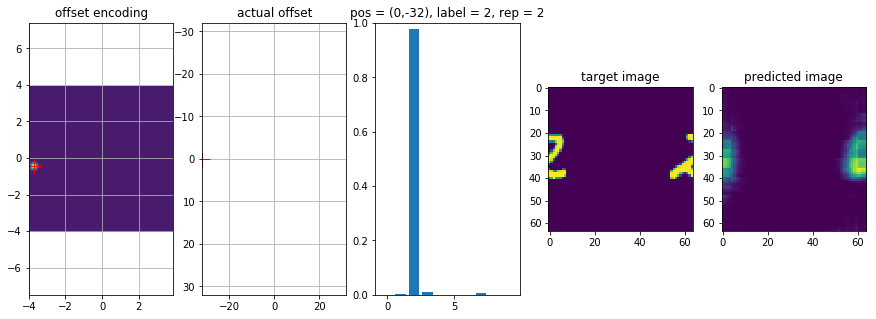

torch.Size([50, 1, 28, 28])
0 -28
[[ 0.49285202 -3.830924  ]] [[ 0.51485877 -3.70864026]]


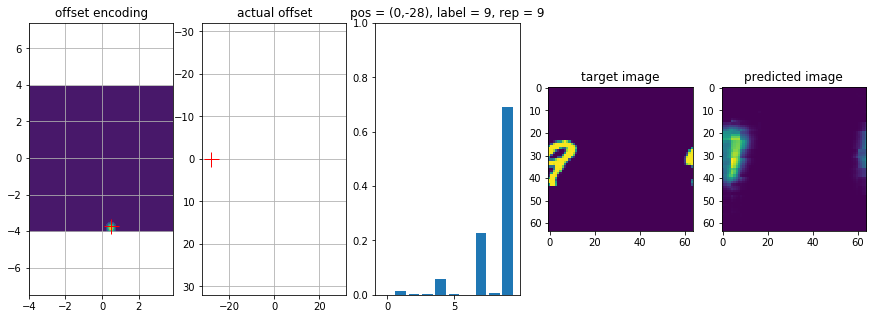

torch.Size([50, 1, 28, 28])
0 -24
[[ 1.35423139 -2.81300026]] [[ 1.54406417 -2.81927649]]


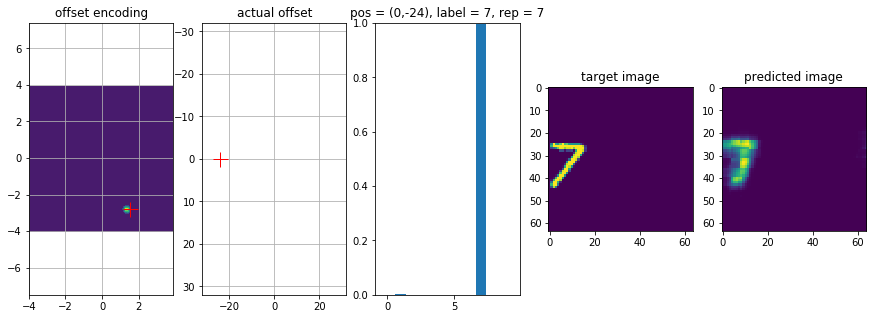

torch.Size([50, 1, 28, 28])
0 -20
[[ 1.08306829 -1.68408006]] [[ 1.03247406 -1.67563193]]


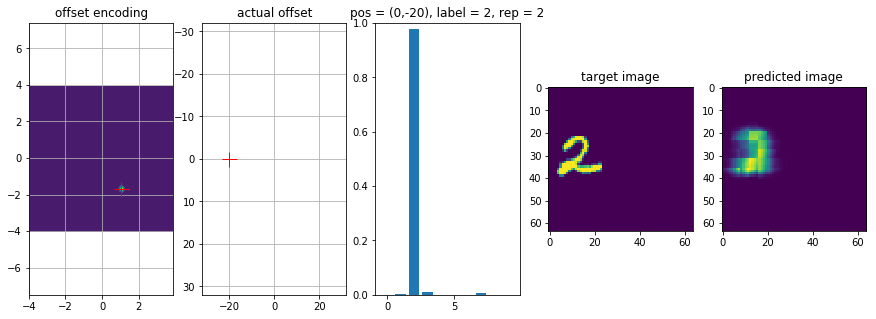

torch.Size([50, 1, 28, 28])
0 -16
[[ 1.25525802 -1.21734517]] [[ 1.31090001 -1.1849592 ]]


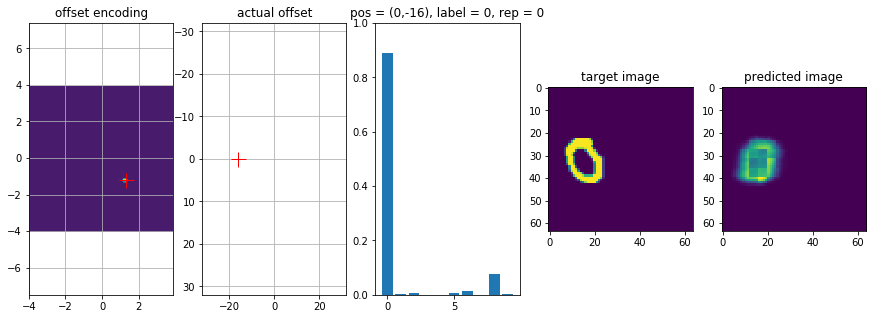

torch.Size([50, 1, 28, 28])
0 -12
[[ 1.1870738  -0.58602149]] [[ 1.29810542 -0.60431564]]


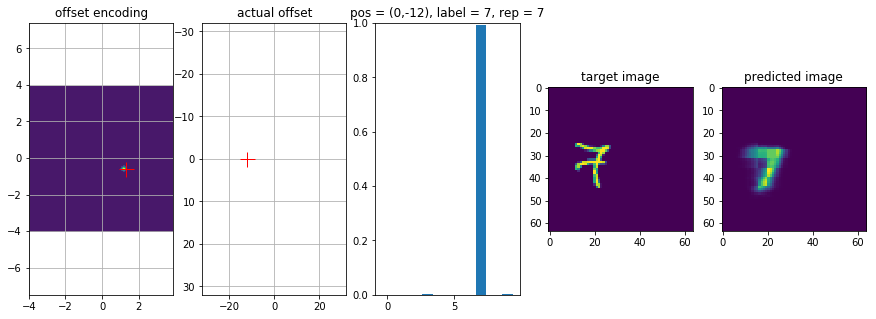

torch.Size([50, 1, 28, 28])
0 -8
[[ 0.78556219 -0.35841899]] [[ 0.76113643 -0.5286451 ]]


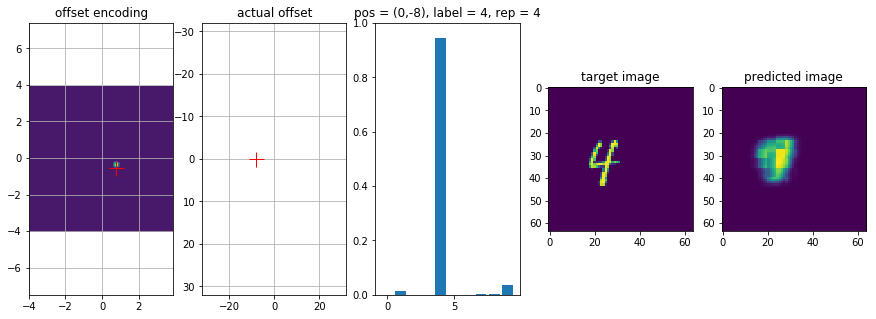

torch.Size([50, 1, 28, 28])
0 -4
[[ 0.39031082 -0.18803431]] [[ 0.33648528 -0.18450777]]


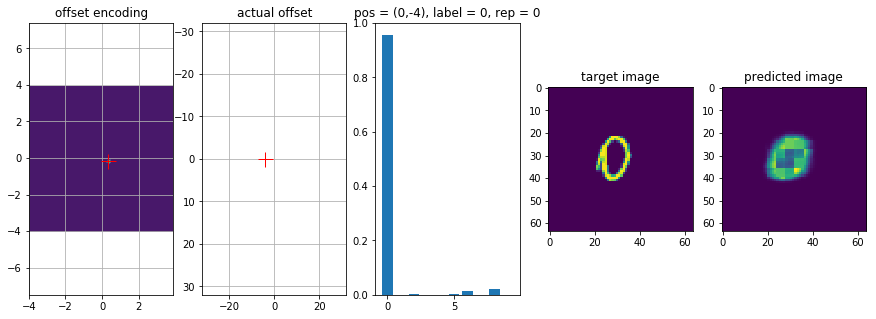

torch.Size([50, 1, 28, 28])
0 0
[[ 0.00292061 -0.07964652]] [[-0.04915309 -0.09915875]]


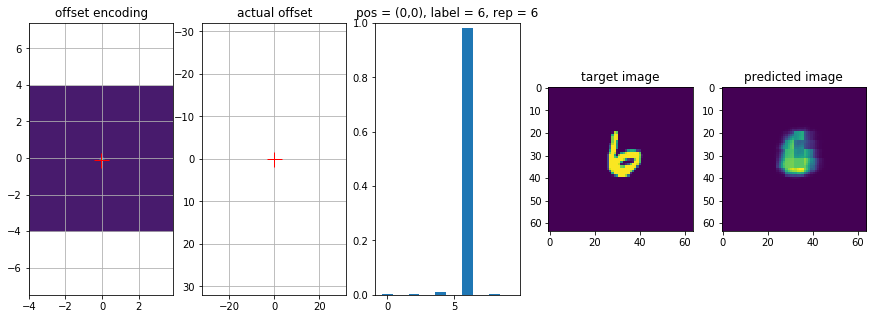

torch.Size([50, 1, 28, 28])
0 4
[[-0.176321    0.36124828]] [[-0.09146256  0.36055631]]


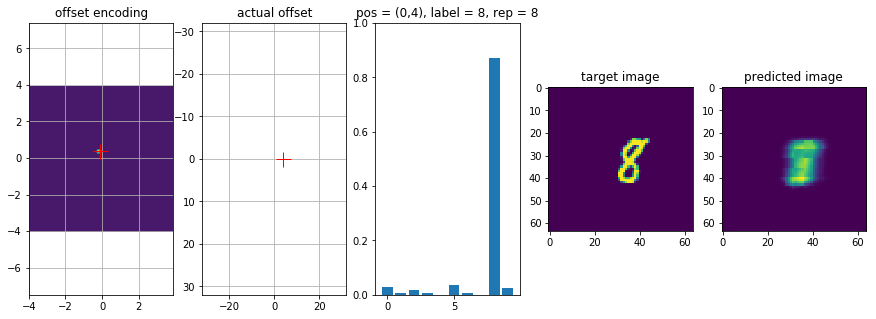

torch.Size([50, 1, 28, 28])
0 8
[[-0.63759765  0.4590124 ]] [[-0.64000787  0.49264137]]


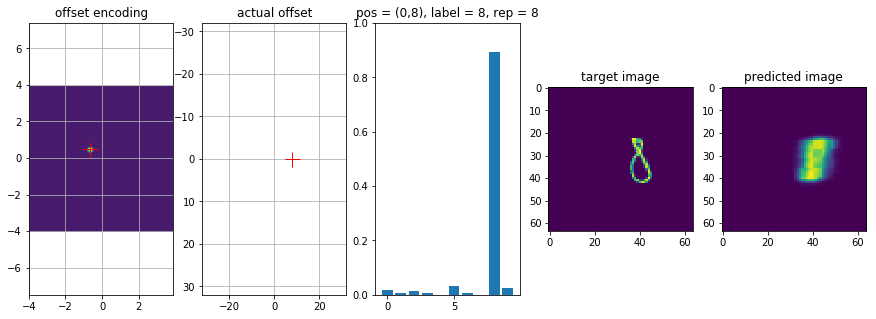

torch.Size([50, 1, 28, 28])
0 12
[[-1.03448445  0.59616365]] [[-0.99731074  0.69211619]]


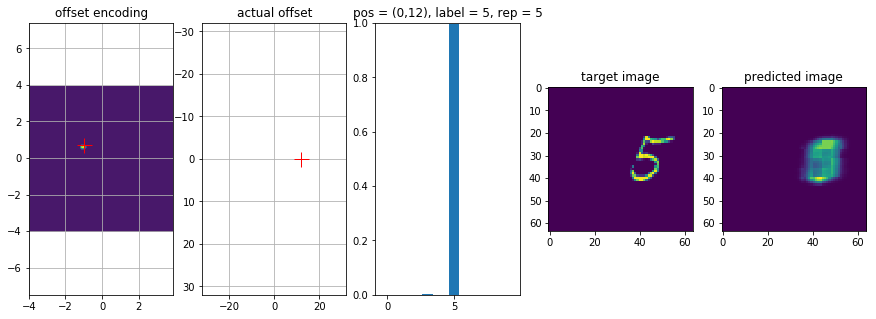

torch.Size([50, 1, 28, 28])
0 16
[[-1.31609749  0.82098621]] [[-1.20193298  0.76496981]]


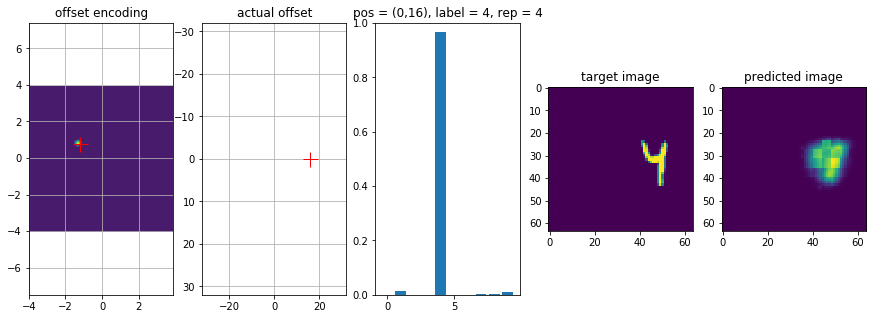

torch.Size([50, 1, 28, 28])
0 20
[[-1.79389207  0.79022688]] [[-1.81059167  0.84309923]]


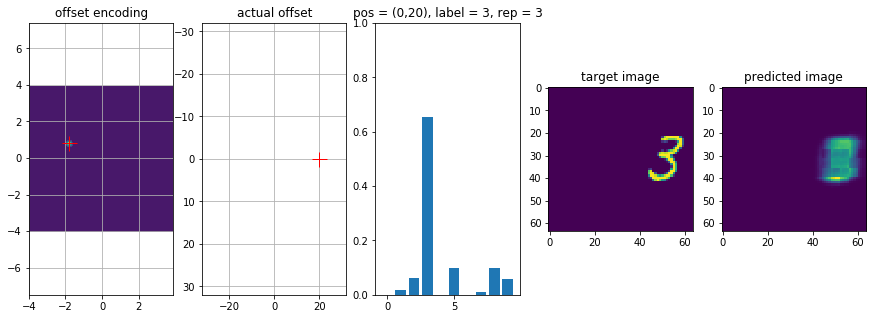

torch.Size([50, 1, 28, 28])
0 24
[[-2.42509047  0.73989873]] [[-2.24245552  0.71239822]]


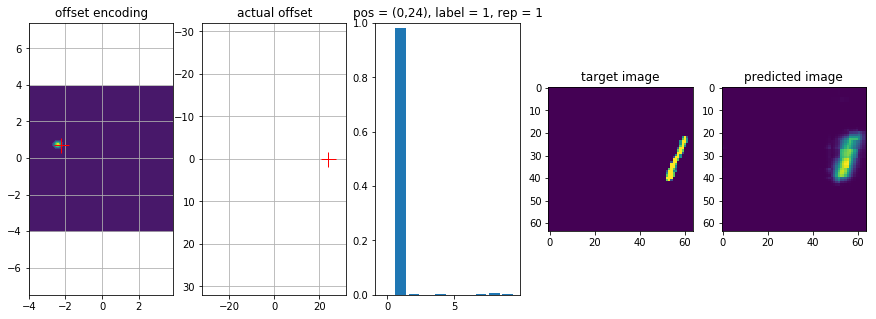

torch.Size([50, 1, 28, 28])
0 28
[[-3.12649817  0.5734083 ]] [[-2.9870147   0.49945794]]


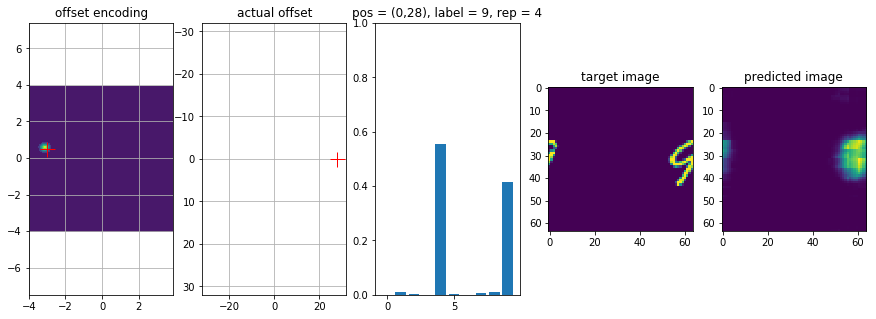

In [26]:
%matplotlib inline
import torch

from Where_act_code_VAE_classif_alt import couples_gen
from scipy.stats import multivariate_normal

import numpy as np
import torch.nn.functional as F


N_test = 10

for _ in range(-32,32,4): #range(N_test):
    '''i_offset = np.random.randint(args.size)
    j_offset = np.random.randint(args.size)'''
#     mid = np.int(ml.args.size / 2)
#     draw = np.random.multivariate_normal((0,0),((1,0),(0,1)))
#     i_offset = min(max(-mid, np.int(draw[0] * mid / 3)), mid)
#     j_offset = min(max(-mid, np.int(draw[1] * mid / 3)), mid)
    data, label = next(iter(ml.dataset.data_loader))
    print (data.shape)  
    idx = 0
    #label[idx] = 0
    i_offset = 0
    j_offset = _
    print(i_offset, j_offset)
    data_full, label_full, pos_full = couples_gen(data[idx, 0, :, :], label[idx], i_offset, j_offset, size=args.size, contrast=1.)
    label_full = np.array(label_full, dtype = 'double')
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1, 5, figsize=((15, 5)))
    #ax[0].imshow(a_data)
    ax[3].imshow(data_full)
    ax[3].set_title('target image')
   
    x_hat_logit_output, mu_output, logvar_output, u_output, z_hat_logit_output = ml.model(torch.from_numpy(data_full[None, None, :, :]), 
                                                                      torch.from_numpy(label_full[None, :]),
                                                                      torch.from_numpy(pos_full[None, :]))[:5]
    ax[4].imshow(F.sigmoid(x_hat_logit_output.view(64, 64)).detach().numpy())
    ax[4].set_title('predicted image')
    #ax[2].imshow(F.sigmoid(output[0, 0, :, :]).detach().numpy())
    #plt.title("("+str(i_offset)+","+str(j_offset)+"), label = "+str(label[idx].item()))
    #rep = torch.argmax(z_hat_logit_output).detach().numpy()

    #ig, ax = plt.subplots(1, 3, figsize=((13, 5)))
    #ax[0].plot(a_data)
    ax[1].plot(j_offset, i_offset, 'r+', ms = 15)
    ax[1].set_xlim([-32, 32])
    ax[1].set_ylim([32, -32])
    ax[1].xaxis.grid(True)
    ax[1].yaxis.grid(True)
    ax[1].set_title('actual offset')
    
    u_offset = u_output[:,:2].detach().numpy()
    mu_offset = mu_output[:,:2].detach().numpy()
    logvar_offset = logvar_output[:,:2].detach().numpy()
    DIM1 = 0
    DIM2 = 1
    axe_x, axe_y = np.mgrid[-4:4:.1, -4:4:.1]
    q = multivariate_normal(mu_offset[0], np.exp(logvar_offset[0]) * np.eye(2))
    pos = np.empty(axe_x.shape + (2,))
    pos[:, :, DIM1] = axe_x; pos[:, :, DIM2] = axe_y

    print(mu_offset, u_offset)
    ax[0].contourf(axe_x, axe_y, q.pdf(pos))
    ax[0].plot(u_offset[0][0], u_offset[0][1], 'r+', ms = 15)
    ax[0].xaxis.grid(True)
    ax[0].set_xlim([-4, 4])
    ax[0].set_ylim([-4, 4])
    ax[0].yaxis.grid(True)
    ax[0].set_title('offset encoding')    
    ax[0].axis('equal')
    
    '''ax[2].imshow(F.sigmoid(x_hat_logit_output.view(64, 64)).detach().numpy())
    ax[2].set_title('predicted image')'''
    rep = torch.argmax(z_hat_logit_output).detach().numpy()
    ax[2].bar(np.arange(10), F.softmax(z_hat_logit_output[0,:]).detach().numpy())
    ax[2].set_ylim([0,1])
    ax[2].set_title("pos = ("+str(i_offset)+","+str(j_offset)+"), label = "+str(label[idx].item())+', rep = '+str(rep))

    
    plt.show()    

Apres environ 100 epoques

tensor(0)
0 -20


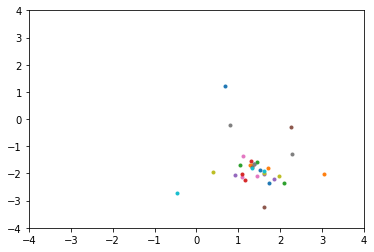

tensor(0)
0 -16


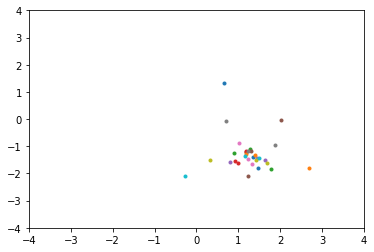

tensor(0)
0 -12


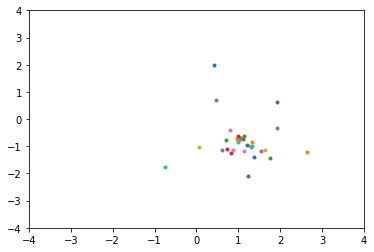

tensor(0)
0 -8


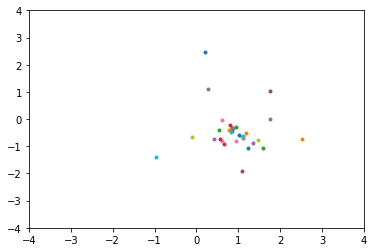

tensor(0)
0 -4


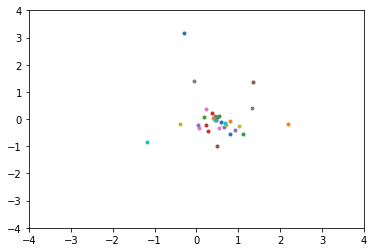

tensor(0)
0 0


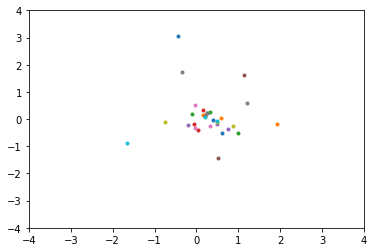

tensor(0)
0 4


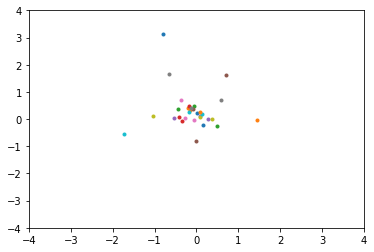

tensor(0)
0 8


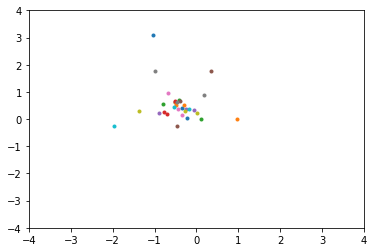

tensor(0)
0 12


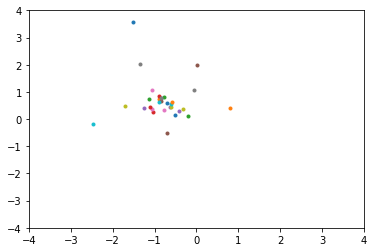

tensor(0)
0 16


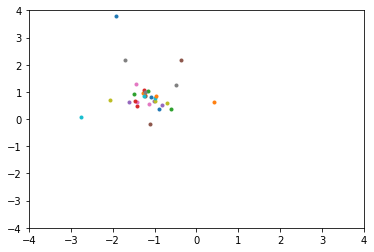

In [25]:
from Where_act_code_VAE_classif_alt import couples_gen
data, label = next(iter(ml.dataset.data_loader))
idx = 0
for _ in range(-20,20,4):
    #label[idx] = z
    idx = 3
    print(label[idx])
    i_offset = 0
    j_offset = _ 
    print(i_offset, j_offset)
    data_full, label_full, pos_full = couples_gen(data[idx, 0, :, :], label[idx], i_offset, j_offset, size=args.size, contrast=1.)
    label_full = np.array(label_full, dtype = 'double')
    x, d1, d2 = ml.model(torch.from_numpy(data_full[None, None, :, :]), 
                        torch.from_numpy(label_full[None, :]),
                        torch.from_numpy(pos_full[None, :]))[4:]
    plt.plot(d1.detach().numpy(),d2.detach().numpy(),'.')
    plt.xlim([-4, 4])
    plt.ylim([-4, 4])
    plt.show()



In [ ]:
_ = plt.plot(data_full)

In [ ]:
size = 256
grid_x, grid_y = np.abs(np.mgrid[-size/2:size/2, -size/2:size/2]) * 8 / size
pos = np.empty((size, size, 2))
pos[:, :, 0] = grid_x; pos[:, :, 1] = grid_y
d = multivariate_normal([0, 0], [[1, 0], [0, 1]])
mask = d.pdf(pos)
mask2 = np.exp(-20 * mask)
_ = plt.imshow(mask2)

In [ ]:
np.random.randn(5)

In [ ]:
output = ml.model(torch.from_numpy(data_full[None, None, :, :]))#.double())
output.shape

In [ ]:
output = torch.from_numpy(data_full[None, None, :, :].astype(np.float))
output.shape

In [ ]:
output = ml.model(torch.from_numpy(data_full[None, None, :, :])).detach().numpy()[0, 0, :, :]
output.shape

In [ ]:
output.min(), output.max()

In [ ]:
_ = plt.plot(a_data)

In [ ]:
draw = np.random.multivariate_normal((0,0),((1,0),(0,1)))

In [ ]:
plt.plot(ml.model.deconv1.bias.detach().numpy())

In [ ]:
plt.plot((1 + np.tanh(ml.model.fc4.bias.detach().numpy()))/2)

In [ ]:
plt.imshow(np.reshape(ml.model.fc4.bias.detach().numpy(),(64,64)))

In [ ]:
data, foo = next(iter(ml.dataset.data_loader))

In [ ]:
foo

In [ ]:
target_full = np.zeros(10, dtype = 'int')

In [ ]:
target_full

In [ ]:
loss_u = torch.zeros(1)

In [ ]:
torch.distributions.multinomial.Multinomial(